In [1]:
import torch
from torch import embedding, nn
import torch.nn.functional as F
import torch.optim as optim
import random
import time
from torch import nn
from tqdm import tqdm
from unet import UNet
from discriminator import Discriminator
from baseline import FaceRecognizer
from preprocessing import *
from preprocessing_GAN import *

/home/jupyter-zhw622/DeepLearning/preprocessing.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  train_data = torch.tensor(train_data)


In [2]:
train_data.shape

torch.Size([280, 1, 1, 64, 64])

In [3]:
import torch_dct as dct

In [4]:
for i in range(train_data.shape[0]):
    train_data[i] = dct.idct(train_data[i])

In [5]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [6]:
d, l = discriminator_make_dataset()

In [7]:
def train_discriminator(model, data, targets, optimizer, criterion):  
    model.train()
    epoch_loss = 0
    sampling = list(range(data.shape[0]))
    random.shuffle(sampling)
    print("training ...")
    for i, selected_batch_index in tqdm(enumerate(sampling)):
        optimizer.zero_grad()
        z = model.forward(data[selected_batch_index])
        loss=criterion(z,targets[selected_batch_index].long())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss

In [8]:
training_losses = []
def train_discriminator_eps(model, eps, lr, reg, train_data, train_target):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=reg, nesterov=False)
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    best_train_loss = 999999
    for epoch in range(eps):  
        print("epoch start: ", epoch)  
        start_time = time.time()
        training_loss = train_discriminator(model, train_data, train_target, optimizer, criterion)
        training_losses.append(training_loss)  
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        torch.save(model.state_dict(), 'best_model_discriminator.pt')
        print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s', end='')
        print(f'\tTrain Loss: {training_loss:.3f}')

In [9]:
train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

12it [00:00, 116.37it/s]

epoch start:  0
training ...


400it [00:02, 163.46it/s]
17it [00:00, 166.67it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 55.141
epoch start:  1
training ...


400it [00:02, 153.64it/s]
15it [00:00, 145.85it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.516
epoch start:  2
training ...


400it [00:02, 155.89it/s]
15it [00:00, 147.06it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.227
epoch start:  3
training ...


400it [00:02, 164.69it/s]
15it [00:00, 146.90it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.138
epoch start:  4
training ...


400it [00:02, 152.88it/s]
16it [00:00, 150.84it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.098
epoch start:  5
training ...


400it [00:02, 149.16it/s]
16it [00:00, 159.04it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.075
epoch start:  6
training ...


400it [00:02, 151.70it/s]
15it [00:00, 144.24it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.061
epoch start:  7
training ...


400it [00:02, 151.55it/s]
16it [00:00, 152.51it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.051
epoch start:  8
training ...


400it [00:02, 149.00it/s]
14it [00:00, 138.46it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.044
epoch start:  9
training ...


400it [00:02, 150.18it/s]
17it [00:00, 162.22it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.038
epoch start:  10
training ...


400it [00:02, 152.11it/s]
16it [00:00, 156.91it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.034
epoch start:  11
training ...


400it [00:02, 161.87it/s]
16it [00:00, 157.89it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.031
epoch start:  12
training ...


400it [00:02, 150.52it/s]
14it [00:00, 136.58it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.028
epoch start:  13
training ...


400it [00:02, 165.51it/s]
15it [00:00, 145.49it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.025
epoch start:  14
training ...


400it [00:02, 148.79it/s]
15it [00:00, 145.70it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.023
epoch start:  15
training ...


400it [00:01, 221.33it/s]
18it [00:00, 173.56it/s]

Epoch: 16 | Time: 0m 1s	Train Loss: 0.021
epoch start:  16
training ...


400it [00:02, 158.66it/s]
15it [00:00, 147.77it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.020
epoch start:  17
training ...


400it [00:02, 153.69it/s]
16it [00:00, 155.37it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.019
epoch start:  18
training ...


400it [00:02, 174.67it/s]
26it [00:00, 257.49it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.017
epoch start:  19
training ...


400it [00:01, 203.14it/s]

Epoch: 20 | Time: 0m 1s	Train Loss: 0.016


In [10]:
torch.softmax(discriminator(d[3]),-1)

tensor([[1.0000e+00, 2.1013e-18]], grad_fn=<SoftmaxBackward0>)

In [11]:
def evolve_generator_1ep(generator, faceRecognizer, discriminator, attack_targets, optimizer, criterion, alpha):
    gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    faceRecognizer.eval()
    discriminator.eval()
    generator.train()
    optimizer.zero_grad()
    generated_imgs = generator.forward(gan_input)
    loss = 0
    for i in range(attack_targets.shape[0]):
        z1 = faceRecognizer.forward(generated_imgs[0][i].reshape(1,1,64,64))
        loss+=criterion(z1,attack_targets[i])
        z2 = discriminator.forward(generated_imgs[0][i].reshape(1,1,64,64))
        loss+= alpha*criterion(z2,torch.tensor([1]))
    loss.backward()
    optimizer.step()
    epoch_loss = loss.item()/len(attack_targets) 
    return epoch_loss
    

In [12]:
def evolve_generator(eps, lr, reg, lr_decay, alpha):
    for epoch in range(eps): 
        optimizer = optim.SGD(generator.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        criterion = nn.CrossEntropyLoss(reduction = 'sum')
        epoch_loss = 0
        epoch_loss += evolve_generator_1ep(generator, faceRecognizer, discriminator, attack_targets, optimizer, criterion, alpha)
        print("loss(generator): ", epoch_loss)



In [13]:
evolve_generator(10, 0.001, 0.0002, 0.98, 1)

loss(generator):  22.553071594238283
loss(generator):  17.264419555664062
loss(generator):  14.379428100585937
loss(generator):  13.22655792236328
loss(generator):  11.791796112060547
loss(generator):  10.302708435058594
loss(generator):  8.719108581542969
loss(generator):  7.595701599121094
loss(generator):  6.908092498779297
loss(generator):  6.59422607421875


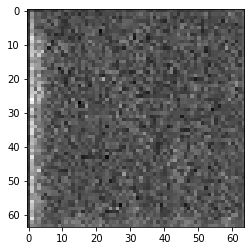

In [14]:
generated_image(1)

In [15]:
print_confidence(9)

tensor([[0.0266, 0.0256, 0.0254, 0.0245, 0.0228, 0.0255, 0.0272, 0.0252, 0.0237,
         0.0248, 0.0248, 0.0250, 0.0265, 0.0256, 0.0239, 0.0254, 0.0266, 0.0237,
         0.0237, 0.0249, 0.0239, 0.0246, 0.0241, 0.0274, 0.0249, 0.0235, 0.0270,
         0.0248, 0.0232, 0.0231, 0.0246, 0.0249, 0.0238, 0.0278, 0.0251, 0.0265,
         0.0268, 0.0244, 0.0247, 0.0237]], grad_fn=<SoftmaxBackward0>)


In [16]:
torch.softmax(discriminator.forward(generate(1).reshape(1,1,64,64)),-1)

tensor([[0.9721, 0.0279]], grad_fn=<SoftmaxBackward0>)

In [17]:
d, l = discriminator_make_dataset()

In [18]:
train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

16it [00:00, 155.17it/s]

epoch start:  0
training ...


400it [00:02, 157.00it/s]
16it [00:00, 150.01it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 20.138
epoch start:  1
training ...


400it [00:02, 155.09it/s]
16it [00:00, 156.37it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.228
epoch start:  2
training ...


400it [00:02, 147.46it/s]
15it [00:00, 140.14it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.128
epoch start:  3
training ...


400it [00:02, 158.94it/s]
20it [00:00, 194.44it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.082
epoch start:  4
training ...


400it [00:02, 161.93it/s]
14it [00:00, 132.09it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.063
epoch start:  5
training ...


400it [00:02, 143.92it/s]
16it [00:00, 149.26it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.051
epoch start:  6
training ...


400it [00:02, 164.73it/s]
15it [00:00, 148.73it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.043
epoch start:  7
training ...


400it [00:02, 144.65it/s]
16it [00:00, 155.93it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.037
epoch start:  8
training ...


400it [00:02, 153.38it/s]
15it [00:00, 147.02it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.032
epoch start:  9
training ...


400it [00:01, 212.51it/s]
25it [00:00, 238.39it/s]

Epoch: 10 | Time: 0m 1s	Train Loss: 0.029
epoch start:  10
training ...


400it [00:01, 239.07it/s]
26it [00:00, 256.69it/s]

Epoch: 11 | Time: 0m 1s	Train Loss: 0.026
epoch start:  11
training ...


400it [00:01, 236.31it/s]
19it [00:00, 185.44it/s]

Epoch: 12 | Time: 0m 1s	Train Loss: 0.023
epoch start:  12
training ...


400it [00:01, 207.19it/s]
16it [00:00, 153.54it/s]

Epoch: 13 | Time: 0m 1s	Train Loss: 0.021
epoch start:  13
training ...


400it [00:02, 149.04it/s]
15it [00:00, 143.84it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.020
epoch start:  14
training ...


400it [00:02, 142.73it/s]
15it [00:00, 148.29it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.018
epoch start:  15
training ...


400it [00:02, 144.00it/s]
15it [00:00, 149.81it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.017
epoch start:  16
training ...


400it [00:02, 149.73it/s]
18it [00:00, 174.45it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.016
epoch start:  17
training ...


400it [00:02, 157.88it/s]
18it [00:00, 178.13it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.015
epoch start:  18
training ...


400it [00:02, 152.12it/s]
17it [00:00, 165.42it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.014
epoch start:  19
training ...


400it [00:02, 150.41it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.013


In [19]:
torch.softmax(discriminator.forward(generate(1).reshape(1,1,64,64)),-1)

tensor([[9.9993e-01, 7.3036e-05]], grad_fn=<SoftmaxBackward0>)

In [21]:
for i in range(10):
    evolve_generator(100, 0.001, 0.0002, 0.99, 1)
    d, l = discriminator_make_dataset()
    train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

loss(generator):  15.198707580566406
loss(generator):  14.194931030273438
loss(generator):  12.062330627441407
loss(generator):  11.18014144897461
loss(generator):  9.568141174316406
loss(generator):  8.821376037597656
loss(generator):  8.805024719238281
loss(generator):  8.558157348632813
loss(generator):  8.483963012695312
loss(generator):  8.31968994140625
loss(generator):  7.993221282958984
loss(generator):  7.502320098876953
loss(generator):  7.407521057128906
loss(generator):  7.347779083251953
loss(generator):  7.346802520751953
loss(generator):  7.21834716796875
loss(generator):  7.252764892578125
loss(generator):  7.183542633056641
loss(generator):  7.127510833740234
loss(generator):  7.110302734375
loss(generator):  7.092999267578125
loss(generator):  7.0425865173339846
loss(generator):  7.011656188964844
loss(generator):  6.937255859375
loss(generator):  6.968876647949219
loss(generator):  6.923923492431641
loss(generator):  6.93428955078125
loss(generator):  6.9001976013183

16it [00:00, 151.64it/s]

epoch start:  0
training ...


400it [00:02, 168.33it/s]
15it [00:00, 146.85it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 34.524
epoch start:  1
training ...


400it [00:02, 163.22it/s]
19it [00:00, 183.36it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.332
epoch start:  2
training ...


400it [00:02, 170.49it/s]
17it [00:00, 166.71it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.152
epoch start:  3
training ...


400it [00:02, 174.02it/s]
18it [00:00, 178.30it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.102
epoch start:  4
training ...


400it [00:02, 169.70it/s]
18it [00:00, 174.04it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.070
epoch start:  5
training ...


400it [00:02, 174.97it/s]
17it [00:00, 163.86it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.054
epoch start:  6
training ...


400it [00:02, 166.66it/s]
17it [00:00, 167.80it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.043
epoch start:  7
training ...


400it [00:02, 175.95it/s]
19it [00:00, 189.50it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.037
epoch start:  8
training ...


400it [00:02, 164.91it/s]
17it [00:00, 162.66it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.031
epoch start:  9
training ...


400it [00:02, 163.32it/s]
17it [00:00, 165.72it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.027
epoch start:  10
training ...


400it [00:02, 160.81it/s]
15it [00:00, 149.30it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.024
epoch start:  11
training ...


400it [00:02, 183.97it/s]
16it [00:00, 149.22it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.021
epoch start:  12
training ...


400it [00:02, 188.96it/s]
19it [00:00, 182.48it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.019
epoch start:  13
training ...


400it [00:02, 157.12it/s]
16it [00:00, 152.87it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.018
epoch start:  14
training ...


400it [00:02, 154.65it/s]
17it [00:00, 164.34it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.016
epoch start:  15
training ...


400it [00:02, 159.29it/s]
17it [00:00, 159.92it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.015
epoch start:  16
training ...


400it [00:02, 151.71it/s]
18it [00:00, 177.96it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.014
epoch start:  17
training ...


400it [00:02, 177.58it/s]
17it [00:00, 160.72it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.013
epoch start:  18
training ...


400it [00:02, 159.68it/s]
21it [00:00, 208.52it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.012
epoch start:  19
training ...


400it [00:02, 156.25it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.011
loss(generator):  15.051913452148437
loss(generator):  12.445993804931641
loss(generator):  8.018582916259765
loss(generator):  4.269020843505859
loss(generator):  4.308417892456054
loss(generator):  4.0962882995605465
loss(generator):  4.017834854125977
loss(generator):  4.009167861938477
loss(generator):  4.006161499023437
loss(generator):  4.029366302490234
loss(generator):  4.001149749755859
loss(generator):  3.946034240722656
loss(generator):  3.9406417846679687
loss(generator):  3.9298984527587892
loss(generator):  3.882184600830078
loss(generator):  3.8926578521728517
loss(generator):  3.894144058227539
loss(generator):  3.8820491790771485
loss(generator):  3.857462692260742
loss(generator):  3.8914440155029295
loss(generator):  3.852202224731445
loss(generator):  3.8518516540527346
loss(generator):  3.8324630737304686
loss(generator):  3.834956741333008
loss(generator):  3.826553726196289
loss(generator):  3.810575485229492
loss(generat

15it [00:00, 146.31it/s]

epoch start:  0
training ...


400it [00:02, 158.98it/s]
16it [00:00, 154.03it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 20.974
epoch start:  1
training ...


400it [00:02, 156.74it/s]
17it [00:00, 168.63it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.296
epoch start:  2
training ...


400it [00:02, 164.96it/s]
17it [00:00, 162.45it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.176
epoch start:  3
training ...


400it [00:02, 160.17it/s]
16it [00:00, 159.46it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.112
epoch start:  4
training ...


400it [00:02, 166.93it/s]
18it [00:00, 174.21it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.083
epoch start:  5
training ...


400it [00:02, 165.12it/s]
17it [00:00, 169.84it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.067
epoch start:  6
training ...


400it [00:02, 174.41it/s]
17it [00:00, 167.36it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.054
epoch start:  7
training ...


400it [00:02, 164.08it/s]
17it [00:00, 167.55it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.046
epoch start:  8
training ...


400it [00:02, 161.69it/s]
16it [00:00, 158.08it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.040
epoch start:  9
training ...


400it [00:02, 163.57it/s]
15it [00:00, 146.10it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.035
epoch start:  10
training ...


400it [00:02, 175.47it/s]
21it [00:00, 202.46it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.032
epoch start:  11
training ...


400it [00:02, 181.04it/s]
23it [00:00, 229.90it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.028
epoch start:  12
training ...


400it [00:02, 184.66it/s]
15it [00:00, 148.34it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.025
epoch start:  13
training ...


400it [00:02, 161.63it/s]
18it [00:00, 172.85it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.024
epoch start:  14
training ...


400it [00:02, 172.02it/s]
17it [00:00, 168.79it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.022
epoch start:  15
training ...


400it [00:02, 161.51it/s]
16it [00:00, 156.45it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.020
epoch start:  16
training ...


400it [00:02, 159.84it/s]
17it [00:00, 167.09it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.019
epoch start:  17
training ...


400it [00:02, 159.68it/s]
17it [00:00, 160.25it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.018
epoch start:  18
training ...


400it [00:02, 182.68it/s]
17it [00:00, 161.89it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.016
epoch start:  19
training ...


400it [00:02, 173.41it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.015
loss(generator):  15.488296508789062
loss(generator):  7.683194732666015
loss(generator):  6.592713165283203
loss(generator):  6.228849792480469
loss(generator):  5.918871307373047
loss(generator):  5.902936553955078
loss(generator):  6.015977478027343
loss(generator):  5.714043045043946
loss(generator):  5.735834121704102
loss(generator):  5.680504989624024
loss(generator):  5.68980827331543
loss(generator):  5.634324645996093
loss(generator):  5.6157997131347654
loss(generator):  5.602377700805664
loss(generator):  5.547299575805664
loss(generator):  5.594864273071289
loss(generator):  5.5645099639892575
loss(generator):  5.569116592407227
loss(generator):  5.497114181518555
loss(generator):  5.516340637207032
loss(generator):  5.495927429199218
loss(generator):  5.48144416809082
loss(generator):  5.472970581054687
loss(generator):  5.457204818725586
loss(generator):  5.45660171508789
loss(generator):  5.438799667358398
loss(generator):  5.45

16it [00:00, 156.24it/s]

epoch start:  0
training ...


400it [00:02, 175.52it/s]
17it [00:00, 169.67it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 15.299
epoch start:  1
training ...


400it [00:02, 161.87it/s]
17it [00:00, 168.42it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.161
epoch start:  2
training ...


400it [00:02, 161.57it/s]
18it [00:00, 167.40it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.101
epoch start:  3
training ...


400it [00:02, 184.27it/s]
17it [00:00, 167.62it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.076
epoch start:  4
training ...


400it [00:02, 169.22it/s]
17it [00:00, 164.37it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.060
epoch start:  5
training ...


400it [00:02, 169.12it/s]
18it [00:00, 170.94it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.049
epoch start:  6
training ...


400it [00:02, 167.89it/s]
19it [00:00, 181.93it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.042
epoch start:  7
training ...


400it [00:02, 179.39it/s]
17it [00:00, 166.48it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.036
epoch start:  8
training ...


400it [00:02, 163.78it/s]
16it [00:00, 158.17it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.032
epoch start:  9
training ...


400it [00:02, 163.49it/s]
19it [00:00, 182.00it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.028
epoch start:  10
training ...


400it [00:02, 172.58it/s]
18it [00:00, 171.45it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.025
epoch start:  11
training ...


400it [00:02, 166.99it/s]
21it [00:00, 208.34it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.023
epoch start:  12
training ...


400it [00:02, 171.44it/s]
17it [00:00, 168.40it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.021
epoch start:  13
training ...


400it [00:02, 167.62it/s]
21it [00:00, 207.91it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.019
epoch start:  14
training ...


400it [00:02, 187.56it/s]
18it [00:00, 178.30it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.018
epoch start:  15
training ...


400it [00:02, 194.44it/s]
19it [00:00, 185.50it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.017
epoch start:  16
training ...


400it [00:02, 177.38it/s]
16it [00:00, 152.41it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.016
epoch start:  17
training ...


400it [00:02, 179.81it/s]
17it [00:00, 165.13it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.015
epoch start:  18
training ...


400it [00:02, 157.10it/s]
17it [00:00, 160.44it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.014
epoch start:  19
training ...


400it [00:02, 159.01it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.013
loss(generator):  13.529277038574218
loss(generator):  8.39708251953125
loss(generator):  7.6530403137207035
loss(generator):  7.395531463623047
loss(generator):  7.273481750488282
loss(generator):  7.1376182556152346
loss(generator):  7.173073577880859
loss(generator):  7.06619873046875
loss(generator):  7.073213195800781
loss(generator):  6.984791564941406
loss(generator):  6.940122985839844
loss(generator):  6.994595336914062
loss(generator):  6.933203887939453
loss(generator):  6.946095275878906
loss(generator):  6.9144340515136715
loss(generator):  6.873496246337891
loss(generator):  6.852984619140625
loss(generator):  6.855202484130859
loss(generator):  6.833914947509766
loss(generator):  6.801150512695313
loss(generator):  6.786016845703125
loss(generator):  6.807875061035157
loss(generator):  6.763011169433594
loss(generator):  6.769330596923828
loss(generator):  6.772957611083984
loss(generator):  6.7479606628417965
loss(generator):  6

14it [00:00, 134.79it/s]

epoch start:  0
training ...


400it [00:02, 193.61it/s]
15it [00:00, 144.67it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 36.180
epoch start:  1
training ...


400it [00:02, 162.15it/s]
18it [00:00, 174.27it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.075
epoch start:  2
training ...


400it [00:02, 175.14it/s]
18it [00:00, 171.99it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.047
epoch start:  3
training ...


400it [00:02, 170.25it/s]
19it [00:00, 189.73it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.034
epoch start:  4
training ...


400it [00:02, 180.14it/s]
18it [00:00, 170.28it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.026
epoch start:  5
training ...


400it [00:02, 176.65it/s]
18it [00:00, 172.42it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.022
epoch start:  6
training ...


400it [00:02, 170.93it/s]
17it [00:00, 169.19it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.018
epoch start:  7
training ...


400it [00:02, 182.49it/s]
18it [00:00, 177.90it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.016
epoch start:  8
training ...


400it [00:02, 172.81it/s]
17it [00:00, 167.22it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.014
epoch start:  9
training ...


400it [00:02, 158.13it/s]
17it [00:00, 160.37it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.013
epoch start:  10
training ...


400it [00:02, 167.12it/s]
18it [00:00, 177.70it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.011
epoch start:  11
training ...


400it [00:02, 166.53it/s]
17it [00:00, 168.00it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.010
epoch start:  12
training ...


400it [00:02, 170.55it/s]
19it [00:00, 185.10it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.010
epoch start:  13
training ...


400it [00:02, 170.72it/s]
17it [00:00, 163.43it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.009
epoch start:  14
training ...


400it [00:02, 165.46it/s]
18it [00:00, 175.18it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.008
epoch start:  15
training ...


400it [00:02, 165.07it/s]
15it [00:00, 149.97it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.008
epoch start:  16
training ...


400it [00:02, 157.16it/s]
18it [00:00, 174.39it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.007
epoch start:  17
training ...


400it [00:02, 176.72it/s]
15it [00:00, 144.85it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.007
epoch start:  18
training ...


400it [00:02, 159.60it/s]
17it [00:00, 161.84it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.006
epoch start:  19
training ...


400it [00:02, 164.03it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.006
loss(generator):  14.576693725585937
loss(generator):  8.568798065185547
loss(generator):  6.59967041015625
loss(generator):  6.118060302734375
loss(generator):  5.996041870117187
loss(generator):  5.921445846557617
loss(generator):  5.8405406951904295
loss(generator):  5.785901641845703
loss(generator):  5.706388473510742
loss(generator):  5.6745445251464846
loss(generator):  5.600727081298828
loss(generator):  5.539391326904297
loss(generator):  5.471737670898437
loss(generator):  5.385163879394531
loss(generator):  5.348876953125
loss(generator):  5.273486328125
loss(generator):  5.239144134521484
loss(generator):  5.160751724243164
loss(generator):  5.107036209106445
loss(generator):  5.052334594726562
loss(generator):  5.021760940551758
loss(generator):  4.990908813476563
loss(generator):  4.93043212890625
loss(generator):  4.890056610107422
loss(generator):  4.861887741088867
loss(generator):  4.8265129089355465
loss(generator):  4.804050

21it [00:00, 207.18it/s]

epoch start:  0
training ...


400it [00:02, 199.04it/s]
19it [00:00, 188.34it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 38.035
epoch start:  1
training ...


400it [00:02, 196.22it/s]
20it [00:00, 190.93it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.053
epoch start:  2
training ...


400it [00:02, 185.66it/s]
19it [00:00, 180.05it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.148
epoch start:  3
training ...


400it [00:02, 178.05it/s]
19it [00:00, 182.25it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.085
epoch start:  4
training ...


400it [00:02, 188.17it/s]
17it [00:00, 167.64it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.059
epoch start:  5
training ...


400it [00:02, 175.65it/s]
19it [00:00, 185.78it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.045
epoch start:  6
training ...


400it [00:02, 175.80it/s]
18it [00:00, 178.46it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.036
epoch start:  7
training ...


400it [00:02, 182.72it/s]
17it [00:00, 165.12it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.030
epoch start:  8
training ...


400it [00:02, 173.91it/s]
19it [00:00, 181.34it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.026
epoch start:  9
training ...


400it [00:02, 182.97it/s]
19it [00:00, 186.08it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.023
epoch start:  10
training ...


400it [00:02, 177.08it/s]
18it [00:00, 172.30it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.020
epoch start:  11
training ...


400it [00:02, 172.31it/s]
20it [00:00, 194.51it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.018
epoch start:  12
training ...


400it [00:02, 184.32it/s]
18it [00:00, 172.31it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.016
epoch start:  13
training ...


400it [00:02, 175.89it/s]
17it [00:00, 166.83it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.015
epoch start:  14
training ...


400it [00:02, 160.10it/s]
17it [00:00, 166.28it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.014
epoch start:  15
training ...


400it [00:02, 165.77it/s]
17it [00:00, 169.98it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.013
epoch start:  16
training ...


400it [00:02, 176.99it/s]
23it [00:00, 222.48it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.012
epoch start:  17
training ...


400it [00:02, 190.51it/s]
22it [00:00, 208.69it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.011
epoch start:  18
training ...


400it [00:02, 190.98it/s]
18it [00:00, 172.93it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.010
epoch start:  19
training ...


400it [00:02, 194.16it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.010
loss(generator):  15.526025390625
loss(generator):  8.972200012207031
loss(generator):  5.473054122924805
loss(generator):  4.639391708374023
loss(generator):  3.9573535919189453
loss(generator):  3.6954120635986327
loss(generator):  3.6202945709228516
loss(generator):  3.6197509765625
loss(generator):  3.615045928955078
loss(generator):  3.6148719787597656
loss(generator):  3.616353988647461
loss(generator):  3.6143192291259765
loss(generator):  3.6114498138427735
loss(generator):  3.614327239990234
loss(generator):  3.615278625488281
loss(generator):  3.6101856231689453
loss(generator):  3.607179641723633
loss(generator):  3.605693817138672
loss(generator):  3.6076095581054686
loss(generator):  3.608547592163086
loss(generator):  3.60528564453125
loss(generator):  3.6038841247558593
loss(generator):  3.6029037475585937
loss(generator):  3.600189971923828
loss(generator):  3.5999374389648438
loss(generator):  3.599264907836914
loss(generator):

18it [00:00, 179.30it/s]

epoch start:  0
training ...


400it [00:02, 174.81it/s]
18it [00:00, 176.71it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 61.631
epoch start:  1
training ...


400it [00:02, 184.66it/s]
19it [00:00, 183.96it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.892
epoch start:  2
training ...


400it [00:02, 190.50it/s]
21it [00:00, 196.57it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.388
epoch start:  3
training ...


400it [00:02, 178.57it/s]
18it [00:00, 176.82it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.240
epoch start:  4
training ...


400it [00:02, 178.69it/s]
17it [00:00, 164.43it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.170
epoch start:  5
training ...


400it [00:02, 161.48it/s]
17it [00:00, 160.20it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.130
epoch start:  6
training ...


400it [00:02, 169.25it/s]
17it [00:00, 161.11it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.103
epoch start:  7
training ...


400it [00:02, 169.24it/s]
17it [00:00, 166.22it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.086
epoch start:  8
training ...


400it [00:02, 168.74it/s]
19it [00:00, 179.94it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.073
epoch start:  9
training ...


400it [00:02, 175.82it/s]
16it [00:00, 155.97it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.064
epoch start:  10
training ...


400it [00:02, 169.16it/s]
18it [00:00, 171.67it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.056
epoch start:  11
training ...


400it [00:02, 171.93it/s]
17it [00:00, 169.79it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.050
epoch start:  12
training ...


400it [00:02, 172.86it/s]
18it [00:00, 179.39it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.045
epoch start:  13
training ...


400it [00:02, 173.81it/s]
18it [00:00, 177.29it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.041
epoch start:  14
training ...


400it [00:02, 165.15it/s]
15it [00:00, 149.93it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.037
epoch start:  15
training ...


400it [00:02, 175.55it/s]
18it [00:00, 170.79it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.034
epoch start:  16
training ...


400it [00:02, 178.75it/s]
19it [00:00, 180.56it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.032
epoch start:  17
training ...


400it [00:02, 179.60it/s]
19it [00:00, 182.64it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.030
epoch start:  18
training ...


400it [00:02, 176.95it/s]
17it [00:00, 165.74it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.028
epoch start:  19
training ...


400it [00:02, 178.70it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.026
loss(generator):  16.613380432128906
loss(generator):  4.189363098144531
loss(generator):  3.681690979003906
loss(generator):  3.661409378051758
loss(generator):  3.6572410583496096
loss(generator):  3.650746154785156
loss(generator):  3.6646312713623046
loss(generator):  3.6464229583740235
loss(generator):  3.6587894439697264
loss(generator):  3.651468276977539
loss(generator):  3.649688720703125
loss(generator):  3.652012252807617
loss(generator):  3.6454803466796877
loss(generator):  3.6438983917236327
loss(generator):  3.648532485961914
loss(generator):  3.647734451293945
loss(generator):  3.643102264404297
loss(generator):  3.644990158081055
loss(generator):  3.645822525024414
loss(generator):  3.646158218383789
loss(generator):  3.644754409790039
loss(generator):  3.6496566772460937
loss(generator):  3.6418384552001952
loss(generator):  3.6433032989501952
loss(generator):  3.6410598754882812
loss(generator):  3.639501953125
loss(generator

15it [00:00, 148.92it/s]

epoch start:  0
training ...


400it [00:02, 150.10it/s]
16it [00:00, 151.96it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 61.133
epoch start:  1
training ...


400it [00:02, 163.94it/s]
16it [00:00, 159.25it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.351
epoch start:  2
training ...


400it [00:02, 162.98it/s]
17it [00:00, 165.19it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.176
epoch start:  3
training ...


400it [00:02, 164.40it/s]
17it [00:00, 164.61it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.115
epoch start:  4
training ...


400it [00:02, 172.68it/s]
18it [00:00, 178.64it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.084
epoch start:  5
training ...


400it [00:02, 181.30it/s]
19it [00:00, 181.84it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.065
epoch start:  6
training ...


400it [00:02, 172.78it/s]
18it [00:00, 179.82it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.053
epoch start:  7
training ...


400it [00:02, 156.22it/s]
17it [00:00, 161.55it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.045
epoch start:  8
training ...


400it [00:02, 157.67it/s]
18it [00:00, 168.61it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.038
epoch start:  9
training ...


400it [00:02, 156.50it/s]
17it [00:00, 167.32it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.034
epoch start:  10
training ...


400it [00:02, 161.41it/s]
16it [00:00, 157.77it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.030
epoch start:  11
training ...


400it [00:02, 162.81it/s]
16it [00:00, 158.36it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.027
epoch start:  12
training ...


400it [00:02, 162.12it/s]
17it [00:00, 164.32it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.024
epoch start:  13
training ...


400it [00:02, 174.85it/s]
17it [00:00, 169.23it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.022
epoch start:  14
training ...


400it [00:02, 192.55it/s]
19it [00:00, 186.84it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.020
epoch start:  15
training ...


400it [00:02, 165.12it/s]
20it [00:00, 199.93it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.019
epoch start:  16
training ...


400it [00:02, 171.87it/s]
18it [00:00, 174.55it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.017
epoch start:  17
training ...


400it [00:02, 170.10it/s]
19it [00:00, 178.66it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.016
epoch start:  18
training ...


400it [00:02, 171.87it/s]
17it [00:00, 164.98it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.015
epoch start:  19
training ...


400it [00:02, 175.27it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.014
loss(generator):  18.659173583984376
loss(generator):  5.44765625
loss(generator):  3.6817527770996095
loss(generator):  3.648966979980469
loss(generator):  3.6470413208007812
loss(generator):  3.8431488037109376
loss(generator):  3.6440193176269533
loss(generator):  3.6377830505371094
loss(generator):  3.6405059814453127
loss(generator):  3.644390106201172
loss(generator):  3.640401077270508
loss(generator):  3.6385116577148438
loss(generator):  3.6525779724121095
loss(generator):  3.6392669677734375
loss(generator):  3.6395900726318358
loss(generator):  3.6354228973388674
loss(generator):  3.6391532897949217
loss(generator):  3.637299346923828
loss(generator):  3.63916130065918
loss(generator):  3.6377296447753906
loss(generator):  3.6381404876708983
loss(generator):  3.640989303588867
loss(generator):  3.635546112060547
loss(generator):  3.637460708618164
loss(generator):  3.6387672424316406
loss(generator):  3.632482147216797
loss(generator

15it [00:00, 142.37it/s]

epoch start:  0
training ...


400it [00:02, 155.32it/s]
17it [00:00, 160.97it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 36.298
epoch start:  1
training ...


400it [00:02, 155.78it/s]
16it [00:00, 148.78it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.012
epoch start:  2
training ...


400it [00:02, 158.46it/s]
18it [00:00, 168.81it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.352
epoch start:  3
training ...


400it [00:02, 159.96it/s]
17it [00:00, 160.06it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.215
epoch start:  4
training ...


400it [00:02, 157.89it/s]
16it [00:00, 159.93it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.155
epoch start:  5
training ...


400it [00:02, 159.19it/s]
16it [00:00, 151.59it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.118
epoch start:  6
training ...


400it [00:02, 159.09it/s]
17it [00:00, 165.40it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.096
epoch start:  7
training ...


400it [00:01, 200.05it/s]
15it [00:00, 141.00it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.081
epoch start:  8
training ...


400it [00:02, 151.40it/s]
16it [00:00, 152.41it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.069
epoch start:  9
training ...


400it [00:02, 154.31it/s]
15it [00:00, 144.82it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.060
epoch start:  10
training ...


400it [00:02, 162.97it/s]
20it [00:00, 190.99it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.053
epoch start:  11
training ...


400it [00:02, 165.18it/s]
21it [00:00, 204.88it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.047
epoch start:  12
training ...


400it [00:02, 180.73it/s]
17it [00:00, 164.64it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.043
epoch start:  13
training ...


400it [00:02, 176.75it/s]
17it [00:00, 166.08it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.039
epoch start:  14
training ...


400it [00:02, 152.81it/s]
17it [00:00, 165.09it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.036
epoch start:  15
training ...


400it [00:02, 163.53it/s]
17it [00:00, 165.60it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.033
epoch start:  16
training ...


400it [00:02, 176.47it/s]
18it [00:00, 173.46it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.030
epoch start:  17
training ...


400it [00:02, 175.95it/s]
19it [00:00, 180.78it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.028
epoch start:  18
training ...


400it [00:02, 177.73it/s]
18it [00:00, 172.66it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.026
epoch start:  19
training ...


400it [00:02, 178.58it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.025
loss(generator):  15.88482666015625
loss(generator):  5.238420104980468
loss(generator):  4.085044097900391
loss(generator):  3.7435497283935546
loss(generator):  3.6466426849365234
loss(generator):  3.6407318115234375
loss(generator):  3.640799713134766
loss(generator):  3.641048812866211
loss(generator):  3.640741729736328
loss(generator):  3.64049072265625
loss(generator):  3.6393291473388674
loss(generator):  3.6393123626708985
loss(generator):  3.6389537811279298
loss(generator):  3.6411834716796876
loss(generator):  3.6410945892333983
loss(generator):  3.641351318359375
loss(generator):  3.6394012451171873
loss(generator):  3.6373355865478514
loss(generator):  3.6404815673828126
loss(generator):  3.6402252197265623
loss(generator):  3.637904739379883
loss(generator):  3.638166046142578
loss(generator):  3.636122131347656
loss(generator):  3.638401412963867
loss(generator):  3.6397186279296876
loss(generator):  3.63610954284668
loss(genera

16it [00:00, 151.78it/s]

epoch start:  0
training ...


400it [00:02, 156.30it/s]
17it [00:00, 169.74it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 71.452
epoch start:  1
training ...


400it [00:02, 168.24it/s]
20it [00:00, 191.18it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.455
epoch start:  2
training ...


400it [00:02, 180.11it/s]
18it [00:00, 172.05it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.213
epoch start:  3
training ...


400it [00:02, 194.09it/s]
23it [00:00, 217.46it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.137
epoch start:  4
training ...


400it [00:01, 217.18it/s]
20it [00:00, 198.00it/s]

Epoch: 05 | Time: 0m 1s	Train Loss: 0.100
epoch start:  5
training ...


400it [00:01, 212.98it/s]
22it [00:00, 210.50it/s]

Epoch: 06 | Time: 0m 1s	Train Loss: 0.077
epoch start:  6
training ...


400it [00:02, 194.79it/s]
19it [00:00, 189.13it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.063
epoch start:  7
training ...


400it [00:02, 167.17it/s]
17it [00:00, 160.36it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.053
epoch start:  8
training ...


400it [00:02, 171.72it/s]
20it [00:00, 195.21it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.045
epoch start:  9
training ...


400it [00:02, 146.90it/s]
16it [00:00, 155.89it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.039
epoch start:  10
training ...


400it [00:02, 150.27it/s]
16it [00:00, 153.17it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.035
epoch start:  11
training ...


400it [00:02, 165.29it/s]
16it [00:00, 158.45it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.031
epoch start:  12
training ...


400it [00:02, 165.48it/s]
21it [00:00, 203.20it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.028
epoch start:  13
training ...


400it [00:02, 155.36it/s]
18it [00:00, 176.19it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.026
epoch start:  14
training ...


400it [00:02, 153.46it/s]
15it [00:00, 145.06it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.024
epoch start:  15
training ...


400it [00:02, 176.87it/s]
16it [00:00, 158.42it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.022
epoch start:  16
training ...


400it [00:02, 158.50it/s]
17it [00:00, 169.99it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.020
epoch start:  17
training ...


400it [00:02, 178.64it/s]
16it [00:00, 155.42it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.019
epoch start:  18
training ...


400it [00:02, 155.85it/s]
14it [00:00, 139.28it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.018
epoch start:  19
training ...


400it [00:02, 156.04it/s]


Epoch: 20 | Time: 0m 2s	Train Loss: 0.017
loss(generator):  14.369212341308593
loss(generator):  5.648649597167969
loss(generator):  4.969186019897461
loss(generator):  4.16258659362793
loss(generator):  3.8239986419677736
loss(generator):  3.7791236877441405
loss(generator):  3.6701023101806642
loss(generator):  3.7234756469726564
loss(generator):  3.677672576904297
loss(generator):  3.7385379791259767
loss(generator):  3.6476341247558595
loss(generator):  3.6369834899902345
loss(generator):  3.6395404815673826
loss(generator):  3.7272815704345703
loss(generator):  3.6299591064453125
loss(generator):  3.6534801483154298
loss(generator):  3.6322959899902343
loss(generator):  3.6350337982177736
loss(generator):  3.6371349334716796
loss(generator):  3.6267745971679686
loss(generator):  3.627621078491211
loss(generator):  3.6299411773681642
loss(generator):  3.6207721710205076
loss(generator):  3.6254657745361327
loss(generator):  3.624850845336914
loss(generator):  3.624410629272461
loss

17it [00:00, 163.93it/s]

epoch start:  0
training ...


400it [00:02, 167.78it/s]
19it [00:00, 186.44it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 26.193
epoch start:  1
training ...


400it [00:02, 170.23it/s]
19it [00:00, 179.94it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.761
epoch start:  2
training ...


400it [00:02, 175.31it/s]
19it [00:00, 180.04it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.343
epoch start:  3
training ...


400it [00:02, 173.18it/s]
18it [00:00, 170.14it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.235
epoch start:  4
training ...


400it [00:02, 177.75it/s]
17it [00:00, 160.38it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.174
epoch start:  5
training ...


400it [00:02, 185.66it/s]
21it [00:00, 203.57it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.135
epoch start:  6
training ...


400it [00:01, 209.68it/s]
20it [00:00, 191.22it/s]

Epoch: 07 | Time: 0m 1s	Train Loss: 0.112
epoch start:  7
training ...


400it [00:01, 212.92it/s]
22it [00:00, 218.68it/s]

Epoch: 08 | Time: 0m 1s	Train Loss: 0.094
epoch start:  8
training ...


400it [00:02, 186.47it/s]
18it [00:00, 173.44it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.080
epoch start:  9
training ...


400it [00:02, 173.25it/s]
20it [00:00, 199.49it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.071
epoch start:  10
training ...


400it [00:02, 177.59it/s]
18it [00:00, 177.42it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.063
epoch start:  11
training ...


400it [00:02, 170.48it/s]
19it [00:00, 185.49it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.057
epoch start:  12
training ...


400it [00:02, 189.29it/s]
19it [00:00, 178.17it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.051
epoch start:  13
training ...


400it [00:02, 188.36it/s]
19it [00:00, 186.45it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.047
epoch start:  14
training ...


400it [00:02, 183.64it/s]
19it [00:00, 181.63it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.043
epoch start:  15
training ...


400it [00:02, 186.43it/s]
19it [00:00, 185.14it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.040
epoch start:  16
training ...


400it [00:02, 188.75it/s]
18it [00:00, 176.95it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.037
epoch start:  17
training ...


400it [00:02, 188.54it/s]
17it [00:00, 160.37it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.035
epoch start:  18
training ...


400it [00:02, 184.58it/s]
19it [00:00, 188.46it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.032
epoch start:  19
training ...


400it [00:02, 189.54it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.030


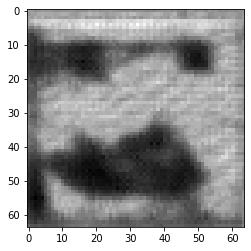

In [22]:
generated_image(5)

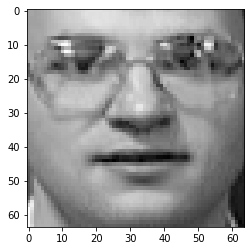

In [20]:
label_to_picture(5)

In [21]:
for i in range(10):
    evolve_generator(100, 0.001, 0.0002, 0.99, 1)
    d, l = discriminator_make_dataset()
    train_discriminator_eps(discriminator, 20, 0.001, 0.00001, d, l)

loss(generator):  19.95152893066406
loss(generator):  7.955206298828125
loss(generator):  5.30028190612793
loss(generator):  3.714390182495117
loss(generator):  3.4856639862060548
loss(generator):  3.4715309143066406
loss(generator):  3.4648086547851564
loss(generator):  3.422629547119141
loss(generator):  3.4299793243408203
loss(generator):  3.393572235107422
loss(generator):  3.3925052642822267
loss(generator):  3.387746810913086
loss(generator):  3.3738243103027346
loss(generator):  3.376146697998047
loss(generator):  3.379874420166016
loss(generator):  3.3537113189697267
loss(generator):  3.352671813964844
loss(generator):  3.3439659118652343
loss(generator):  3.337154006958008
loss(generator):  3.332490921020508
loss(generator):  3.3267608642578126
loss(generator):  3.3172885894775392
loss(generator):  3.3235023498535154
loss(generator):  3.30316162109375
loss(generator):  3.3024959564208984
loss(generator):  3.3042606353759765
loss(generator):  3.2887134552001953
loss(generator):

10it [00:00, 92.74it/s]

epoch start:  0
training ...


400it [00:05, 67.56it/s]
7it [00:00, 65.92it/s]

Epoch: 01 | Time: 0m 5s	Train Loss: 69.791
epoch start:  1
training ...


400it [00:05, 73.56it/s]
7it [00:00, 69.16it/s]

Epoch: 02 | Time: 0m 5s	Train Loss: 0.992
epoch start:  2
training ...


400it [00:05, 70.89it/s] 
7it [00:00, 54.99it/s]

Epoch: 03 | Time: 0m 5s	Train Loss: 0.519
epoch start:  3
training ...


400it [00:06, 57.88it/s]
6it [00:00, 53.80it/s]

Epoch: 04 | Time: 0m 6s	Train Loss: 0.353
epoch start:  4
training ...


400it [00:04, 85.80it/s] 
7it [00:00, 68.81it/s]

Epoch: 05 | Time: 0m 4s	Train Loss: 0.265
epoch start:  5
training ...


400it [00:05, 70.11it/s] 
11it [00:00, 108.06it/s]

Epoch: 06 | Time: 0m 5s	Train Loss: 0.210
epoch start:  6
training ...


400it [00:07, 55.37it/s]
7it [00:00, 69.75it/s]

Epoch: 07 | Time: 0m 7s	Train Loss: 0.173
epoch start:  7
training ...


400it [00:06, 65.27it/s]
6it [00:00, 55.66it/s]

Epoch: 08 | Time: 0m 6s	Train Loss: 0.146
epoch start:  8
training ...


400it [00:05, 69.83it/s] 
5it [00:00, 45.62it/s]

Epoch: 09 | Time: 0m 5s	Train Loss: 0.126
epoch start:  9
training ...


400it [00:04, 82.38it/s] 
9it [00:00, 77.61it/s]

Epoch: 10 | Time: 0m 4s	Train Loss: 0.111
epoch start:  10
training ...


400it [00:04, 89.00it/s] 
13it [00:00, 125.89it/s]

Epoch: 11 | Time: 0m 4s	Train Loss: 0.099
epoch start:  11
training ...


400it [00:04, 96.87it/s] 
9it [00:00, 82.89it/s]

Epoch: 12 | Time: 0m 4s	Train Loss: 0.089
epoch start:  12
training ...


400it [00:04, 81.25it/s] 
2it [00:00, 18.44it/s]

Epoch: 13 | Time: 0m 4s	Train Loss: 0.081
epoch start:  13
training ...


400it [00:05, 76.48it/s]
10it [00:00, 97.73it/s]

Epoch: 14 | Time: 0m 5s	Train Loss: 0.074
epoch start:  14
training ...


400it [00:07, 52.73it/s]
8it [00:00, 76.98it/s]

Epoch: 15 | Time: 0m 7s	Train Loss: 0.068
epoch start:  15
training ...


400it [00:07, 54.63it/s] 
7it [00:00, 59.89it/s]

Epoch: 16 | Time: 0m 7s	Train Loss: 0.063
epoch start:  16
training ...


400it [00:04, 91.68it/s] 
15it [00:00, 131.19it/s]

Epoch: 17 | Time: 0m 4s	Train Loss: 0.058
epoch start:  17
training ...


400it [00:04, 84.54it/s]
9it [00:00, 85.24it/s]

Epoch: 18 | Time: 0m 4s	Train Loss: 0.055
epoch start:  18
training ...


400it [00:04, 88.18it/s] 
12it [00:00, 113.46it/s]

Epoch: 19 | Time: 0m 4s	Train Loss: 0.051
epoch start:  19
training ...


400it [00:03, 107.85it/s]


Epoch: 20 | Time: 0m 3s	Train Loss: 0.048
loss(generator):  14.619503784179688
loss(generator):  5.8060462951660154
loss(generator):  3.2876434326171875
loss(generator):  3.253793716430664
loss(generator):  3.238824462890625
loss(generator):  3.2276519775390624
loss(generator):  3.2235080718994142
loss(generator):  3.1956350326538088
loss(generator):  3.190837860107422
loss(generator):  3.186169242858887
loss(generator):  3.1815990447998046
loss(generator):  3.1824689865112306
loss(generator):  3.175637435913086
loss(generator):  3.162627601623535
loss(generator):  3.1562023162841797
loss(generator):  3.158913803100586
loss(generator):  3.1446556091308593
loss(generator):  3.1481697082519533
loss(generator):  3.1396100997924803
loss(generator):  3.138113021850586
loss(generator):  3.130763626098633
loss(generator):  3.121773529052734
loss(generator):  3.127096939086914
loss(generator):  3.117848014831543
loss(generator):  3.11706657409668
loss(generator):  3.1074026107788084
loss(gener

6it [00:00, 56.86it/s]

epoch start:  0
training ...


400it [00:05, 78.59it/s] 
9it [00:00, 87.89it/s]

Epoch: 01 | Time: 0m 5s	Train Loss: 45.339
epoch start:  1
training ...


400it [00:05, 78.07it/s]
11it [00:00, 103.82it/s]

Epoch: 02 | Time: 0m 5s	Train Loss: 0.893
epoch start:  2
training ...


400it [00:06, 59.25it/s]
10it [00:00, 94.48it/s]

Epoch: 03 | Time: 0m 6s	Train Loss: 0.457
epoch start:  3
training ...


400it [00:04, 87.13it/s] 
10it [00:00, 93.25it/s]

Epoch: 04 | Time: 0m 4s	Train Loss: 0.313
epoch start:  4
training ...


400it [00:04, 83.23it/s]
8it [00:00, 77.99it/s]

Epoch: 05 | Time: 0m 4s	Train Loss: 0.239
epoch start:  5
training ...


400it [00:04, 90.65it/s]
9it [00:00, 86.73it/s]

Epoch: 06 | Time: 0m 4s	Train Loss: 0.193
epoch start:  6
training ...


400it [00:04, 80.44it/s] 
15it [00:00, 142.64it/s]

Epoch: 07 | Time: 0m 4s	Train Loss: 0.161
epoch start:  7
training ...


400it [00:04, 84.58it/s] 
11it [00:00, 101.13it/s]

Epoch: 08 | Time: 0m 4s	Train Loss: 0.137
epoch start:  8
training ...


400it [00:04, 84.92it/s] 
12it [00:00, 118.30it/s]

Epoch: 09 | Time: 0m 4s	Train Loss: 0.119
epoch start:  9
training ...


400it [00:05, 70.34it/s]
10it [00:00, 95.50it/s]

Epoch: 10 | Time: 0m 5s	Train Loss: 0.105
epoch start:  10
training ...


400it [00:03, 101.55it/s]
10it [00:00, 98.13it/s]

Epoch: 11 | Time: 0m 3s	Train Loss: 0.094
epoch start:  11
training ...


400it [00:04, 90.99it/s] 
10it [00:00, 95.72it/s]

Epoch: 12 | Time: 0m 4s	Train Loss: 0.084
epoch start:  12
training ...


400it [00:04, 90.11it/s] 
2it [00:00, 18.82it/s]

Epoch: 13 | Time: 0m 4s	Train Loss: 0.077
epoch start:  13
training ...


400it [00:04, 92.32it/s] 
9it [00:00, 89.16it/s]

Epoch: 14 | Time: 0m 4s	Train Loss: 0.071
epoch start:  14
training ...


400it [00:05, 79.99it/s] 
9it [00:00, 84.63it/s]

Epoch: 15 | Time: 0m 5s	Train Loss: 0.065
epoch start:  15
training ...


400it [00:04, 88.00it/s] 
7it [00:00, 68.24it/s]

Epoch: 16 | Time: 0m 4s	Train Loss: 0.060
epoch start:  16
training ...


400it [00:04, 86.59it/s] 
10it [00:00, 94.98it/s]

Epoch: 17 | Time: 0m 4s	Train Loss: 0.056
epoch start:  17
training ...


400it [00:05, 78.15it/s]
2it [00:00, 19.95it/s]

Epoch: 18 | Time: 0m 5s	Train Loss: 0.053
epoch start:  18
training ...


400it [00:07, 57.10it/s]
6it [00:00, 58.05it/s]

Epoch: 19 | Time: 0m 7s	Train Loss: 0.049
epoch start:  19
training ...


400it [00:05, 73.98it/s]


Epoch: 20 | Time: 0m 5s	Train Loss: 0.046
loss(generator):  23.064891052246093
loss(generator):  7.557707214355469
loss(generator):  4.330782699584961
loss(generator):  3.4788127899169923
loss(generator):  3.4567333221435548
loss(generator):  3.4463123321533202
loss(generator):  3.436293029785156
loss(generator):  3.4112518310546873
loss(generator):  3.4068599700927735
loss(generator):  3.3923366546630858
loss(generator):  3.392805480957031
loss(generator):  3.3759429931640623
loss(generator):  3.37255973815918
loss(generator):  3.3857700347900392
loss(generator):  3.375789260864258
loss(generator):  3.369929885864258
loss(generator):  3.366512680053711
loss(generator):  3.356772613525391
loss(generator):  3.348970413208008
loss(generator):  3.3431556701660154
loss(generator):  3.3451648712158204
loss(generator):  3.339618682861328
loss(generator):  3.3376205444335936
loss(generator):  3.3213886260986327
loss(generator):  3.327510452270508
loss(generator):  3.318085861206055
loss(gener

6it [00:00, 59.62it/s]

epoch start:  0
training ...


400it [00:08, 45.37it/s]
5it [00:00, 45.23it/s]

Epoch: 01 | Time: 0m 8s	Train Loss: 41.502
epoch start:  1
training ...


400it [00:06, 58.12it/s]
5it [00:00, 47.38it/s]

Epoch: 02 | Time: 0m 6s	Train Loss: 0.430
epoch start:  2
training ...


400it [00:09, 41.87it/s]
4it [00:00, 22.49it/s]

Epoch: 03 | Time: 0m 9s	Train Loss: 0.273
epoch start:  3
training ...


400it [00:09, 42.59it/s]
6it [00:00, 47.91it/s]

Epoch: 04 | Time: 0m 9s	Train Loss: 0.205
epoch start:  4
training ...


400it [00:08, 44.55it/s]
7it [00:00, 58.72it/s]

Epoch: 05 | Time: 0m 8s	Train Loss: 0.164
epoch start:  5
training ...


400it [00:06, 59.07it/s]
5it [00:00, 42.19it/s]

Epoch: 06 | Time: 0m 6s	Train Loss: 0.136
epoch start:  6
training ...


400it [00:06, 59.24it/s]
5it [00:00, 35.01it/s]

Epoch: 07 | Time: 0m 6s	Train Loss: 0.117
epoch start:  7
training ...


400it [00:08, 45.40it/s]
2it [00:00, 13.79it/s]

Epoch: 08 | Time: 0m 8s	Train Loss: 0.102
epoch start:  8
training ...


400it [00:07, 51.42it/s]
9it [00:00, 78.51it/s]

Epoch: 09 | Time: 0m 7s	Train Loss: 0.091
epoch start:  9
training ...


400it [00:10, 39.21it/s]
6it [00:00, 40.16it/s]

Epoch: 10 | Time: 0m 10s	Train Loss: 0.081
epoch start:  10
training ...


400it [00:06, 57.15it/s]
11it [00:00, 100.65it/s]

Epoch: 11 | Time: 0m 7s	Train Loss: 0.074
epoch start:  11
training ...


400it [00:06, 57.51it/s]
4it [00:00, 33.24it/s]

Epoch: 12 | Time: 0m 6s	Train Loss: 0.067
epoch start:  12
training ...


400it [00:08, 48.06it/s]
5it [00:00, 27.80it/s]

Epoch: 13 | Time: 0m 8s	Train Loss: 0.062
epoch start:  13
training ...


400it [00:06, 60.73it/s]
13it [00:00, 123.99it/s]

Epoch: 14 | Time: 0m 6s	Train Loss: 0.057
epoch start:  14
training ...


400it [00:07, 54.09it/s]
7it [00:00, 68.38it/s]

Epoch: 15 | Time: 0m 7s	Train Loss: 0.054
epoch start:  15
training ...


400it [00:06, 65.79it/s]
7it [00:00, 66.31it/s]

Epoch: 16 | Time: 0m 6s	Train Loss: 0.050
epoch start:  16
training ...


400it [00:07, 54.81it/s]
4it [00:00, 39.90it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.047
epoch start:  17
training ...


400it [00:07, 53.92it/s]
4it [00:00, 38.25it/s]

Epoch: 18 | Time: 0m 7s	Train Loss: 0.044
epoch start:  18
training ...


400it [00:07, 53.27it/s]
8it [00:00, 75.75it/s]

Epoch: 19 | Time: 0m 7s	Train Loss: 0.042
epoch start:  19
training ...


400it [00:06, 57.56it/s]


Epoch: 20 | Time: 0m 6s	Train Loss: 0.039
loss(generator):  19.553700256347657
loss(generator):  3.8810279846191404
loss(generator):  3.3995838165283203
loss(generator):  3.388032150268555
loss(generator):  3.3788421630859373
loss(generator):  3.360342025756836
loss(generator):  3.3737606048583983
loss(generator):  3.3510589599609375
loss(generator):  3.344327926635742
loss(generator):  3.3426036834716797
loss(generator):  3.3288829803466795
loss(generator):  3.3212379455566405
loss(generator):  3.3369346618652345
loss(generator):  3.313651275634766
loss(generator):  3.306818389892578
loss(generator):  3.3027370452880858
loss(generator):  3.2838504791259764
loss(generator):  3.2919876098632814
loss(generator):  3.284720611572266
loss(generator):  3.2784652709960938
loss(generator):  3.272248458862305
loss(generator):  3.2732025146484376
loss(generator):  3.268342208862305
loss(generator):  3.2647666931152344
loss(generator):  3.2618667602539064
loss(generator):  3.246987533569336
loss(

0it [00:00, ?it/s]

epoch start:  0
training ...


400it [00:09, 43.94it/s]
5it [00:00, 48.62it/s]

Epoch: 01 | Time: 0m 9s	Train Loss: 38.458
epoch start:  1
training ...


400it [00:07, 50.83it/s]
5it [00:00, 37.93it/s]

Epoch: 02 | Time: 0m 7s	Train Loss: 0.743
epoch start:  2
training ...


400it [00:06, 57.59it/s]
4it [00:00, 38.65it/s]

Epoch: 03 | Time: 0m 6s	Train Loss: 0.430
epoch start:  3
training ...


400it [00:08, 46.76it/s]
8it [00:00, 76.12it/s]

Epoch: 04 | Time: 0m 8s	Train Loss: 0.299
epoch start:  4
training ...


400it [00:07, 53.37it/s]
5it [00:00, 42.54it/s]

Epoch: 05 | Time: 0m 7s	Train Loss: 0.228
epoch start:  5
training ...


400it [00:08, 45.06it/s]
3it [00:00, 23.28it/s]

Epoch: 06 | Time: 0m 8s	Train Loss: 0.184
epoch start:  6
training ...


400it [00:07, 52.03it/s]
4it [00:00, 38.36it/s]

Epoch: 07 | Time: 0m 7s	Train Loss: 0.153
epoch start:  7
training ...


400it [00:09, 42.25it/s]
6it [00:00, 45.17it/s]

Epoch: 08 | Time: 0m 9s	Train Loss: 0.130
epoch start:  8
training ...


400it [00:06, 63.73it/s]
5it [00:00, 34.95it/s]

Epoch: 09 | Time: 0m 6s	Train Loss: 0.113
epoch start:  9
training ...


400it [00:06, 62.50it/s]
7it [00:00, 65.28it/s]

Epoch: 10 | Time: 0m 6s	Train Loss: 0.100
epoch start:  10
training ...


400it [00:07, 51.25it/s]
4it [00:00, 37.24it/s]

Epoch: 11 | Time: 0m 7s	Train Loss: 0.089
epoch start:  11
training ...


400it [00:08, 46.31it/s]
3it [00:00, 28.96it/s]

Epoch: 12 | Time: 0m 8s	Train Loss: 0.081
epoch start:  12
training ...


400it [00:08, 47.73it/s]
5it [00:00, 39.62it/s]

Epoch: 13 | Time: 0m 8s	Train Loss: 0.073
epoch start:  13
training ...


400it [00:06, 60.31it/s]
0it [00:00, ?it/s]

Epoch: 14 | Time: 0m 6s	Train Loss: 0.067
epoch start:  14
training ...


400it [00:07, 51.16it/s]
9it [00:00, 75.07it/s]

Epoch: 15 | Time: 0m 7s	Train Loss: 0.062
epoch start:  15
training ...


400it [00:08, 47.25it/s]
8it [00:00, 60.26it/s]

Epoch: 16 | Time: 0m 8s	Train Loss: 0.057
epoch start:  16
training ...


400it [00:07, 51.58it/s]
7it [00:00, 69.99it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.054
epoch start:  17
training ...


400it [00:06, 66.01it/s]
7it [00:00, 68.20it/s]

Epoch: 18 | Time: 0m 6s	Train Loss: 0.050
epoch start:  18
training ...


400it [00:06, 62.90it/s]
2it [00:00, 14.01it/s]

Epoch: 19 | Time: 0m 6s	Train Loss: 0.047
epoch start:  19
training ...


400it [00:08, 47.77it/s]


Epoch: 20 | Time: 0m 8s	Train Loss: 0.044
loss(generator):  14.472492980957032
loss(generator):  5.679822540283203
loss(generator):  4.192343139648438
loss(generator):  3.5767772674560545
loss(generator):  3.3130847930908205
loss(generator):  3.193628692626953
loss(generator):  3.2027286529541015
loss(generator):  3.21561279296875
loss(generator):  3.19036808013916
loss(generator):  3.187695121765137
loss(generator):  3.171692657470703
loss(generator):  3.1764469146728516
loss(generator):  3.16583251953125
loss(generator):  3.1626070022583006
loss(generator):  3.159514808654785
loss(generator):  3.146244430541992
loss(generator):  3.139571952819824
loss(generator):  3.1279733657836912
loss(generator):  3.122801399230957
loss(generator):  3.133588981628418
loss(generator):  3.1253957748413086
loss(generator):  3.117580223083496
loss(generator):  3.109004592895508
loss(generator):  3.1155879974365233
loss(generator):  3.100663757324219
loss(generator):  3.104343795776367
loss(generator):

1it [00:00,  9.76it/s]

epoch start:  0
training ...


400it [00:08, 47.02it/s]
1it [00:00,  9.91it/s]

Epoch: 01 | Time: 0m 8s	Train Loss: 34.318
epoch start:  1
training ...


400it [00:10, 39.92it/s]
7it [00:00, 51.40it/s]

Epoch: 02 | Time: 0m 10s	Train Loss: 0.786
epoch start:  2
training ...


400it [00:07, 50.37it/s]
5it [00:00, 34.92it/s]

Epoch: 03 | Time: 0m 7s	Train Loss: 0.475
epoch start:  3
training ...


400it [00:07, 55.58it/s]
5it [00:00, 40.83it/s]

Epoch: 04 | Time: 0m 7s	Train Loss: 0.342
epoch start:  4
training ...


400it [00:08, 49.99it/s]
5it [00:00, 45.62it/s]

Epoch: 05 | Time: 0m 8s	Train Loss: 0.267
epoch start:  5
training ...


400it [00:07, 50.16it/s]
7it [00:00, 62.11it/s]

Epoch: 06 | Time: 0m 7s	Train Loss: 0.219
epoch start:  6
training ...


400it [00:08, 47.20it/s]
2it [00:00, 19.56it/s]

Epoch: 07 | Time: 0m 8s	Train Loss: 0.185
epoch start:  7
training ...


400it [00:05, 68.24it/s]
5it [00:00, 48.22it/s]

Epoch: 08 | Time: 0m 5s	Train Loss: 0.160
epoch start:  8
training ...


400it [00:06, 58.78it/s]
9it [00:00, 89.01it/s]

Epoch: 09 | Time: 0m 6s	Train Loss: 0.140
epoch start:  9
training ...


400it [00:06, 63.88it/s]
2it [00:00, 15.89it/s]

Epoch: 10 | Time: 0m 6s	Train Loss: 0.124
epoch start:  10
training ...


400it [00:07, 51.85it/s]
8it [00:00, 76.43it/s]

Epoch: 11 | Time: 0m 7s	Train Loss: 0.112
epoch start:  11
training ...


400it [00:05, 66.86it/s]
3it [00:00, 29.15it/s]

Epoch: 12 | Time: 0m 5s	Train Loss: 0.102
epoch start:  12
training ...


400it [00:07, 53.54it/s]
5it [00:00, 44.00it/s]

Epoch: 13 | Time: 0m 7s	Train Loss: 0.093
epoch start:  13
training ...


400it [00:08, 46.84it/s]
6it [00:00, 35.38it/s]

Epoch: 14 | Time: 0m 8s	Train Loss: 0.085
epoch start:  14
training ...


400it [00:09, 43.11it/s]
7it [00:00, 53.22it/s]

Epoch: 15 | Time: 0m 9s	Train Loss: 0.079
epoch start:  15
training ...


400it [00:08, 47.22it/s]
8it [00:00, 71.61it/s]

Epoch: 16 | Time: 0m 8s	Train Loss: 0.074
epoch start:  16
training ...


400it [00:07, 56.46it/s]
9it [00:00, 87.66it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.069
epoch start:  17
training ...


400it [00:05, 70.12it/s]
2it [00:00, 16.73it/s]

Epoch: 18 | Time: 0m 5s	Train Loss: 0.065
epoch start:  18
training ...


400it [00:08, 49.08it/s]
3it [00:00, 25.11it/s]

Epoch: 19 | Time: 0m 8s	Train Loss: 0.061
epoch start:  19
training ...


400it [00:09, 44.17it/s]


Epoch: 20 | Time: 0m 9s	Train Loss: 0.058
loss(generator):  21.885536193847656
loss(generator):  6.485425567626953
loss(generator):  3.4613983154296877
loss(generator):  3.3286209106445312
loss(generator):  3.320933151245117
loss(generator):  3.311782455444336
loss(generator):  3.310141372680664
loss(generator):  3.2999515533447266
loss(generator):  3.2958431243896484
loss(generator):  3.28436279296875
loss(generator):  3.280231475830078
loss(generator):  3.271267318725586
loss(generator):  3.286115264892578
loss(generator):  3.268258285522461
loss(generator):  3.2651382446289063
loss(generator):  3.2383209228515626
loss(generator):  3.2496944427490235
loss(generator):  3.2451053619384767
loss(generator):  3.234690475463867
loss(generator):  3.2352840423583986
loss(generator):  3.2188594818115233
loss(generator):  3.2196998596191406
loss(generator):  3.210837173461914
loss(generator):  3.2043331146240233
loss(generator):  3.1968475341796876
loss(generator):  3.1988868713378906
loss(gen

10it [00:00, 79.92it/s]

epoch start:  0
training ...


400it [00:08, 48.50it/s]
4it [00:00, 37.46it/s]

Epoch: 01 | Time: 0m 8s	Train Loss: 45.085
epoch start:  1
training ...


400it [00:07, 52.73it/s]
6it [00:00, 50.18it/s]

Epoch: 02 | Time: 0m 7s	Train Loss: 0.620
epoch start:  2
training ...


400it [00:07, 57.09it/s]
5it [00:00, 31.97it/s]

Epoch: 03 | Time: 0m 7s	Train Loss: 0.373
epoch start:  3
training ...


400it [00:08, 46.14it/s]
3it [00:00, 29.56it/s]

Epoch: 04 | Time: 0m 8s	Train Loss: 0.265
epoch start:  4
training ...


400it [00:07, 53.22it/s]
6it [00:00, 42.75it/s]

Epoch: 05 | Time: 0m 7s	Train Loss: 0.203
epoch start:  5
training ...


400it [00:07, 50.34it/s]
6it [00:00, 59.67it/s]

Epoch: 06 | Time: 0m 7s	Train Loss: 0.164
epoch start:  6
training ...


400it [00:07, 53.69it/s]
1it [00:00,  8.30it/s]

Epoch: 07 | Time: 0m 7s	Train Loss: 0.137
epoch start:  7
training ...


400it [00:07, 50.66it/s]
8it [00:00, 73.55it/s]

Epoch: 08 | Time: 0m 7s	Train Loss: 0.117
epoch start:  8
training ...


400it [00:08, 44.84it/s]
6it [00:00, 56.28it/s]

Epoch: 09 | Time: 0m 8s	Train Loss: 0.102
epoch start:  9
training ...


400it [00:08, 48.28it/s]
5it [00:00, 45.79it/s]

Epoch: 10 | Time: 0m 8s	Train Loss: 0.090
epoch start:  10
training ...


400it [00:09, 43.35it/s]
6it [00:00, 54.01it/s]

Epoch: 11 | Time: 0m 9s	Train Loss: 0.081
epoch start:  11
training ...


400it [00:08, 48.79it/s]
6it [00:00, 58.82it/s]

Epoch: 12 | Time: 0m 8s	Train Loss: 0.073
epoch start:  12
training ...


400it [00:09, 42.95it/s]
7it [00:00, 66.41it/s]

Epoch: 13 | Time: 0m 9s	Train Loss: 0.066
epoch start:  13
training ...


400it [00:07, 50.04it/s]
6it [00:00, 44.36it/s]

Epoch: 14 | Time: 0m 7s	Train Loss: 0.061
epoch start:  14
training ...


400it [00:06, 57.33it/s]
7it [00:00, 68.40it/s]

Epoch: 15 | Time: 0m 6s	Train Loss: 0.056
epoch start:  15
training ...


400it [00:06, 59.15it/s]
1it [00:00,  7.49it/s]

Epoch: 16 | Time: 0m 6s	Train Loss: 0.052
epoch start:  16
training ...


400it [00:07, 52.45it/s]
7it [00:00, 60.55it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.049
epoch start:  17
training ...


400it [00:08, 46.72it/s]
8it [00:00, 75.28it/s]

Epoch: 18 | Time: 0m 8s	Train Loss: 0.045
epoch start:  18
training ...


400it [00:07, 50.26it/s]
5it [00:00, 38.83it/s]

Epoch: 19 | Time: 0m 7s	Train Loss: 0.043
epoch start:  19
training ...


400it [00:06, 60.86it/s]


Epoch: 20 | Time: 0m 6s	Train Loss: 0.040
loss(generator):  13.92718048095703
loss(generator):  3.3315406799316407
loss(generator):  3.2417186737060546
loss(generator):  3.1574237823486326
loss(generator):  3.151394844055176
loss(generator):  3.1416955947875977
loss(generator):  3.1354156494140626
loss(generator):  3.1390459060668947
loss(generator):  3.102238655090332
loss(generator):  3.10870475769043
loss(generator):  3.0992225646972655
loss(generator):  3.099476432800293
loss(generator):  3.087398338317871
loss(generator):  3.0873954772949217
loss(generator):  3.069160270690918
loss(generator):  3.071420669555664
loss(generator):  3.066132164001465
loss(generator):  3.0690479278564453
loss(generator):  3.0569252014160155
loss(generator):  3.0464412689208986
loss(generator):  3.045218086242676
loss(generator):  3.0289596557617187
loss(generator):  3.0287450790405273
loss(generator):  3.035068321228027
loss(generator):  3.0116052627563477
loss(generator):  3.009354019165039
loss(gene

6it [00:00, 50.94it/s]

epoch start:  0
training ...


400it [00:08, 44.70it/s]
7it [00:00, 66.04it/s]

Epoch: 01 | Time: 0m 8s	Train Loss: 22.415
epoch start:  1
training ...


400it [00:09, 41.35it/s]
4it [00:00, 37.27it/s]

Epoch: 02 | Time: 0m 9s	Train Loss: 0.435
epoch start:  2
training ...


400it [00:06, 60.76it/s]
7it [00:00, 59.68it/s]

Epoch: 03 | Time: 0m 6s	Train Loss: 0.293
epoch start:  3
training ...


400it [00:06, 59.42it/s]
9it [00:00, 87.38it/s]

Epoch: 04 | Time: 0m 6s	Train Loss: 0.220
epoch start:  4
training ...


400it [00:07, 52.85it/s]
5it [00:00, 41.49it/s]

Epoch: 05 | Time: 0m 7s	Train Loss: 0.175
epoch start:  5
training ...


400it [00:09, 42.67it/s]
11it [00:00, 95.56it/s]

Epoch: 06 | Time: 0m 9s	Train Loss: 0.145
epoch start:  6
training ...


400it [00:07, 50.76it/s]
3it [00:00, 24.00it/s]

Epoch: 07 | Time: 0m 7s	Train Loss: 0.123
epoch start:  7
training ...


400it [00:07, 52.03it/s]
12it [00:00, 101.25it/s]

Epoch: 08 | Time: 0m 7s	Train Loss: 0.108
epoch start:  8
training ...


400it [00:07, 53.92it/s]
8it [00:00, 59.41it/s]

Epoch: 09 | Time: 0m 7s	Train Loss: 0.095
epoch start:  9
training ...


400it [00:08, 49.87it/s]
0it [00:00, ?it/s]

Epoch: 10 | Time: 0m 8s	Train Loss: 0.085
epoch start:  10
training ...


400it [00:08, 45.52it/s]
5it [00:00, 43.83it/s]

Epoch: 11 | Time: 0m 8s	Train Loss: 0.077
epoch start:  11
training ...


400it [00:07, 51.01it/s]
6it [00:00, 54.84it/s]

Epoch: 12 | Time: 0m 7s	Train Loss: 0.070
epoch start:  12
training ...


400it [00:07, 51.65it/s]
9it [00:00, 80.43it/s]

Epoch: 13 | Time: 0m 7s	Train Loss: 0.064
epoch start:  13
training ...


400it [00:09, 41.04it/s]
4it [00:00, 35.72it/s]

Epoch: 14 | Time: 0m 9s	Train Loss: 0.059
epoch start:  14
training ...


400it [00:09, 42.73it/s]
7it [00:00, 62.95it/s]

Epoch: 15 | Time: 0m 9s	Train Loss: 0.055
epoch start:  15
training ...


400it [00:07, 53.15it/s] 
7it [00:00, 58.77it/s]

Epoch: 16 | Time: 0m 7s	Train Loss: 0.051
epoch start:  16
training ...


400it [00:07, 52.25it/s]
4it [00:00, 25.74it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.048
epoch start:  17
training ...


400it [00:08, 45.17it/s]
1it [00:00,  8.96it/s]

Epoch: 18 | Time: 0m 8s	Train Loss: 0.045
epoch start:  18
training ...


400it [00:10, 39.71it/s]
8it [00:00, 70.00it/s]

Epoch: 19 | Time: 0m 10s	Train Loss: 0.043
epoch start:  19
training ...


400it [00:07, 57.09it/s]


Epoch: 20 | Time: 0m 7s	Train Loss: 0.040
loss(generator):  16.917861938476562
loss(generator):  4.20677490234375
loss(generator):  3.2821277618408202
loss(generator):  3.2500953674316406
loss(generator):  3.228132629394531
loss(generator):  3.2170623779296874
loss(generator):  3.182616424560547
loss(generator):  3.167938804626465
loss(generator):  3.14871768951416
loss(generator):  3.1430408477783205
loss(generator):  3.1262388229370117
loss(generator):  3.1159618377685545
loss(generator):  3.106317329406738
loss(generator):  3.0839210510253907
loss(generator):  3.083447074890137
loss(generator):  3.0642152786254884
loss(generator):  3.05435848236084
loss(generator):  3.0438323974609376
loss(generator):  3.0384117126464845
loss(generator):  3.022283172607422
loss(generator):  3.016737365722656
loss(generator):  3.016415596008301
loss(generator):  3.0029937744140627
loss(generator):  3.0038677215576173
loss(generator):  2.9979175567626952
loss(generator):  2.977072525024414
loss(genera

4it [00:00, 38.08it/s]

epoch start:  0
training ...


400it [00:06, 65.26it/s]
7it [00:00, 66.02it/s]

Epoch: 01 | Time: 0m 6s	Train Loss: 19.027
epoch start:  1
training ...


400it [00:07, 54.38it/s]
7it [00:00, 60.65it/s]

Epoch: 02 | Time: 0m 7s	Train Loss: 0.252
epoch start:  2
training ...


400it [00:10, 38.79it/s]
6it [00:00, 48.69it/s]

Epoch: 03 | Time: 0m 10s	Train Loss: 0.175
epoch start:  3
training ...


400it [00:07, 54.63it/s]
8it [00:00, 73.26it/s]

Epoch: 04 | Time: 0m 7s	Train Loss: 0.137
epoch start:  4
training ...


400it [00:07, 51.57it/s]
6it [00:00, 54.36it/s]

Epoch: 05 | Time: 0m 7s	Train Loss: 0.112
epoch start:  5
training ...


400it [00:08, 49.88it/s]
4it [00:00, 34.18it/s]

Epoch: 06 | Time: 0m 8s	Train Loss: 0.096
epoch start:  6
training ...


400it [00:08, 48.92it/s]
5it [00:00, 44.72it/s]

Epoch: 07 | Time: 0m 8s	Train Loss: 0.083
epoch start:  7
training ...


400it [00:08, 45.68it/s]
4it [00:00, 39.55it/s]

Epoch: 08 | Time: 0m 8s	Train Loss: 0.074
epoch start:  8
training ...


400it [00:07, 56.71it/s]
5it [00:00, 44.88it/s]

Epoch: 09 | Time: 0m 7s	Train Loss: 0.066
epoch start:  9
training ...


400it [00:07, 52.31it/s]
4it [00:00, 24.32it/s]

Epoch: 10 | Time: 0m 7s	Train Loss: 0.060
epoch start:  10
training ...


400it [00:08, 46.11it/s]
6it [00:00, 53.03it/s]

Epoch: 11 | Time: 0m 8s	Train Loss: 0.055
epoch start:  11
training ...


400it [00:09, 43.71it/s]
8it [00:00, 79.56it/s]

Epoch: 12 | Time: 0m 9s	Train Loss: 0.051
epoch start:  12
training ...


400it [00:07, 57.01it/s]
7it [00:00, 65.89it/s]

Epoch: 13 | Time: 0m 7s	Train Loss: 0.047
epoch start:  13
training ...


400it [00:07, 52.42it/s] 
2it [00:00, 13.60it/s]

Epoch: 14 | Time: 0m 7s	Train Loss: 0.044
epoch start:  14
training ...


400it [00:08, 44.85it/s]
5it [00:00, 48.85it/s]

Epoch: 15 | Time: 0m 8s	Train Loss: 0.041
epoch start:  15
training ...


400it [00:08, 47.99it/s]
9it [00:00, 85.41it/s]

Epoch: 16 | Time: 0m 8s	Train Loss: 0.038
epoch start:  16
training ...


400it [00:07, 55.69it/s]
10it [00:00, 83.32it/s]

Epoch: 17 | Time: 0m 7s	Train Loss: 0.036
epoch start:  17
training ...


400it [00:07, 57.00it/s]
3it [00:00, 28.68it/s]

Epoch: 18 | Time: 0m 7s	Train Loss: 0.034
epoch start:  18
training ...


400it [00:09, 42.65it/s]
5it [00:00, 49.95it/s]

Epoch: 19 | Time: 0m 9s	Train Loss: 0.032
epoch start:  19
training ...


400it [00:07, 56.87it/s]


Epoch: 20 | Time: 0m 7s	Train Loss: 0.031
loss(generator):  18.092990112304687
loss(generator):  3.6206954956054687
loss(generator):  3.2782081604003905
loss(generator):  3.277059555053711
loss(generator):  3.2415061950683595
loss(generator):  3.232279968261719
loss(generator):  3.2147285461425783
loss(generator):  3.2052478790283203
loss(generator):  3.2007209777832033
loss(generator):  3.174530601501465
loss(generator):  3.1622390747070312
loss(generator):  3.1597753524780274
loss(generator):  3.1407690048217773
loss(generator):  3.12845458984375
loss(generator):  3.120077705383301
loss(generator):  3.1064102172851564
loss(generator):  3.107998085021973
loss(generator):  3.1050125122070313
loss(generator):  3.086894989013672
loss(generator):  3.0773128509521483
loss(generator):  3.0686878204345702
loss(generator):  3.0749744415283202
loss(generator):  3.062839889526367
loss(generator):  3.0460962295532226
loss(generator):  3.039278030395508
loss(generator):  3.0352910995483398
loss(g

6it [00:00, 41.45it/s]

epoch start:  0
training ...


400it [00:08, 49.84it/s]
7it [00:00, 67.28it/s]

Epoch: 01 | Time: 0m 8s	Train Loss: 51.831
epoch start:  1
training ...


400it [00:08, 47.84it/s]
8it [00:00, 79.11it/s]

Epoch: 02 | Time: 0m 8s	Train Loss: 0.459
epoch start:  2
training ...


400it [00:09, 44.03it/s]
9it [00:00, 69.12it/s]

Epoch: 03 | Time: 0m 9s	Train Loss: 0.252
epoch start:  3
training ...


400it [00:06, 57.43it/s]
1it [00:00,  5.73it/s]

Epoch: 04 | Time: 0m 6s	Train Loss: 0.187
epoch start:  4
training ...


400it [00:08, 48.73it/s]
6it [00:00, 54.72it/s]

Epoch: 05 | Time: 0m 8s	Train Loss: 0.149
epoch start:  5
training ...


400it [00:08, 48.66it/s]
5it [00:00, 44.90it/s]

Epoch: 06 | Time: 0m 8s	Train Loss: 0.124
epoch start:  6
training ...


400it [00:07, 55.66it/s]
7it [00:00, 60.94it/s]

Epoch: 07 | Time: 0m 7s	Train Loss: 0.105
epoch start:  7
training ...


400it [00:06, 64.58it/s]
5it [00:00, 40.91it/s]

Epoch: 08 | Time: 0m 6s	Train Loss: 0.091
epoch start:  8
training ...


400it [00:07, 52.06it/s]
1it [00:00,  7.78it/s]

Epoch: 09 | Time: 0m 7s	Train Loss: 0.081
epoch start:  9
training ...


400it [00:10, 38.31it/s]
4it [00:00, 39.40it/s]

Epoch: 10 | Time: 0m 10s	Train Loss: 0.072
epoch start:  10
training ...


400it [00:08, 48.77it/s]
2it [00:00, 17.83it/s]

Epoch: 11 | Time: 0m 8s	Train Loss: 0.066
epoch start:  11
training ...


400it [00:06, 62.16it/s]
4it [00:00, 35.39it/s]

Epoch: 12 | Time: 0m 6s	Train Loss: 0.060
epoch start:  12
training ...


400it [00:07, 52.45it/s]
7it [00:00, 66.17it/s]

Epoch: 13 | Time: 0m 7s	Train Loss: 0.055
epoch start:  13
training ...


400it [00:09, 40.93it/s]
7it [00:00, 64.73it/s]

Epoch: 14 | Time: 0m 9s	Train Loss: 0.051
epoch start:  14
training ...


400it [00:07, 56.08it/s]
5it [00:00, 46.57it/s]

Epoch: 15 | Time: 0m 7s	Train Loss: 0.047
epoch start:  15
training ...


400it [00:06, 59.36it/s]
10it [00:00, 91.97it/s]

Epoch: 16 | Time: 0m 6s	Train Loss: 0.044
epoch start:  16
training ...


400it [00:08, 46.03it/s]
3it [00:00, 25.83it/s]

Epoch: 17 | Time: 0m 8s	Train Loss: 0.041
epoch start:  17
training ...


400it [00:08, 46.07it/s]
6it [00:00, 53.46it/s]

Epoch: 18 | Time: 0m 8s	Train Loss: 0.039
epoch start:  18
training ...


400it [00:07, 56.74it/s]
0it [00:00, ?it/s]

Epoch: 19 | Time: 0m 7s	Train Loss: 0.037
epoch start:  19
training ...


400it [00:07, 50.26it/s]


Epoch: 20 | Time: 0m 7s	Train Loss: 0.035
loss(generator):  23.970050048828124
loss(generator):  5.159431457519531
loss(generator):  3.3227420806884767
loss(generator):  3.1270977020263673
loss(generator):  3.101645660400391
loss(generator):  3.0838153839111326
loss(generator):  3.0795475006103517
loss(generator):  3.078261375427246
loss(generator):  3.0639484405517576
loss(generator):  3.045377731323242
loss(generator):  3.0424699783325195
loss(generator):  3.0308303833007812
loss(generator):  3.022872734069824
loss(generator):  3.015738868713379
loss(generator):  3.0001420974731445
loss(generator):  3.0026288986206056
loss(generator):  3.0066333770751954
loss(generator):  2.9844125747680663
loss(generator):  2.975698471069336
loss(generator):  2.9684738159179687
loss(generator):  2.9718143463134767
loss(generator):  2.9647151947021486
loss(generator):  2.94686222076416
loss(generator):  2.9489517211914062
loss(generator):  2.9445261001586913
loss(generator):  2.935921478271484
loss(g

6it [00:00, 46.16it/s]

epoch start:  0
training ...


400it [00:09, 42.90it/s]
4it [00:00, 25.75it/s]

Epoch: 01 | Time: 0m 9s	Train Loss: 17.544
epoch start:  1
training ...


400it [00:07, 50.73it/s]
4it [00:00, 32.89it/s]

Epoch: 02 | Time: 0m 7s	Train Loss: 0.325
epoch start:  2
training ...


400it [00:08, 45.02it/s]
0it [00:00, ?it/s]

Epoch: 03 | Time: 0m 8s	Train Loss: 0.175
epoch start:  3
training ...


400it [00:06, 58.28it/s]
9it [00:00, 83.18it/s]

Epoch: 04 | Time: 0m 6s	Train Loss: 0.135
epoch start:  4
training ...


400it [00:07, 52.75it/s]
4it [00:00, 37.00it/s]

Epoch: 05 | Time: 0m 7s	Train Loss: 0.111
epoch start:  5
training ...


400it [00:08, 49.67it/s]
0it [00:00, ?it/s]

Epoch: 06 | Time: 0m 8s	Train Loss: 0.093
epoch start:  6
training ...


400it [00:09, 42.47it/s]
11it [00:00, 106.40it/s]

Epoch: 07 | Time: 0m 9s	Train Loss: 0.081
epoch start:  7
training ...


400it [00:06, 61.97it/s]
13it [00:00, 118.35it/s]

Epoch: 08 | Time: 0m 6s	Train Loss: 0.071
epoch start:  8
training ...


400it [00:07, 54.87it/s]
8it [00:00, 51.48it/s]

Epoch: 09 | Time: 0m 7s	Train Loss: 0.064
epoch start:  9
training ...


400it [00:07, 56.90it/s]
11it [00:00, 78.02it/s]

Epoch: 10 | Time: 0m 7s	Train Loss: 0.057
epoch start:  10
training ...


400it [00:07, 54.51it/s]
6it [00:00, 54.64it/s]

Epoch: 11 | Time: 0m 7s	Train Loss: 0.052
epoch start:  11
training ...


400it [00:08, 44.82it/s]
9it [00:00, 74.84it/s]

Epoch: 12 | Time: 0m 8s	Train Loss: 0.048
epoch start:  12
training ...


400it [00:08, 48.77it/s]
7it [00:00, 66.58it/s]

Epoch: 13 | Time: 0m 8s	Train Loss: 0.044
epoch start:  13
training ...


400it [00:06, 63.65it/s]
4it [00:00, 29.32it/s]

Epoch: 14 | Time: 0m 6s	Train Loss: 0.041
epoch start:  14
training ...


400it [00:06, 62.13it/s]
4it [00:00, 29.75it/s]

Epoch: 15 | Time: 0m 6s	Train Loss: 0.038
epoch start:  15
training ...


400it [00:08, 47.65it/s]
3it [00:00, 27.27it/s]

Epoch: 16 | Time: 0m 8s	Train Loss: 0.036
epoch start:  16
training ...


400it [00:09, 43.28it/s]
3it [00:00, 27.37it/s]

Epoch: 17 | Time: 0m 9s	Train Loss: 0.034
epoch start:  17
training ...


400it [00:05, 73.68it/s]
3it [00:00, 29.08it/s]

Epoch: 18 | Time: 0m 5s	Train Loss: 0.032
epoch start:  18
training ...


400it [00:07, 53.66it/s]
4it [00:00, 27.06it/s]

Epoch: 19 | Time: 0m 7s	Train Loss: 0.030
epoch start:  19
training ...


400it [00:09, 43.94it/s]

Epoch: 20 | Time: 0m 9s	Train Loss: 0.029


In [28]:
################

In [23]:
for i in range(30):
    evolve_generator(100, 0.001, 0.0001, 0.99, 1)
    d, l = discriminator_make_dataset()
    train_discriminator_eps(discriminator, 10, 0.001, 0.00001, d, l)

loss(generator):  13.796034240722657
loss(generator):  7.299481201171875
loss(generator):  3.735024261474609
loss(generator):  3.630924606323242
loss(generator):  3.6296497344970704
loss(generator):  3.6212635040283203
loss(generator):  3.631499099731445
loss(generator):  3.629668426513672
loss(generator):  3.635057830810547
loss(generator):  3.6232208251953124
loss(generator):  3.619619369506836
loss(generator):  3.6261528015136717
loss(generator):  3.6312179565429688
loss(generator):  3.6275970458984377
loss(generator):  3.6223472595214843
loss(generator):  3.620796966552734
loss(generator):  3.624135971069336
loss(generator):  3.6265613555908205
loss(generator):  3.6256038665771486
loss(generator):  3.6290287017822265
loss(generator):  3.6241615295410154
loss(generator):  3.6216056823730467
loss(generator):  3.6278827667236326
loss(generator):  3.626547622680664
loss(generator):  3.6269153594970702
loss(generator):  3.621124267578125
loss(generator):  3.6229221343994142
loss(generat

21it [00:00, 206.73it/s]

epoch start:  0
training ...


400it [00:01, 215.76it/s]
21it [00:00, 201.26it/s]

Epoch: 01 | Time: 0m 1s	Train Loss: 88.180
epoch start:  1
training ...


400it [00:02, 186.03it/s]
19it [00:00, 189.86it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 2.056
epoch start:  2
training ...


400it [00:02, 169.67it/s]
17it [00:00, 169.48it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 2.500
epoch start:  3
training ...


400it [00:02, 172.15it/s]
17it [00:00, 165.32it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.555
epoch start:  4
training ...


400it [00:02, 171.07it/s]
18it [00:00, 174.81it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.240
epoch start:  5
training ...


400it [00:02, 171.58it/s]
19it [00:00, 181.77it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.148
epoch start:  6
training ...


400it [00:02, 174.37it/s]
18it [00:00, 171.36it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.109
epoch start:  7
training ...


400it [00:02, 169.82it/s]
17it [00:00, 161.59it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.089
epoch start:  8
training ...


400it [00:02, 166.05it/s]
18it [00:00, 170.36it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.074
epoch start:  9
training ...


400it [00:02, 169.00it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.065
loss(generator):  18.96562805175781
loss(generator):  3.8474811553955077
loss(generator):  3.7516284942626954
loss(generator):  3.6079631805419923
loss(generator):  3.742867660522461
loss(generator):  3.640132522583008
loss(generator):  3.6211280822753906
loss(generator):  3.609369659423828
loss(generator):  3.662187957763672
loss(generator):  3.630847930908203
loss(generator):  3.6497554779052734
loss(generator):  3.7270881652832033
loss(generator):  3.815655517578125
loss(generator):  3.6056468963623045
loss(generator):  3.6052505493164064
loss(generator):  3.613376235961914
loss(generator):  3.591997528076172
loss(generator):  3.5948116302490236
loss(generator):  3.602571487426758
loss(generator):  3.6147666931152345
loss(generator):  3.592693328857422
loss(generator):  3.6117580413818358
loss(generator):  3.5993415832519533
loss(generator):  3.6030323028564455
loss(generator):  3.6002269744873048
loss(generator):  3.5923297882080076
loss(ge

15it [00:00, 147.78it/s]

epoch start:  0
training ...


400it [00:02, 150.82it/s]
17it [00:00, 162.16it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 62.875
epoch start:  1
training ...


400it [00:02, 163.84it/s]
17it [00:00, 168.41it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 1.117
epoch start:  2
training ...


400it [00:02, 171.85it/s]
19it [00:00, 187.67it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.398
epoch start:  3
training ...


400it [00:02, 175.02it/s]
17it [00:00, 167.72it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.242
epoch start:  4
training ...


400it [00:02, 169.92it/s]
17it [00:00, 162.46it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.175
epoch start:  5
training ...


400it [00:02, 172.33it/s]
18it [00:00, 177.15it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.135
epoch start:  6
training ...


400it [00:02, 177.46it/s]
17it [00:00, 161.97it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.110
epoch start:  7
training ...


400it [00:02, 173.17it/s]
17it [00:00, 167.51it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.091
epoch start:  8
training ...


400it [00:02, 174.09it/s]
19it [00:00, 187.96it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.078
epoch start:  9
training ...


400it [00:02, 182.07it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.068
loss(generator):  13.932295227050782
loss(generator):  8.144080352783202
loss(generator):  8.603998565673828
loss(generator):  8.541697692871093
loss(generator):  6.4464363098144535
loss(generator):  5.38542366027832
loss(generator):  4.929291152954102
loss(generator):  4.054452514648437
loss(generator):  3.8738155364990234
loss(generator):  3.7411453247070314
loss(generator):  3.70634765625
loss(generator):  3.640459442138672
loss(generator):  3.6550758361816404
loss(generator):  3.6440139770507813
loss(generator):  3.644753265380859
loss(generator):  3.6403385162353517
loss(generator):  3.629423904418945
loss(generator):  3.6465427398681642
loss(generator):  3.619610595703125
loss(generator):  3.6259716033935545
loss(generator):  3.619510269165039
loss(generator):  3.6268653869628906
loss(generator):  3.619293975830078
loss(generator):  3.6175254821777343
loss(generator):  3.6165019989013674
loss(generator):  3.626613235473633
loss(generator)

15it [00:00, 147.85it/s]

epoch start:  0
training ...


400it [00:02, 183.98it/s]
15it [00:00, 149.42it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 27.306
epoch start:  1
training ...


400it [00:02, 169.17it/s]
15it [00:00, 146.68it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.824
epoch start:  2
training ...


400it [00:02, 158.27it/s]
15it [00:00, 145.19it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.357
epoch start:  3
training ...


400it [00:02, 157.29it/s]
17it [00:00, 164.23it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.225
epoch start:  4
training ...


400it [00:02, 170.39it/s]
17it [00:00, 169.72it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.163
epoch start:  5
training ...


400it [00:02, 181.62it/s]
19it [00:00, 177.16it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.126
epoch start:  6
training ...


400it [00:02, 178.87it/s]
19it [00:00, 178.75it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.102
epoch start:  7
training ...


400it [00:02, 178.74it/s]
20it [00:00, 193.84it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.086
epoch start:  8
training ...


400it [00:02, 182.28it/s]
17it [00:00, 165.23it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.073
epoch start:  9
training ...


400it [00:02, 174.25it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.064
loss(generator):  11.936331176757813
loss(generator):  9.658155059814453
loss(generator):  6.732155609130859
loss(generator):  6.77650146484375
loss(generator):  6.544319152832031
loss(generator):  6.573486328125
loss(generator):  6.441382598876953
loss(generator):  6.228442764282226
loss(generator):  6.1213127136230465
loss(generator):  6.057457351684571
loss(generator):  5.842243194580078
loss(generator):  5.672685241699218
loss(generator):  5.537421417236328
loss(generator):  5.417828750610352
loss(generator):  5.322850036621094
loss(generator):  5.134622192382812
loss(generator):  5.093461990356445
loss(generator):  5.006745910644531
loss(generator):  4.927519226074219
loss(generator):  4.794626235961914
loss(generator):  4.818428421020508
loss(generator):  4.683303451538086
loss(generator):  4.697563552856446
loss(generator):  4.636050415039063
loss(generator):  4.625363159179687
loss(generator):  4.575885391235351
loss(generator):  4.5613

15it [00:00, 147.42it/s]

epoch start:  0
training ...


400it [00:02, 164.15it/s]
17it [00:00, 167.71it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 23.399
epoch start:  1
training ...


400it [00:02, 167.32it/s]
21it [00:00, 206.01it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.238
epoch start:  2
training ...


400it [00:02, 173.16it/s]
19it [00:00, 183.65it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.141
epoch start:  3
training ...


400it [00:02, 176.07it/s]
17it [00:00, 159.61it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.102
epoch start:  4
training ...


400it [00:02, 164.77it/s]
17it [00:00, 168.34it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.080
epoch start:  5
training ...


400it [00:02, 170.49it/s]
16it [00:00, 149.64it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.066
epoch start:  6
training ...


400it [00:02, 164.14it/s]
18it [00:00, 171.04it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.055
epoch start:  7
training ...


400it [00:02, 172.08it/s]
18it [00:00, 176.11it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.047
epoch start:  8
training ...


400it [00:02, 170.88it/s]
12it [00:00, 119.49it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.041
epoch start:  9
training ...


400it [00:02, 157.92it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.037
loss(generator):  16.385783386230468
loss(generator):  6.746479034423828
loss(generator):  4.985157775878906
loss(generator):  3.822041320800781
loss(generator):  3.587174987792969
loss(generator):  3.5700382232666015
loss(generator):  3.609373092651367
loss(generator):  3.566117858886719
loss(generator):  3.563935470581055
loss(generator):  3.5743370056152344
loss(generator):  3.562685012817383
loss(generator):  3.5634235382080077
loss(generator):  3.5645824432373048
loss(generator):  3.5887001037597654
loss(generator):  3.565714645385742
loss(generator):  3.564356231689453
loss(generator):  3.5640331268310548
loss(generator):  3.558271789550781
loss(generator):  3.561880111694336
loss(generator):  3.567891311645508
loss(generator):  3.5619617462158204
loss(generator):  3.5636749267578125
loss(generator):  3.5651882171630858
loss(generator):  3.5581493377685547
loss(generator):  3.5600738525390625
loss(generator):  3.560862731933594
loss(gener

16it [00:00, 159.47it/s]

epoch start:  0
training ...


400it [00:02, 179.89it/s]
19it [00:00, 184.07it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 43.975
epoch start:  1
training ...


400it [00:02, 173.62it/s]
18it [00:00, 170.35it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.406
epoch start:  2
training ...


400it [00:02, 180.69it/s]
19it [00:00, 180.91it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.192
epoch start:  3
training ...


400it [00:02, 175.56it/s]
19it [00:00, 187.16it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.132
epoch start:  4
training ...


400it [00:02, 171.38it/s]
17it [00:00, 166.05it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.100
epoch start:  5
training ...


400it [00:02, 170.27it/s]
18it [00:00, 172.83it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.079
epoch start:  6
training ...


400it [00:02, 182.45it/s]
17it [00:00, 168.96it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.066
epoch start:  7
training ...


400it [00:02, 187.81it/s]
18it [00:00, 175.33it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.056
epoch start:  8
training ...


400it [00:02, 186.64it/s]
19it [00:00, 189.57it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.049
epoch start:  9
training ...


400it [00:02, 187.84it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.043
loss(generator):  15.135211181640624
loss(generator):  3.5990623474121093
loss(generator):  3.6322425842285155
loss(generator):  3.590287780761719
loss(generator):  3.5990535736083986
loss(generator):  3.5595420837402343
loss(generator):  3.5524635314941406
loss(generator):  3.5521240234375
loss(generator):  3.5495716094970704
loss(generator):  3.5569190979003906
loss(generator):  3.5516868591308595
loss(generator):  3.552059555053711
loss(generator):  3.570077133178711
loss(generator):  3.5597721099853517
loss(generator):  3.551016998291016
loss(generator):  3.6303760528564455
loss(generator):  3.5450435638427735
loss(generator):  3.563384246826172
loss(generator):  3.5463375091552733
loss(generator):  3.556089401245117
loss(generator):  3.578717041015625
loss(generator):  3.5379173278808596
loss(generator):  3.5407825469970704
loss(generator):  3.542876052856445
loss(generator):  3.53587646484375
loss(generator):  3.535291290283203
loss(gener

17it [00:00, 167.08it/s]

epoch start:  0
training ...


400it [00:02, 177.48it/s]
16it [00:00, 152.34it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 41.306
epoch start:  1
training ...


400it [00:02, 161.39it/s]
17it [00:00, 160.95it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.447
epoch start:  2
training ...


400it [00:02, 163.01it/s]
21it [00:00, 198.79it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.235
epoch start:  3
training ...


400it [00:02, 165.22it/s]
17it [00:00, 168.18it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.161
epoch start:  4
training ...


400it [00:02, 168.41it/s]
17it [00:00, 161.10it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.118
epoch start:  5
training ...


400it [00:02, 168.99it/s]
19it [00:00, 188.69it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.094
epoch start:  6
training ...


400it [00:02, 181.40it/s]
17it [00:00, 166.82it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.078
epoch start:  7
training ...


400it [00:02, 189.60it/s]
18it [00:00, 176.98it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.066
epoch start:  8
training ...


400it [00:02, 189.82it/s]
20it [00:00, 188.16it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.057
epoch start:  9
training ...


400it [00:02, 183.34it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.050
loss(generator):  13.208522033691406
loss(generator):  5.1022491455078125
loss(generator):  3.5854557037353514
loss(generator):  3.6010169982910156
loss(generator):  4.089616775512695
loss(generator):  3.560080718994141
loss(generator):  3.5688941955566404
loss(generator):  3.5977359771728517
loss(generator):  3.5574520111083983
loss(generator):  3.5980262756347656
loss(generator):  3.5768848419189454
loss(generator):  3.5528488159179688
loss(generator):  3.5503002166748048
loss(generator):  3.5485614776611327
loss(generator):  3.560227966308594
loss(generator):  3.5580398559570314
loss(generator):  3.5654933929443358
loss(generator):  3.552603912353516
loss(generator):  3.570431137084961
loss(generator):  3.548452377319336
loss(generator):  3.55079345703125
loss(generator):  3.550733184814453
loss(generator):  3.6139942169189454
loss(generator):  3.5495582580566407
loss(generator):  3.5498756408691405
loss(generator):  3.5482200622558593
loss(

17it [00:00, 168.94it/s]

epoch start:  0
training ...


400it [00:02, 168.48it/s]
16it [00:00, 159.31it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 27.458
epoch start:  1
training ...


400it [00:02, 169.50it/s]
17it [00:00, 163.86it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.708
epoch start:  2
training ...


400it [00:02, 172.06it/s]
18it [00:00, 179.11it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.318
epoch start:  3
training ...


400it [00:02, 169.96it/s]
18it [00:00, 177.99it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.214
epoch start:  4
training ...


400it [00:02, 177.54it/s]
17it [00:00, 166.59it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.158
epoch start:  5
training ...


400it [00:02, 179.04it/s]
18it [00:00, 174.97it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.125
epoch start:  6
training ...


400it [00:02, 174.89it/s]
18it [00:00, 170.36it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.103
epoch start:  7
training ...


400it [00:02, 174.85it/s]
19it [00:00, 181.69it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.087
epoch start:  8
training ...


400it [00:02, 175.80it/s]
16it [00:00, 154.08it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.075
epoch start:  9
training ...


400it [00:02, 177.28it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.066
loss(generator):  14.295306396484374
loss(generator):  7.653950500488281
loss(generator):  5.429603576660156
loss(generator):  4.1143848419189455
loss(generator):  3.567496109008789
loss(generator):  3.561184310913086
loss(generator):  3.5881168365478517
loss(generator):  3.5622184753417967
loss(generator):  3.5888317108154295
loss(generator):  3.56009521484375
loss(generator):  3.5600215911865236
loss(generator):  3.56097297668457
loss(generator):  3.560329055786133
loss(generator):  3.5697086334228514
loss(generator):  3.556857681274414
loss(generator):  3.554636764526367
loss(generator):  3.5561752319335938
loss(generator):  3.55621452331543
loss(generator):  3.5463050842285155
loss(generator):  3.5550155639648438
loss(generator):  3.5527980804443358
loss(generator):  3.553498458862305
loss(generator):  3.553493881225586
loss(generator):  3.5510974884033204
loss(generator):  3.5614837646484374
loss(generator):  3.5498558044433595
loss(genera

17it [00:00, 167.03it/s]

epoch start:  0
training ...


400it [00:02, 181.36it/s]
18it [00:00, 179.26it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 49.867
epoch start:  1
training ...


400it [00:02, 177.25it/s]
17it [00:00, 166.90it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.762
epoch start:  2
training ...


400it [00:02, 176.46it/s]
18it [00:00, 177.36it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.384
epoch start:  3
training ...


400it [00:02, 179.07it/s]
18it [00:00, 176.74it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.260
epoch start:  4
training ...


400it [00:02, 177.47it/s]
19it [00:00, 179.07it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.190
epoch start:  5
training ...


400it [00:02, 174.76it/s]
17it [00:00, 165.98it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.148
epoch start:  6
training ...


400it [00:02, 191.64it/s]
17it [00:00, 161.32it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.122
epoch start:  7
training ...


400it [00:02, 172.60it/s]
16it [00:00, 158.28it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.102
epoch start:  8
training ...


400it [00:02, 183.91it/s]
19it [00:00, 181.30it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.088
epoch start:  9
training ...


400it [00:02, 196.45it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.077
loss(generator):  13.722012329101563
loss(generator):  5.29893913269043
loss(generator):  4.766955947875976
loss(generator):  3.5555511474609376
loss(generator):  3.5634620666503904
loss(generator):  3.557926559448242
loss(generator):  3.5659008026123047
loss(generator):  3.558879852294922
loss(generator):  3.5579715728759767
loss(generator):  3.561684799194336
loss(generator):  3.549040985107422
loss(generator):  3.55457763671875
loss(generator):  3.550014877319336
loss(generator):  3.553812026977539
loss(generator):  3.553915786743164
loss(generator):  3.5453052520751953
loss(generator):  3.5662742614746095
loss(generator):  3.5592212677001953
loss(generator):  3.564120864868164
loss(generator):  3.5566261291503904
loss(generator):  3.5495635986328127
loss(generator):  3.5513847351074217
loss(generator):  3.549270248413086
loss(generator):  3.5480266571044923
loss(generator):  3.5441211700439452
loss(generator):  3.5448486328125
loss(generato

17it [00:00, 169.07it/s]

epoch start:  0
training ...


400it [00:02, 166.82it/s]
18it [00:00, 169.93it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 28.467
epoch start:  1
training ...


400it [00:02, 170.47it/s]
17it [00:00, 168.16it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.438
epoch start:  2
training ...


400it [00:02, 170.83it/s]
18it [00:00, 176.16it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.241
epoch start:  3
training ...


400it [00:02, 165.78it/s]
18it [00:00, 178.36it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.161
epoch start:  4
training ...


400it [00:02, 167.15it/s]
16it [00:00, 155.79it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.119
epoch start:  5
training ...


400it [00:02, 173.81it/s]
17it [00:00, 161.70it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.094
epoch start:  6
training ...


400it [00:02, 182.59it/s]
19it [00:00, 188.05it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.078
epoch start:  7
training ...


400it [00:02, 192.94it/s]
18it [00:00, 176.27it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.066
epoch start:  8
training ...


400it [00:02, 179.41it/s]
17it [00:00, 167.49it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.057
epoch start:  9
training ...


400it [00:02, 169.95it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.050
loss(generator):  12.5689453125
loss(generator):  8.29372329711914
loss(generator):  3.9117610931396483
loss(generator):  3.559662628173828
loss(generator):  3.5476818084716797
loss(generator):  3.5502700805664062
loss(generator):  3.5519947052001952
loss(generator):  3.553041458129883
loss(generator):  3.5488983154296876
loss(generator):  3.559027099609375
loss(generator):  3.552664566040039
loss(generator):  3.554491424560547
loss(generator):  3.5424335479736326
loss(generator):  3.5482154846191407
loss(generator):  3.548517608642578
loss(generator):  3.5543899536132812
loss(generator):  3.5499187469482423
loss(generator):  3.5540233612060548
loss(generator):  3.544972610473633
loss(generator):  3.5480319976806642
loss(generator):  3.543789291381836
loss(generator):  3.5418937683105467
loss(generator):  3.544432830810547
loss(generator):  3.550146484375
loss(generator):  3.5459056854248048
loss(generator):  3.5421199798583984
loss(generator):

16it [00:00, 158.89it/s]

epoch start:  0
training ...


400it [00:02, 168.64it/s]
21it [00:00, 206.04it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 45.379
epoch start:  1
training ...


400it [00:02, 180.58it/s]
18it [00:00, 178.49it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.621
epoch start:  2
training ...


400it [00:02, 184.52it/s]
22it [00:00, 216.55it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.304
epoch start:  3
training ...


400it [00:01, 216.23it/s]
22it [00:00, 216.68it/s]

Epoch: 04 | Time: 0m 1s	Train Loss: 0.207
epoch start:  4
training ...


400it [00:01, 209.98it/s]
19it [00:00, 188.41it/s]

Epoch: 05 | Time: 0m 1s	Train Loss: 0.155
epoch start:  5
training ...


400it [00:01, 205.96it/s]
19it [00:00, 185.97it/s]

Epoch: 06 | Time: 0m 1s	Train Loss: 0.122
epoch start:  6
training ...


400it [00:02, 181.83it/s]
19it [00:00, 183.15it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.101
epoch start:  7
training ...


400it [00:02, 154.34it/s]
18it [00:00, 168.31it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.085
epoch start:  8
training ...


400it [00:02, 187.78it/s]
15it [00:00, 148.25it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.074
epoch start:  9
training ...


400it [00:02, 172.41it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.065
loss(generator):  14.178211975097657
loss(generator):  4.771741104125977
loss(generator):  3.5886245727539063
loss(generator):  3.5504074096679688
loss(generator):  3.5439098358154295
loss(generator):  3.5399227142333984
loss(generator):  3.5593910217285156
loss(generator):  3.533758544921875
loss(generator):  3.5595733642578127
loss(generator):  3.5432605743408203
loss(generator):  3.553037643432617
loss(generator):  3.5470653533935548
loss(generator):  3.5442317962646483
loss(generator):  3.5370201110839843
loss(generator):  3.5464500427246093
loss(generator):  3.53881721496582
loss(generator):  3.5473114013671876
loss(generator):  3.5351566314697265
loss(generator):  3.5356422424316407
loss(generator):  3.535836029052734
loss(generator):  3.5309894561767576
loss(generator):  3.537217712402344
loss(generator):  3.533457565307617
loss(generator):  3.5412834167480467
loss(generator):  3.538905715942383
loss(generator):  3.536380386352539
loss(g

19it [00:00, 179.17it/s]

epoch start:  0
training ...


400it [00:02, 178.11it/s]
18it [00:00, 177.65it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 30.459
epoch start:  1
training ...


400it [00:02, 192.90it/s]
19it [00:00, 186.78it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.608
epoch start:  2
training ...


400it [00:02, 195.25it/s]
18it [00:00, 179.51it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.366
epoch start:  3
training ...


400it [00:02, 195.33it/s]
23it [00:00, 225.46it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.255
epoch start:  4
training ...


400it [00:02, 198.20it/s]
18it [00:00, 178.64it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.195
epoch start:  5
training ...


400it [00:02, 180.29it/s]
19it [00:00, 184.21it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.159
epoch start:  6
training ...


400it [00:02, 165.04it/s]
16it [00:00, 158.41it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.134
epoch start:  7
training ...


400it [00:02, 158.27it/s]
16it [00:00, 154.11it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.115
epoch start:  8
training ...


400it [00:02, 163.82it/s]
17it [00:00, 161.44it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.100
epoch start:  9
training ...


400it [00:02, 164.89it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.089
loss(generator):  16.385299682617188
loss(generator):  3.7808971405029297
loss(generator):  3.5559612274169923
loss(generator):  3.5572135925292967
loss(generator):  3.5548946380615236
loss(generator):  3.549396514892578
loss(generator):  3.555558776855469
loss(generator):  3.5576545715332033
loss(generator):  3.559832000732422
loss(generator):  3.54976806640625
loss(generator):  3.5492790222167967
loss(generator):  3.5485389709472654
loss(generator):  3.549516296386719
loss(generator):  3.559138870239258
loss(generator):  3.5519783020019533
loss(generator):  3.547024154663086
loss(generator):  3.557876968383789
loss(generator):  3.551560974121094
loss(generator):  3.5469436645507812
loss(generator):  3.5502857208251952
loss(generator):  3.5436779022216798
loss(generator):  3.550688934326172
loss(generator):  3.544727325439453
loss(generator):  3.5499481201171874
loss(generator):  3.5444087982177734
loss(generator):  3.5428241729736327
loss(gen

17it [00:00, 161.19it/s]

epoch start:  0
training ...


400it [00:02, 172.90it/s]
17it [00:00, 167.98it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 43.946
epoch start:  1
training ...


400it [00:02, 178.38it/s]
17it [00:00, 167.83it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.498
epoch start:  2
training ...


400it [00:02, 157.75it/s]
19it [00:00, 183.04it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.250
epoch start:  3
training ...


400it [00:02, 156.46it/s]
16it [00:00, 155.25it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.169
epoch start:  4
training ...


400it [00:02, 170.53it/s]
15it [00:00, 143.56it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.125
epoch start:  5
training ...


400it [00:02, 169.53it/s]
19it [00:00, 185.88it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.100
epoch start:  6
training ...


400it [00:02, 189.52it/s]
16it [00:00, 158.71it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.082
epoch start:  7
training ...


400it [00:02, 162.00it/s]
17it [00:00, 169.95it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.070
epoch start:  8
training ...


400it [00:02, 174.99it/s]
19it [00:00, 187.34it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.060
epoch start:  9
training ...


400it [00:02, 174.34it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.053
loss(generator):  19.046780395507813
loss(generator):  4.65686264038086
loss(generator):  3.8867679595947267
loss(generator):  3.8590824127197267
loss(generator):  3.780293273925781
loss(generator):  3.966495895385742
loss(generator):  3.722213363647461
loss(generator):  3.6715347290039064
loss(generator):  3.655791091918945
loss(generator):  3.759435272216797
loss(generator):  3.710915756225586
loss(generator):  3.618174743652344
loss(generator):  3.5987972259521483
loss(generator):  3.5629035949707033
loss(generator):  3.5525253295898436
loss(generator):  3.5889453887939453
loss(generator):  3.596586990356445
loss(generator):  3.566048431396484
loss(generator):  3.6236637115478514
loss(generator):  3.541671371459961
loss(generator):  3.59576416015625
loss(generator):  3.5671009063720702
loss(generator):  3.6170166015625
loss(generator):  3.573919677734375
loss(generator):  3.5429630279541016
loss(generator):  3.5481910705566406
loss(generator

19it [00:00, 185.64it/s]

epoch start:  0
training ...


400it [00:02, 183.45it/s]
18it [00:00, 174.57it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 21.284
epoch start:  1
training ...


400it [00:02, 178.51it/s]
18it [00:00, 177.46it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.409
epoch start:  2
training ...


400it [00:02, 176.63it/s]
18it [00:00, 178.84it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.240
epoch start:  3
training ...


400it [00:02, 176.17it/s]
18it [00:00, 177.65it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.166
epoch start:  4
training ...


400it [00:02, 179.40it/s]
18it [00:00, 179.46it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.125
epoch start:  5
training ...


400it [00:02, 179.77it/s]
19it [00:00, 187.28it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.100
epoch start:  6
training ...


400it [00:02, 173.69it/s]
21it [00:00, 200.30it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.084
epoch start:  7
training ...


400it [00:02, 186.40it/s]
21it [00:00, 205.74it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.071
epoch start:  8
training ...


400it [00:02, 179.65it/s]
17it [00:00, 165.86it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.062
epoch start:  9
training ...


400it [00:02, 167.66it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.055
loss(generator):  14.127871704101562
loss(generator):  8.778388977050781
loss(generator):  7.029889678955078
loss(generator):  6.822917938232422
loss(generator):  5.914546966552734
loss(generator):  4.249189376831055
loss(generator):  3.5113739013671874
loss(generator):  3.605244445800781
loss(generator):  3.690923309326172
loss(generator):  3.785365676879883
loss(generator):  3.6566116333007814
loss(generator):  3.5081005096435547
loss(generator):  3.514919662475586
loss(generator):  3.4969818115234377
loss(generator):  3.4960514068603517
loss(generator):  3.5239051818847655
loss(generator):  3.493268585205078
loss(generator):  3.5185420989990233
loss(generator):  3.5034500122070313
loss(generator):  3.5037769317626952
loss(generator):  3.5550689697265625
loss(generator):  3.506150817871094
loss(generator):  3.5015792846679688
loss(generator):  3.5465797424316405
loss(generator):  3.5030628204345704
loss(generator):  3.5042465209960936
loss(ge

16it [00:00, 152.03it/s]

epoch start:  0
training ...


400it [00:02, 167.96it/s]
18it [00:00, 177.97it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 32.267
epoch start:  1
training ...


400it [00:02, 178.05it/s]
20it [00:00, 198.07it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.368
epoch start:  2
training ...


400it [00:02, 191.35it/s]
20it [00:00, 198.04it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.211
epoch start:  3
training ...


400it [00:02, 185.94it/s]
16it [00:00, 148.30it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.147
epoch start:  4
training ...


400it [00:02, 159.73it/s]
16it [00:00, 153.03it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.112
epoch start:  5
training ...


400it [00:02, 155.82it/s]
16it [00:00, 159.70it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.090
epoch start:  6
training ...


400it [00:02, 164.81it/s]
17it [00:00, 169.91it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.075
epoch start:  7
training ...


400it [00:02, 166.48it/s]
18it [00:00, 174.61it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.065
epoch start:  8
training ...


400it [00:02, 165.27it/s]
18it [00:00, 171.86it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.056
epoch start:  9
training ...


400it [00:02, 160.65it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.050
loss(generator):  14.614959716796875
loss(generator):  7.464091491699219
loss(generator):  6.181662750244141
loss(generator):  3.878860092163086
loss(generator):  4.531552505493164
loss(generator):  3.519947052001953
loss(generator):  3.5410499572753906
loss(generator):  3.5775962829589845
loss(generator):  3.530607986450195
loss(generator):  3.514938735961914
loss(generator):  3.5048145294189452
loss(generator):  3.5126766204833983
loss(generator):  3.516743469238281
loss(generator):  3.5139610290527346
loss(generator):  3.5119552612304688
loss(generator):  3.508768844604492
loss(generator):  3.503706359863281
loss(generator):  3.505128860473633
loss(generator):  3.4958545684814455
loss(generator):  3.513632583618164
loss(generator):  3.510152053833008
loss(generator):  3.504639434814453
loss(generator):  3.498051071166992
loss(generator):  3.5040191650390624
loss(generator):  3.491421127319336
loss(generator):  3.4971885681152344
loss(generat

22it [00:00, 218.16it/s]

epoch start:  0
training ...


400it [00:02, 152.32it/s]
13it [00:00, 126.92it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 30.045
epoch start:  1
training ...


400it [00:02, 146.66it/s]
15it [00:00, 147.28it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.275
epoch start:  2
training ...


400it [00:02, 147.67it/s]
16it [00:00, 152.55it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.164
epoch start:  3
training ...


400it [00:02, 141.82it/s]
15it [00:00, 146.80it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.120
epoch start:  4
training ...


400it [00:02, 151.10it/s]
18it [00:00, 171.86it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.094
epoch start:  5
training ...


400it [00:02, 170.55it/s]
17it [00:00, 169.58it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.078
epoch start:  6
training ...


400it [00:02, 167.15it/s]
18it [00:00, 171.87it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.066
epoch start:  7
training ...


400it [00:02, 168.16it/s]
17it [00:00, 168.72it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.057
epoch start:  8
training ...


400it [00:02, 174.09it/s]
18it [00:00, 170.14it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.050
epoch start:  9
training ...


400it [00:02, 167.64it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.044
loss(generator):  14.102125549316407
loss(generator):  4.416653060913086
loss(generator):  3.546865463256836
loss(generator):  3.5341255187988283
loss(generator):  3.521436309814453
loss(generator):  3.5256942749023437
loss(generator):  3.5281036376953123
loss(generator):  3.5215408325195314
loss(generator):  3.527972412109375
loss(generator):  3.525863265991211
loss(generator):  3.5292415618896484
loss(generator):  3.523391342163086
loss(generator):  3.5196895599365234
loss(generator):  3.515677642822266
loss(generator):  3.526389312744141
loss(generator):  3.531963348388672
loss(generator):  3.510433578491211
loss(generator):  3.5092193603515627
loss(generator):  3.516420364379883
loss(generator):  3.5208553314208983
loss(generator):  3.5150012969970703
loss(generator):  3.5109764099121095
loss(generator):  3.5114002227783203
loss(generator):  3.50438232421875
loss(generator):  3.51800537109375
loss(generator):  3.512208938598633
loss(generat

18it [00:00, 178.13it/s]

epoch start:  0
training ...


400it [00:02, 188.45it/s]
16it [00:00, 155.55it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 42.286
epoch start:  1
training ...


400it [00:02, 160.88it/s]
17it [00:00, 162.67it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.522
epoch start:  2
training ...


400it [00:02, 168.03it/s]
17it [00:00, 162.93it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.254
epoch start:  3
training ...


400it [00:02, 164.95it/s]
17it [00:00, 159.63it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.168
epoch start:  4
training ...


400it [00:02, 167.13it/s]
14it [00:00, 135.97it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.124
epoch start:  5
training ...


400it [00:02, 194.58it/s]
16it [00:00, 155.35it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.098
epoch start:  6
training ...


400it [00:02, 155.97it/s]
16it [00:00, 153.16it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.080
epoch start:  7
training ...


400it [00:01, 210.49it/s]
22it [00:00, 216.46it/s]

Epoch: 08 | Time: 0m 1s	Train Loss: 0.068
epoch start:  8
training ...


400it [00:02, 183.71it/s]
14it [00:00, 139.12it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.059
epoch start:  9
training ...


400it [00:02, 175.26it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.052
loss(generator):  14.878425598144531
loss(generator):  8.490230560302734
loss(generator):  4.182505035400391
loss(generator):  3.889168930053711
loss(generator):  3.532938003540039
loss(generator):  3.5175262451171876
loss(generator):  3.5302181243896484
loss(generator):  3.5102584838867186
loss(generator):  3.5172355651855467
loss(generator):  3.5111846923828125
loss(generator):  3.507593536376953
loss(generator):  3.5029178619384767
loss(generator):  3.505884552001953
loss(generator):  3.503221130371094
loss(generator):  3.5098026275634764
loss(generator):  3.5131294250488283
loss(generator):  3.506844711303711
loss(generator):  3.5029407501220704
loss(generator):  3.5077537536621093
loss(generator):  3.5004348754882812
loss(generator):  3.4947704315185546
loss(generator):  3.4968807220458986
loss(generator):  3.5091381072998047
loss(generator):  3.5013191223144533
loss(generator):  3.497220993041992
loss(generator):  3.503304290771484
loss(g

15it [00:00, 146.99it/s]

epoch start:  0
training ...


400it [00:02, 169.85it/s]
18it [00:00, 170.46it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 38.996
epoch start:  1
training ...


400it [00:02, 162.26it/s]
18it [00:00, 169.30it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.644
epoch start:  2
training ...


400it [00:02, 172.48it/s]
15it [00:00, 146.39it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.342
epoch start:  3
training ...


400it [00:02, 152.05it/s]
17it [00:00, 160.90it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.227
epoch start:  4
training ...


400it [00:02, 156.98it/s]
23it [00:00, 226.04it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.167
epoch start:  5
training ...


400it [00:02, 182.79it/s]
16it [00:00, 156.31it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.132
epoch start:  6
training ...


400it [00:02, 157.30it/s]
16it [00:00, 153.96it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.109
epoch start:  7
training ...


400it [00:02, 155.65it/s]
16it [00:00, 154.56it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.092
epoch start:  8
training ...


400it [00:02, 152.13it/s]
17it [00:00, 161.44it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.079
epoch start:  9
training ...


400it [00:02, 172.84it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.069
loss(generator):  14.438064575195312
loss(generator):  7.063282012939453
loss(generator):  3.583831024169922
loss(generator):  3.868331527709961
loss(generator):  3.5135421752929688
loss(generator):  3.512045669555664
loss(generator):  3.5068069458007813
loss(generator):  3.5055610656738283
loss(generator):  3.5051345825195312
loss(generator):  3.5055843353271485
loss(generator):  3.5082035064697266
loss(generator):  3.5035110473632813
loss(generator):  3.505735397338867
loss(generator):  3.508789825439453
loss(generator):  3.513212203979492
loss(generator):  3.50732307434082
loss(generator):  3.514423370361328
loss(generator):  3.501784896850586
loss(generator):  3.4993972778320312
loss(generator):  3.5099956512451174
loss(generator):  3.5039646148681642
loss(generator):  3.4980915069580076
loss(generator):  3.495951461791992
loss(generator):  3.4948707580566407
loss(generator):  3.5015377044677733
loss(generator):  3.5013484954833984
loss(gen

18it [00:00, 169.83it/s]

epoch start:  0
training ...


400it [00:02, 173.77it/s]
19it [00:00, 182.87it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 29.940
epoch start:  1
training ...


400it [00:02, 177.36it/s]
20it [00:00, 189.92it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 2.337
epoch start:  2
training ...


400it [00:02, 173.10it/s]
17it [00:00, 162.08it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.370
epoch start:  3
training ...


400it [00:02, 167.84it/s]
18it [00:00, 169.69it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.230
epoch start:  4
training ...


400it [00:02, 166.22it/s]
16it [00:00, 156.48it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.168
epoch start:  5
training ...


400it [00:02, 165.45it/s]
18it [00:00, 178.10it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.132
epoch start:  6
training ...


400it [00:02, 162.39it/s]
17it [00:00, 168.27it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.108
epoch start:  7
training ...


400it [00:02, 169.41it/s]
18it [00:00, 178.42it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.091
epoch start:  8
training ...


400it [00:02, 173.26it/s]
18it [00:00, 176.53it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.078
epoch start:  9
training ...


400it [00:02, 179.38it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.069
loss(generator):  14.889364624023438
loss(generator):  7.810977172851563
loss(generator):  4.586833572387695
loss(generator):  3.5569431304931642
loss(generator):  3.5624195098876954
loss(generator):  3.5628036499023437
loss(generator):  3.559073638916016
loss(generator):  3.563136672973633
loss(generator):  3.5559215545654297
loss(generator):  3.5589931488037108
loss(generator):  3.555179977416992
loss(generator):  3.563747024536133
loss(generator):  3.5482059478759767
loss(generator):  3.5578746795654297
loss(generator):  3.5589427947998047
loss(generator):  3.542868804931641
loss(generator):  3.5518871307373048
loss(generator):  3.551203155517578
loss(generator):  3.5550437927246095
loss(generator):  3.5487560272216796
loss(generator):  3.5520603179931642
loss(generator):  3.554972839355469
loss(generator):  3.5535606384277343
loss(generator):  3.54803352355957
loss(generator):  3.5476364135742187
loss(generator):  3.5507293701171876
loss(ge

17it [00:00, 164.07it/s]

epoch start:  0
training ...


400it [00:02, 163.93it/s]
17it [00:00, 159.42it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 124.273
epoch start:  1
training ...


400it [00:02, 165.87it/s]
17it [00:00, 164.78it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.567
epoch start:  2
training ...


400it [00:02, 166.51it/s]
16it [00:00, 153.88it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.281
epoch start:  3
training ...


400it [00:02, 163.91it/s]
18it [00:00, 177.44it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.190
epoch start:  4
training ...


400it [00:02, 169.71it/s]
17it [00:00, 167.74it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.135
epoch start:  5
training ...


400it [00:02, 169.88it/s]
17it [00:00, 159.30it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.107
epoch start:  6
training ...


400it [00:02, 157.22it/s]
16it [00:00, 152.49it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.088
epoch start:  7
training ...


400it [00:02, 155.12it/s]
17it [00:00, 160.84it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.074
epoch start:  8
training ...


400it [00:02, 151.45it/s]
17it [00:00, 162.97it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.063
epoch start:  9
training ...


400it [00:02, 155.26it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.056
loss(generator):  20.3923095703125
loss(generator):  3.954906463623047
loss(generator):  3.703473663330078
loss(generator):  3.5797779083251955
loss(generator):  3.5772205352783204
loss(generator):  3.6271533966064453
loss(generator):  3.5633338928222655
loss(generator):  3.5511734008789064
loss(generator):  3.6334560394287108
loss(generator):  3.4908641815185546
loss(generator):  3.5329681396484376
loss(generator):  3.5443477630615234
loss(generator):  3.5759662628173827
loss(generator):  3.5460704803466796
loss(generator):  3.516884613037109
loss(generator):  3.50964469909668
loss(generator):  3.5393009185791016
loss(generator):  3.5372920989990235
loss(generator):  3.5272899627685548
loss(generator):  3.5167171478271486
loss(generator):  3.5097042083740235
loss(generator):  3.5188823699951173
loss(generator):  3.5106555938720705
loss(generator):  3.4938682556152343
loss(generator):  3.504888916015625
loss(generator):  3.5059871673583984
loss

16it [00:00, 153.69it/s]

epoch start:  0
training ...


400it [00:02, 159.12it/s]
15it [00:00, 146.15it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 21.114
epoch start:  1
training ...


400it [00:02, 155.84it/s]
18it [00:00, 174.96it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.484
epoch start:  2
training ...


400it [00:02, 155.12it/s]
17it [00:00, 160.58it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.252
epoch start:  3
training ...


400it [00:02, 153.94it/s]
17it [00:00, 161.24it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.167
epoch start:  4
training ...


400it [00:02, 182.28it/s]
15it [00:00, 146.42it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.123
epoch start:  5
training ...


400it [00:02, 166.15it/s]
18it [00:00, 179.02it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.097
epoch start:  6
training ...


400it [00:02, 172.33it/s]
20it [00:00, 196.23it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.079
epoch start:  7
training ...


400it [00:02, 165.40it/s]
16it [00:00, 156.22it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.067
epoch start:  8
training ...


400it [00:02, 177.39it/s]
19it [00:00, 182.84it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.058
epoch start:  9
training ...


400it [00:02, 186.39it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.050
loss(generator):  14.010707092285156
loss(generator):  8.48215560913086
loss(generator):  6.157962036132813
loss(generator):  4.782352066040039
loss(generator):  3.8857406616210937
loss(generator):  3.709169387817383
loss(generator):  3.7006404876708983
loss(generator):  3.5792556762695313
loss(generator):  3.511240005493164
loss(generator):  3.5549720764160155
loss(generator):  3.536067581176758
loss(generator):  3.5258773803710937
loss(generator):  3.5287460327148437
loss(generator):  3.545892333984375
loss(generator):  3.505529022216797
loss(generator):  3.507619857788086
loss(generator):  3.5007949829101563
loss(generator):  3.5115665435791015
loss(generator):  3.5170974731445312
loss(generator):  3.491367721557617
loss(generator):  3.510593032836914
loss(generator):  3.5170032501220705
loss(generator):  3.492478942871094
loss(generator):  3.5076877593994142
loss(generator):  3.4953102111816405
loss(generator):  3.494807815551758
loss(gener

17it [00:00, 166.15it/s]

epoch start:  0
training ...


400it [00:02, 168.75it/s]
17it [00:00, 167.03it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 36.226
epoch start:  1
training ...


400it [00:02, 167.61it/s]
17it [00:00, 164.79it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.800
epoch start:  2
training ...


400it [00:02, 177.36it/s]
20it [00:00, 195.85it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.358
epoch start:  3
training ...


400it [00:02, 174.29it/s]
18it [00:00, 172.73it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.226
epoch start:  4
training ...


400it [00:02, 185.03it/s]
19it [00:00, 189.44it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.162
epoch start:  5
training ...


400it [00:02, 166.60it/s]
17it [00:00, 164.21it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.125
epoch start:  6
training ...


400it [00:02, 162.51it/s]
17it [00:00, 163.36it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.100
epoch start:  7
training ...


400it [00:02, 168.28it/s]
16it [00:00, 154.93it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.084
epoch start:  8
training ...


400it [00:02, 165.52it/s]
19it [00:00, 186.16it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.071
epoch start:  9
training ...


400it [00:02, 161.94it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.062
loss(generator):  15.543081665039063
loss(generator):  6.64979248046875
loss(generator):  3.9929340362548826
loss(generator):  3.6345882415771484
loss(generator):  3.520070266723633
loss(generator):  3.52447509765625
loss(generator):  3.511819839477539
loss(generator):  3.5311256408691407
loss(generator):  3.5150428771972657
loss(generator):  3.5123149871826174
loss(generator):  3.4964855194091795
loss(generator):  3.5122791290283204
loss(generator):  3.5027000427246096
loss(generator):  3.5033702850341797
loss(generator):  3.4959815979003905
loss(generator):  3.5059295654296876
loss(generator):  3.4988338470458986
loss(generator):  3.5048648834228517
loss(generator):  3.4985610961914064
loss(generator):  3.5051929473876955
loss(generator):  3.494355392456055
loss(generator):  3.491233062744141
loss(generator):  3.4992000579833986
loss(generator):  3.490681457519531
loss(generator):  3.4986808776855467
loss(generator):  3.4943191528320314
loss(

18it [00:00, 174.12it/s]

epoch start:  0
training ...


400it [00:02, 181.50it/s]
18it [00:00, 171.20it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 25.791
epoch start:  1
training ...


400it [00:02, 168.12it/s]
17it [00:00, 168.36it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.347
epoch start:  2
training ...


400it [00:02, 171.74it/s]
18it [00:00, 176.20it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.195
epoch start:  3
training ...


400it [00:02, 166.58it/s]
18it [00:00, 171.85it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.134
epoch start:  4
training ...


400it [00:02, 173.66it/s]
15it [00:00, 143.33it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.101
epoch start:  5
training ...


400it [00:02, 154.54it/s]
18it [00:00, 168.65it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.081
epoch start:  6
training ...


400it [00:02, 161.60it/s]
16it [00:00, 157.32it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.067
epoch start:  7
training ...


400it [00:02, 172.57it/s]
19it [00:00, 180.68it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.057
epoch start:  8
training ...


400it [00:02, 175.97it/s]
18it [00:00, 169.44it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.049
epoch start:  9
training ...


400it [00:02, 176.45it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.043
loss(generator):  14.623670959472657
loss(generator):  4.005688858032227
loss(generator):  3.565984344482422
loss(generator):  3.531296157836914
loss(generator):  3.564156723022461
loss(generator):  3.4907012939453126
loss(generator):  3.511653518676758
loss(generator):  3.5067806243896484
loss(generator):  3.507503890991211
loss(generator):  3.5211219787597656
loss(generator):  3.4871990203857424
loss(generator):  3.5057334899902344
loss(generator):  3.5099197387695313
loss(generator):  3.5041675567626953
loss(generator):  3.5320156097412108
loss(generator):  3.4880706787109377
loss(generator):  3.486968994140625
loss(generator):  3.493152618408203
loss(generator):  3.484392547607422
loss(generator):  3.4805072784423827
loss(generator):  3.4848907470703123
loss(generator):  3.481511688232422
loss(generator):  3.4791213989257814
loss(generator):  3.46429443359375
loss(generator):  3.4810104370117188
loss(generator):  3.475051498413086
loss(gene

16it [00:00, 153.78it/s]

epoch start:  0
training ...


400it [00:02, 163.72it/s]
18it [00:00, 170.54it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 38.512
epoch start:  1
training ...


400it [00:02, 162.62it/s]
18it [00:00, 173.95it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.672
epoch start:  2
training ...


400it [00:02, 189.89it/s]
22it [00:00, 215.59it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.341
epoch start:  3
training ...


400it [00:02, 195.45it/s]
22it [00:00, 218.78it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.227
epoch start:  4
training ...


400it [00:01, 214.98it/s]
20it [00:00, 198.66it/s]

Epoch: 05 | Time: 0m 1s	Train Loss: 0.164
epoch start:  5
training ...


400it [00:02, 199.11it/s]
21it [00:00, 208.36it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.128
epoch start:  6
training ...


400it [00:02, 187.17it/s]
15it [00:00, 145.85it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.106
epoch start:  7
training ...


400it [00:02, 158.99it/s]
16it [00:00, 158.98it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.089
epoch start:  8
training ...


400it [00:02, 169.67it/s]
19it [00:00, 180.28it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.076
epoch start:  9
training ...


400it [00:02, 166.24it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.067
loss(generator):  13.08336181640625
loss(generator):  6.8909858703613285
loss(generator):  4.142446517944336
loss(generator):  3.620184326171875
loss(generator):  3.5802688598632812
loss(generator):  3.5648426055908202
loss(generator):  3.524180221557617
loss(generator):  3.5313694000244142
loss(generator):  3.517515182495117
loss(generator):  3.5304149627685546
loss(generator):  3.5335403442382813
loss(generator):  3.537668991088867
loss(generator):  3.538986587524414
loss(generator):  3.56011848449707
loss(generator):  3.5215282440185547
loss(generator):  3.5216854095458983
loss(generator):  3.517652130126953
loss(generator):  3.5138431549072267
loss(generator):  3.507183837890625
loss(generator):  3.508574676513672
loss(generator):  3.513671112060547
loss(generator):  3.4934223175048826
loss(generator):  3.5067466735839843
loss(generator):  3.508955383300781
loss(generator):  3.5134662628173827
loss(generator):  3.497311019897461
loss(genera

15it [00:00, 145.12it/s]

epoch start:  0
training ...


400it [00:02, 154.59it/s]
16it [00:00, 159.78it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 24.491
epoch start:  1
training ...


400it [00:02, 170.64it/s]
19it [00:00, 180.65it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.430
epoch start:  2
training ...


400it [00:02, 167.75it/s]
17it [00:00, 162.16it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.194
epoch start:  3
training ...


400it [00:02, 164.46it/s]
18it [00:00, 169.90it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.131
epoch start:  4
training ...


400it [00:02, 173.14it/s]
20it [00:00, 196.17it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.100
epoch start:  5
training ...


400it [00:02, 174.04it/s]
17it [00:00, 167.18it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.081
epoch start:  6
training ...


400it [00:02, 172.29it/s]
19it [00:00, 180.67it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.067
epoch start:  7
training ...


400it [00:02, 198.76it/s]
22it [00:00, 212.44it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.057
epoch start:  8
training ...


400it [00:01, 215.04it/s]
22it [00:00, 210.20it/s]

Epoch: 09 | Time: 0m 1s	Train Loss: 0.050
epoch start:  9
training ...


400it [00:02, 177.77it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.045
loss(generator):  20.243893432617188
loss(generator):  7.2363739013671875
loss(generator):  4.492010879516601
loss(generator):  3.6837825775146484
loss(generator):  3.5488773345947267
loss(generator):  3.574158477783203
loss(generator):  3.5678325653076173
loss(generator):  3.621662139892578
loss(generator):  3.550606918334961
loss(generator):  3.5619533538818358
loss(generator):  3.551137924194336
loss(generator):  3.569253921508789
loss(generator):  3.5467292785644533
loss(generator):  3.5527252197265624
loss(generator):  3.5482425689697266
loss(generator):  3.5348533630371093
loss(generator):  3.526804733276367
loss(generator):  3.5499732971191404
loss(generator):  3.5423179626464845
loss(generator):  3.537111282348633
loss(generator):  3.5312335968017576
loss(generator):  3.5513500213623046
loss(generator):  3.5285804748535154
loss(generator):  3.5472888946533203
loss(generator):  3.5502471923828125
loss(generator):  3.524687576293945
loss(

17it [00:00, 164.38it/s]

epoch start:  0
training ...


400it [00:02, 183.55it/s]
19it [00:00, 184.33it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 29.017
epoch start:  1
training ...


400it [00:02, 178.61it/s]
19it [00:00, 188.59it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.430
epoch start:  2
training ...


400it [00:02, 179.69it/s]
17it [00:00, 167.10it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.245
epoch start:  3
training ...


400it [00:02, 182.90it/s]
18it [00:00, 175.16it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.177
epoch start:  4
training ...


400it [00:02, 195.16it/s]
22it [00:00, 216.07it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.138
epoch start:  5
training ...


400it [00:01, 205.40it/s]
20it [00:00, 190.91it/s]

Epoch: 06 | Time: 0m 1s	Train Loss: 0.114
epoch start:  6
training ...


400it [00:01, 215.75it/s]
21it [00:00, 199.25it/s]

Epoch: 07 | Time: 0m 1s	Train Loss: 0.096
epoch start:  7
training ...


400it [00:02, 186.07it/s]
17it [00:00, 164.22it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.082
epoch start:  8
training ...


400it [00:02, 177.32it/s]
16it [00:00, 153.94it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.072
epoch start:  9
training ...


400it [00:02, 171.99it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.064
loss(generator):  12.594189453125
loss(generator):  4.377916717529297
loss(generator):  3.5497791290283205
loss(generator):  5.2482460021972654
loss(generator):  3.5494495391845704
loss(generator):  3.513142395019531
loss(generator):  3.5162349700927735
loss(generator):  3.668429946899414
loss(generator):  3.4799610137939454
loss(generator):  3.498745346069336
loss(generator):  3.4933116912841795
loss(generator):  3.522432327270508
loss(generator):  3.499594497680664
loss(generator):  3.4935176849365233
loss(generator):  3.4830562591552736
loss(generator):  3.5088443756103516
loss(generator):  3.5094989776611327
loss(generator):  3.485183334350586
loss(generator):  3.5060165405273436
loss(generator):  3.477437973022461
loss(generator):  3.4948997497558594
loss(generator):  3.505781555175781
loss(generator):  3.4963932037353516
loss(generator):  3.500569152832031
loss(generator):  3.49237060546875
loss(generator):  3.485500717163086
loss(generat

17it [00:00, 166.90it/s]

epoch start:  0
training ...


400it [00:02, 164.83it/s]
16it [00:00, 156.74it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 30.092
epoch start:  1
training ...


400it [00:02, 170.39it/s]
18it [00:00, 170.58it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.503
epoch start:  2
training ...


400it [00:02, 168.19it/s]
18it [00:00, 177.47it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.255
epoch start:  3
training ...


400it [00:02, 166.22it/s]
16it [00:00, 156.00it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.175
epoch start:  4
training ...


400it [00:02, 166.64it/s]
17it [00:00, 161.12it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.131
epoch start:  5
training ...


400it [00:02, 166.77it/s]
16it [00:00, 154.32it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.104
epoch start:  6
training ...


400it [00:02, 161.18it/s]
17it [00:00, 168.32it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.086
epoch start:  7
training ...


400it [00:02, 173.29it/s]
17it [00:00, 161.14it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.073
epoch start:  8
training ...


400it [00:02, 172.99it/s]
20it [00:00, 187.57it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.063
epoch start:  9
training ...


400it [00:02, 170.95it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.056
loss(generator):  22.552757263183594
loss(generator):  11.904790496826172
loss(generator):  7.45657958984375
loss(generator):  5.2416950225830075
loss(generator):  4.04236946105957
loss(generator):  3.615871810913086
loss(generator):  3.5971309661865236
loss(generator):  3.5970474243164063
loss(generator):  3.57623405456543
loss(generator):  3.5689796447753905
loss(generator):  3.5756916046142577
loss(generator):  3.5732372283935545
loss(generator):  3.5856143951416017
loss(generator):  3.5638896942138674
loss(generator):  3.573128890991211
loss(generator):  3.5657371520996093
loss(generator):  3.5615673065185547
loss(generator):  3.5633014678955077
loss(generator):  3.5659576416015626
loss(generator):  3.563559341430664
loss(generator):  3.5548301696777345
loss(generator):  3.5677215576171877
loss(generator):  3.5534732818603514
loss(generator):  3.5696887969970703
loss(generator):  3.555520248413086
loss(generator):  3.567287063598633
loss(ge

18it [00:00, 168.19it/s]

epoch start:  0
training ...


400it [00:02, 174.68it/s]
17it [00:00, 167.52it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 19.123
epoch start:  1
training ...


400it [00:02, 168.58it/s]
17it [00:00, 166.97it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.105
epoch start:  2
training ...


400it [00:02, 169.93it/s]
18it [00:00, 172.97it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.070
epoch start:  3
training ...


400it [00:02, 169.00it/s]
19it [00:00, 186.88it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.054
epoch start:  4
training ...


400it [00:02, 180.02it/s]
20it [00:00, 196.82it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.045
epoch start:  5
training ...


400it [00:02, 181.66it/s]
20it [00:00, 196.81it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.038
epoch start:  6
training ...


400it [00:02, 183.42it/s]
18it [00:00, 170.64it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.033
epoch start:  7
training ...


400it [00:02, 185.61it/s]
21it [00:00, 202.29it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.029
epoch start:  8
training ...


400it [00:02, 187.59it/s]
19it [00:00, 182.16it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.026
epoch start:  9
training ...


400it [00:02, 179.48it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.024
loss(generator):  16.381492614746094
loss(generator):  6.597184753417968
loss(generator):  5.034124755859375
loss(generator):  4.359748458862304
loss(generator):  4.031257629394531
loss(generator):  3.7162071228027345
loss(generator):  3.6102340698242186
loss(generator):  3.5743587493896483
loss(generator):  3.57489013671875
loss(generator):  3.5753147125244142
loss(generator):  3.5736846923828125
loss(generator):  3.575217437744141
loss(generator):  3.569339370727539
loss(generator):  3.5654586791992187
loss(generator):  3.572122573852539
loss(generator):  3.5716224670410157
loss(generator):  3.567038345336914
loss(generator):  3.5752002716064455
loss(generator):  3.577492523193359
loss(generator):  3.563162612915039
loss(generator):  3.5630424499511717
loss(generator):  3.5686050415039063
loss(generator):  3.564438247680664
loss(generator):  3.5610496520996096
loss(generator):  3.566986846923828
loss(generator):  3.5665443420410154
loss(gener

19it [00:00, 186.76it/s]

epoch start:  0
training ...


400it [00:02, 191.73it/s]
19it [00:00, 184.76it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 33.328
epoch start:  1
training ...


400it [00:02, 194.64it/s]
20it [00:00, 198.64it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.664
epoch start:  2
training ...


400it [00:02, 192.06it/s]
20it [00:00, 194.35it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.349
epoch start:  3
training ...


400it [00:02, 194.51it/s]
19it [00:00, 187.05it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.229
epoch start:  4
training ...


400it [00:02, 194.72it/s]
18it [00:00, 178.25it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.169
epoch start:  5
training ...


400it [00:02, 192.13it/s]
19it [00:00, 183.70it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.133
epoch start:  6
training ...


400it [00:02, 174.39it/s]
18it [00:00, 177.13it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.110
epoch start:  7
training ...


400it [00:02, 171.75it/s]
18it [00:00, 173.19it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.093
epoch start:  8
training ...


400it [00:02, 169.90it/s]
17it [00:00, 165.23it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.081
epoch start:  9
training ...


400it [00:02, 167.54it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.071
loss(generator):  17.04150848388672
loss(generator):  7.922427368164063
loss(generator):  5.057719039916992
loss(generator):  3.591419219970703
loss(generator):  3.5775264739990233
loss(generator):  3.5601810455322265
loss(generator):  3.5792503356933594
loss(generator):  3.5757442474365235
loss(generator):  3.5962596893310548
loss(generator):  3.5915607452392577
loss(generator):  3.5775066375732423
loss(generator):  3.5878376007080077
loss(generator):  3.5744983673095705
loss(generator):  3.5805438995361327
loss(generator):  3.5703330993652345
loss(generator):  3.5586063385009767
loss(generator):  3.5629814147949217
loss(generator):  3.5642452239990234
loss(generator):  3.5735668182373046
loss(generator):  3.5658039093017577
loss(generator):  3.5704227447509767
loss(generator):  3.57440071105957
loss(generator):  3.557054901123047
loss(generator):  3.5692352294921874
loss(generator):  3.5513332366943358
loss(generator):  3.563282775878906
loss

18it [00:00, 178.83it/s]

epoch start:  0
training ...


400it [00:02, 169.71it/s]
18it [00:00, 175.89it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 41.714
epoch start:  1
training ...


400it [00:02, 160.36it/s]
17it [00:00, 167.38it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.658
epoch start:  2
training ...


400it [00:02, 161.48it/s]
16it [00:00, 157.90it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.323
epoch start:  3
training ...


400it [00:02, 156.59it/s]
15it [00:00, 148.88it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.211
epoch start:  4
training ...


400it [00:02, 166.41it/s]
18it [00:00, 178.82it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.155
epoch start:  5
training ...


400it [00:02, 173.84it/s]
19it [00:00, 183.64it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.121
epoch start:  6
training ...


400it [00:02, 168.37it/s]
16it [00:00, 151.94it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.099
epoch start:  7
training ...


400it [00:02, 157.60it/s]
18it [00:00, 175.24it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.083
epoch start:  8
training ...


400it [00:02, 174.59it/s]
17it [00:00, 161.52it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.072
epoch start:  9
training ...


400it [00:02, 161.41it/s]


Epoch: 10 | Time: 0m 2s	Train Loss: 0.063
loss(generator):  20.196160888671876
loss(generator):  5.716629409790039
loss(generator):  3.582309341430664
loss(generator):  3.5877796173095704
loss(generator):  3.586782455444336
loss(generator):  3.5878814697265624
loss(generator):  3.58201904296875
loss(generator):  3.576492691040039
loss(generator):  3.582851028442383
loss(generator):  3.5759197235107423
loss(generator):  3.581966781616211
loss(generator):  3.5772220611572267
loss(generator):  3.5789840698242186
loss(generator):  3.5791187286376953
loss(generator):  3.579896926879883
loss(generator):  3.577602767944336
loss(generator):  3.5787002563476564
loss(generator):  3.580945587158203
loss(generator):  3.571245574951172
loss(generator):  3.5714778900146484
loss(generator):  3.572773742675781
loss(generator):  3.574850082397461
loss(generator):  3.5745166778564452
loss(generator):  3.5629112243652346
loss(generator):  3.5773384094238283
loss(generator):  3.566755676269531
loss(genera

16it [00:00, 152.72it/s]

epoch start:  0
training ...


400it [00:02, 167.34it/s]
16it [00:00, 159.32it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 15.171
epoch start:  1
training ...


400it [00:02, 164.61it/s]
18it [00:00, 173.37it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.113
epoch start:  2
training ...


400it [00:02, 170.92it/s]
18it [00:00, 170.82it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.083
epoch start:  3
training ...


400it [00:02, 180.87it/s]
18it [00:00, 179.01it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.066
epoch start:  4
training ...


400it [00:02, 176.73it/s]
19it [00:00, 179.48it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.055
epoch start:  5
training ...


400it [00:02, 178.93it/s]
22it [00:00, 214.88it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.046
epoch start:  6
training ...


400it [00:02, 194.84it/s]
18it [00:00, 179.32it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.040
epoch start:  7
training ...


400it [00:02, 182.89it/s]
18it [00:00, 177.25it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.036
epoch start:  8
training ...


400it [00:02, 177.91it/s]
21it [00:00, 196.87it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.032
epoch start:  9
training ...


400it [00:02, 172.14it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.029


In [ ]:
#####################

In [29]:
for i in range(10):
    train_discriminator_eps(discriminator, 100, 0.0001, 0.0001, d, l)

14it [00:00, 134.87it/s]

epoch start:  0
training ...


400it [00:01, 202.94it/s]
22it [00:00, 218.38it/s]

Epoch: 01 | Time: 0m 1s	Train Loss: 0.309
epoch start:  1
training ...


400it [00:02, 168.30it/s]
15it [00:00, 147.94it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.282
epoch start:  2
training ...


400it [00:02, 156.41it/s]
15it [00:00, 146.63it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.260
epoch start:  3
training ...


400it [00:02, 152.51it/s]
16it [00:00, 157.05it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.240
epoch start:  4
training ...


400it [00:02, 156.70it/s]
18it [00:00, 172.54it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.223
epoch start:  5
training ...


400it [00:02, 172.92it/s]
17it [00:00, 162.13it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.208
epoch start:  6
training ...


400it [00:02, 158.92it/s]
16it [00:00, 158.35it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.194
epoch start:  7
training ...


400it [00:02, 163.66it/s]
15it [00:00, 145.36it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.183
epoch start:  8
training ...


400it [00:02, 153.00it/s]
17it [00:00, 160.42it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.172
epoch start:  9
training ...


400it [00:02, 161.68it/s]
17it [00:00, 168.98it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.163
epoch start:  10
training ...


400it [00:02, 159.68it/s]
18it [00:00, 177.68it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.154
epoch start:  11
training ...


400it [00:02, 153.73it/s]
15it [00:00, 143.29it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.146
epoch start:  12
training ...


400it [00:02, 156.55it/s]
20it [00:00, 188.99it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.139
epoch start:  13
training ...


400it [00:02, 148.67it/s]
15it [00:00, 149.95it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.133
epoch start:  14
training ...


400it [00:02, 182.02it/s]
16it [00:00, 159.77it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.127
epoch start:  15
training ...


400it [00:01, 221.89it/s]
21it [00:00, 201.07it/s]

Epoch: 16 | Time: 0m 1s	Train Loss: 0.122
epoch start:  16
training ...


400it [00:02, 199.50it/s]
16it [00:00, 159.96it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.116
epoch start:  17
training ...


400it [00:02, 160.68it/s]
15it [00:00, 147.80it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.112
epoch start:  18
training ...


400it [00:02, 159.16it/s]
15it [00:00, 148.94it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.108
epoch start:  19
training ...


400it [00:02, 169.86it/s]
16it [00:00, 155.26it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.104
epoch start:  20
training ...


400it [00:02, 159.73it/s]
17it [00:00, 162.21it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.100
epoch start:  21
training ...


400it [00:02, 156.82it/s]
17it [00:00, 157.21it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.096
epoch start:  22
training ...


400it [00:02, 164.96it/s]
16it [00:00, 150.01it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.093
epoch start:  23
training ...


400it [00:02, 159.37it/s]
19it [00:00, 177.09it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.090
epoch start:  24
training ...


400it [00:02, 158.74it/s]
17it [00:00, 167.78it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.087
epoch start:  25
training ...


400it [00:02, 153.51it/s]
14it [00:00, 136.00it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.084
epoch start:  26
training ...


400it [00:02, 153.45it/s]
18it [00:00, 171.81it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.082
epoch start:  27
training ...


400it [00:02, 170.07it/s]
16it [00:00, 150.46it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.079
epoch start:  28
training ...


400it [00:02, 160.52it/s]
17it [00:00, 158.39it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.077
epoch start:  29
training ...


400it [00:02, 157.98it/s]
17it [00:00, 164.16it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.075
epoch start:  30
training ...


400it [00:02, 159.71it/s]
15it [00:00, 146.12it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.073
epoch start:  31
training ...


400it [00:02, 174.11it/s]
16it [00:00, 152.25it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.071
epoch start:  32
training ...


400it [00:02, 158.63it/s]
18it [00:00, 170.36it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.069
epoch start:  33
training ...


400it [00:02, 159.74it/s]
14it [00:00, 139.09it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.067
epoch start:  34
training ...


400it [00:02, 161.68it/s]
15it [00:00, 144.05it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.066
epoch start:  35
training ...


400it [00:02, 153.67it/s]
17it [00:00, 158.20it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.064
epoch start:  36
training ...


400it [00:02, 155.99it/s]
16it [00:00, 150.48it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.062
epoch start:  37
training ...


400it [00:02, 162.88it/s]
17it [00:00, 162.13it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.061
epoch start:  38
training ...


400it [00:02, 171.30it/s]
18it [00:00, 172.77it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.060
epoch start:  39
training ...


400it [00:02, 183.54it/s]
19it [00:00, 188.44it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.058
epoch start:  40
training ...


400it [00:02, 175.68it/s]
20it [00:00, 189.28it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.057
epoch start:  41
training ...


400it [00:02, 173.30it/s]
16it [00:00, 151.61it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.056
epoch start:  42
training ...


400it [00:02, 158.42it/s]
18it [00:00, 177.71it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.055
epoch start:  43
training ...


400it [00:02, 156.80it/s]
15it [00:00, 142.70it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.053
epoch start:  44
training ...


400it [00:02, 161.70it/s]
18it [00:00, 174.21it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.052
epoch start:  45
training ...


400it [00:02, 175.49it/s]
18it [00:00, 176.07it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.051
epoch start:  46
training ...


400it [00:02, 164.51it/s]
16it [00:00, 154.02it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.050
epoch start:  47
training ...


400it [00:02, 165.32it/s]
16it [00:00, 151.91it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.049
epoch start:  48
training ...


400it [00:02, 155.28it/s]
15it [00:00, 145.16it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.048
epoch start:  49
training ...


400it [00:02, 153.83it/s]
17it [00:00, 164.93it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.047
epoch start:  50
training ...


400it [00:02, 165.08it/s]
18it [00:00, 176.52it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.047
epoch start:  51
training ...


400it [00:02, 182.32it/s]
19it [00:00, 188.19it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.046
epoch start:  52
training ...


400it [00:02, 161.83it/s]
21it [00:00, 199.01it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.045
epoch start:  53
training ...


400it [00:01, 202.21it/s]
17it [00:00, 168.12it/s]

Epoch: 54 | Time: 0m 1s	Train Loss: 0.044
epoch start:  54
training ...


400it [00:02, 178.35it/s]
22it [00:00, 214.53it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.043
epoch start:  55
training ...


400it [00:02, 165.46it/s]
18it [00:00, 169.05it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.043
epoch start:  56
training ...


400it [00:02, 160.09it/s]
17it [00:00, 164.25it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.042
epoch start:  57
training ...


400it [00:02, 170.45it/s]
16it [00:00, 155.69it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.041
epoch start:  58
training ...


400it [00:02, 160.57it/s]
16it [00:00, 157.42it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.041
epoch start:  59
training ...


400it [00:02, 168.46it/s]
15it [00:00, 148.35it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.040
epoch start:  60
training ...


400it [00:02, 154.86it/s]
14it [00:00, 137.00it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.039
epoch start:  61
training ...


400it [00:02, 156.23it/s]
17it [00:00, 160.52it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.039
epoch start:  62
training ...


400it [00:02, 161.40it/s]
18it [00:00, 175.20it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.038
epoch start:  63
training ...


400it [00:02, 178.40it/s]
20it [00:00, 189.44it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.038
epoch start:  64
training ...


400it [00:02, 186.64it/s]
17it [00:00, 169.36it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.037
epoch start:  65
training ...


400it [00:02, 165.41it/s]
17it [00:00, 164.16it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.036
epoch start:  66
training ...


400it [00:02, 155.90it/s]
17it [00:00, 165.42it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.036
epoch start:  67
training ...


400it [00:02, 154.14it/s]
17it [00:00, 165.62it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.035
epoch start:  68
training ...


400it [00:02, 159.72it/s]
17it [00:00, 160.67it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.035
epoch start:  69
training ...


400it [00:02, 177.71it/s]
19it [00:00, 185.91it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.034
epoch start:  70
training ...


400it [00:02, 166.25it/s]
17it [00:00, 163.16it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.034
epoch start:  71
training ...


400it [00:02, 158.47it/s]
15it [00:00, 142.94it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.033
epoch start:  72
training ...


400it [00:02, 171.22it/s]
16it [00:00, 158.89it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.033
epoch start:  73
training ...


400it [00:02, 152.12it/s]
17it [00:00, 162.96it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.033
epoch start:  74
training ...


400it [00:02, 159.60it/s]
17it [00:00, 164.20it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.032
epoch start:  75
training ...


400it [00:02, 167.78it/s]
17it [00:00, 167.81it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.032
epoch start:  76
training ...


400it [00:02, 164.99it/s]
17it [00:00, 169.94it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.031
epoch start:  77
training ...


400it [00:02, 171.68it/s]
19it [00:00, 184.37it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.031
epoch start:  78
training ...


400it [00:02, 179.67it/s]
17it [00:00, 167.85it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.031
epoch start:  79
training ...


400it [00:02, 159.06it/s]
17it [00:00, 167.76it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.030
epoch start:  80
training ...


400it [00:02, 154.44it/s]
15it [00:00, 149.75it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.030
epoch start:  81
training ...


400it [00:02, 174.74it/s]
19it [00:00, 185.77it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.030
epoch start:  82
training ...


400it [00:02, 175.90it/s]
17it [00:00, 161.50it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.029
epoch start:  83
training ...


400it [00:02, 171.16it/s]
15it [00:00, 146.47it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.029
epoch start:  84
training ...


400it [00:02, 154.19it/s]
17it [00:00, 161.91it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.028
epoch start:  85
training ...


400it [00:02, 156.75it/s]
15it [00:00, 146.01it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.028
epoch start:  86
training ...


400it [00:02, 156.89it/s]
18it [00:00, 175.98it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.028
epoch start:  87
training ...


400it [00:02, 191.57it/s]
17it [00:00, 167.70it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.028
epoch start:  88
training ...


400it [00:02, 160.19it/s]
19it [00:00, 189.69it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.027
epoch start:  89
training ...


400it [00:02, 165.52it/s]
19it [00:00, 182.36it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.027
epoch start:  90
training ...


400it [00:02, 170.07it/s]
17it [00:00, 164.48it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.027
epoch start:  91
training ...


400it [00:02, 162.51it/s]
16it [00:00, 151.12it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.026
epoch start:  92
training ...


400it [00:02, 159.54it/s]
22it [00:00, 215.61it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.026
epoch start:  93
training ...


400it [00:02, 160.28it/s]
17it [00:00, 161.20it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.026
epoch start:  94
training ...


400it [00:02, 180.29it/s]
14it [00:00, 136.85it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.026
epoch start:  95
training ...


400it [00:02, 158.70it/s]
17it [00:00, 163.39it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.025
epoch start:  96
training ...


400it [00:02, 168.33it/s]
18it [00:00, 173.07it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.025
epoch start:  97
training ...


400it [00:02, 163.97it/s]
17it [00:00, 162.79it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.025
epoch start:  98
training ...


400it [00:02, 161.50it/s]
17it [00:00, 163.60it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.024
epoch start:  99
training ...


400it [00:02, 159.40it/s]
17it [00:00, 167.68it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.024
epoch start:  0
training ...


400it [00:02, 159.39it/s]
15it [00:00, 146.70it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.024
epoch start:  1
training ...


400it [00:02, 157.10it/s]
19it [00:00, 184.47it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.024
epoch start:  2
training ...


400it [00:02, 161.79it/s]
19it [00:00, 183.90it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.024
epoch start:  3
training ...


400it [00:02, 163.25it/s]
19it [00:00, 189.38it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.023
epoch start:  4
training ...


400it [00:02, 171.77it/s]
18it [00:00, 175.86it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.023
epoch start:  5
training ...


400it [00:02, 163.50it/s]
16it [00:00, 154.59it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.023
epoch start:  6
training ...


400it [00:02, 156.62it/s]
18it [00:00, 177.50it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.023
epoch start:  7
training ...


400it [00:02, 174.77it/s]
18it [00:00, 168.46it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.022
epoch start:  8
training ...


400it [00:02, 176.10it/s]
17it [00:00, 167.12it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.022
epoch start:  9
training ...


400it [00:02, 161.74it/s]
19it [00:00, 186.77it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.022
epoch start:  10
training ...


400it [00:02, 165.95it/s]
16it [00:00, 154.11it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.022
epoch start:  11
training ...


400it [00:02, 149.78it/s]
17it [00:00, 167.16it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.022
epoch start:  12
training ...


400it [00:02, 161.17it/s]
16it [00:00, 150.43it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.021
epoch start:  13
training ...


400it [00:02, 166.75it/s]
22it [00:00, 209.64it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.021
epoch start:  14
training ...


400it [00:02, 185.42it/s]
24it [00:00, 227.78it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.021
epoch start:  15
training ...


400it [00:02, 195.15it/s]
15it [00:00, 146.63it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.021
epoch start:  16
training ...


400it [00:02, 157.55it/s]
17it [00:00, 163.33it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.021
epoch start:  17
training ...


400it [00:02, 163.34it/s]
15it [00:00, 140.56it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.021
epoch start:  18
training ...


400it [00:02, 163.30it/s]
15it [00:00, 146.52it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.020
epoch start:  19
training ...


400it [00:02, 151.80it/s]
17it [00:00, 167.07it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.020
epoch start:  20
training ...


400it [00:02, 161.89it/s]
17it [00:00, 162.07it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.020
epoch start:  21
training ...


400it [00:02, 159.21it/s]
17it [00:00, 169.74it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.020
epoch start:  22
training ...


400it [00:02, 154.83it/s]
18it [00:00, 177.42it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.020
epoch start:  23
training ...


400it [00:02, 157.97it/s]
16it [00:00, 151.79it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.020
epoch start:  24
training ...


400it [00:02, 152.87it/s]
15it [00:00, 144.14it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.019
epoch start:  25
training ...


400it [00:02, 154.58it/s]
20it [00:00, 195.52it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.019
epoch start:  26
training ...


400it [00:02, 161.89it/s]
14it [00:00, 131.72it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.019
epoch start:  27
training ...


400it [00:02, 159.06it/s]
20it [00:00, 187.83it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.019
epoch start:  28
training ...


400it [00:02, 165.04it/s]
15it [00:00, 142.13it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.019
epoch start:  29
training ...


400it [00:02, 150.61it/s]
19it [00:00, 182.64it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.019
epoch start:  30
training ...


400it [00:02, 166.98it/s]
19it [00:00, 185.83it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.019
epoch start:  31
training ...


400it [00:02, 165.50it/s]
19it [00:00, 184.86it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.018
epoch start:  32
training ...


400it [00:02, 167.90it/s]
19it [00:00, 181.68it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.018
epoch start:  33
training ...


400it [00:02, 163.61it/s]
17it [00:00, 161.13it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.018
epoch start:  34
training ...


400it [00:02, 157.04it/s]
17it [00:00, 165.16it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.018
epoch start:  35
training ...


400it [00:02, 156.43it/s]
15it [00:00, 142.51it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.018
epoch start:  36
training ...


400it [00:02, 166.21it/s]
18it [00:00, 169.01it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.018
epoch start:  37
training ...


400it [00:02, 178.60it/s]
18it [00:00, 171.39it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.018
epoch start:  38
training ...


400it [00:02, 163.08it/s]
18it [00:00, 177.86it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.017
epoch start:  39
training ...


400it [00:02, 174.60it/s]
16it [00:00, 158.85it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.017
epoch start:  40
training ...


400it [00:02, 156.42it/s]
15it [00:00, 147.36it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.017
epoch start:  41
training ...


400it [00:02, 164.01it/s]
15it [00:00, 145.17it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.017
epoch start:  42
training ...


400it [00:02, 171.21it/s]
17it [00:00, 164.19it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.017
epoch start:  43
training ...


400it [00:02, 163.67it/s]
15it [00:00, 145.83it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.017
epoch start:  44
training ...


400it [00:02, 160.88it/s]
20it [00:00, 189.48it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.017
epoch start:  45
training ...


400it [00:02, 153.58it/s]
17it [00:00, 162.35it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.017
epoch start:  46
training ...


400it [00:02, 162.68it/s]
18it [00:00, 170.80it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.017
epoch start:  47
training ...


400it [00:02, 167.81it/s]
14it [00:00, 132.07it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.016
epoch start:  48
training ...


400it [00:02, 158.16it/s]
18it [00:00, 169.54it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.016
epoch start:  49
training ...


400it [00:02, 154.74it/s]
14it [00:00, 139.41it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.016
epoch start:  50
training ...


400it [00:02, 175.41it/s]
16it [00:00, 150.87it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.016
epoch start:  51
training ...


400it [00:02, 165.29it/s]
18it [00:00, 174.34it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.016
epoch start:  52
training ...


400it [00:02, 160.79it/s]
17it [00:00, 167.24it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.016
epoch start:  53
training ...


400it [00:02, 161.99it/s]
18it [00:00, 169.90it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.016
epoch start:  54
training ...


400it [00:02, 174.75it/s]
16it [00:00, 155.28it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.016
epoch start:  55
training ...


400it [00:02, 154.43it/s]
16it [00:00, 158.11it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.016
epoch start:  56
training ...


400it [00:02, 157.73it/s]
17it [00:00, 164.50it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.016
epoch start:  57
training ...


400it [00:02, 170.44it/s]
17it [00:00, 167.06it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.015
epoch start:  58
training ...


400it [00:02, 171.16it/s]
18it [00:00, 174.36it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.015
epoch start:  59
training ...


400it [00:02, 157.33it/s]
16it [00:00, 150.72it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.015
epoch start:  60
training ...


400it [00:02, 158.06it/s]
18it [00:00, 176.39it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.015
epoch start:  61
training ...


400it [00:02, 175.88it/s]
16it [00:00, 159.94it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.015
epoch start:  62
training ...


400it [00:02, 153.15it/s]
17it [00:00, 165.87it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.015
epoch start:  63
training ...


400it [00:02, 169.33it/s]
16it [00:00, 158.29it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.015
epoch start:  64
training ...


400it [00:02, 169.90it/s]
18it [00:00, 175.52it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.015
epoch start:  65
training ...


400it [00:02, 177.76it/s]
20it [00:00, 198.58it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.015
epoch start:  66
training ...


400it [00:02, 175.80it/s]
19it [00:00, 184.07it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.015
epoch start:  67
training ...


400it [00:02, 161.06it/s]
17it [00:00, 166.98it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.015
epoch start:  68
training ...


400it [00:02, 159.15it/s]
15it [00:00, 149.76it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.014
epoch start:  69
training ...


400it [00:02, 170.56it/s]
16it [00:00, 157.52it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.014
epoch start:  70
training ...


400it [00:02, 155.10it/s]
17it [00:00, 161.56it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.014
epoch start:  71
training ...


400it [00:02, 161.22it/s]
18it [00:00, 177.99it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.014
epoch start:  72
training ...


400it [00:02, 186.40it/s]
17it [00:00, 160.82it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.014
epoch start:  73
training ...


400it [00:02, 170.02it/s]
19it [00:00, 185.17it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.014
epoch start:  74
training ...


400it [00:02, 177.35it/s]
18it [00:00, 179.06it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.014
epoch start:  75
training ...


400it [00:02, 170.23it/s]
18it [00:00, 177.33it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.014
epoch start:  76
training ...


400it [00:02, 160.98it/s]
19it [00:00, 177.04it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.014
epoch start:  77
training ...


400it [00:02, 165.87it/s]
14it [00:00, 133.73it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.014
epoch start:  78
training ...


400it [00:02, 162.77it/s]
20it [00:00, 189.70it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.014
epoch start:  79
training ...


400it [00:02, 168.88it/s]
17it [00:00, 169.78it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.014
epoch start:  80
training ...


400it [00:02, 165.81it/s]
18it [00:00, 178.65it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.013
epoch start:  81
training ...


400it [00:02, 168.55it/s]
16it [00:00, 152.37it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.013
epoch start:  82
training ...


400it [00:02, 165.21it/s]
18it [00:00, 176.41it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.013
epoch start:  83
training ...


400it [00:02, 156.89it/s]
16it [00:00, 154.79it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.013
epoch start:  84
training ...


400it [00:02, 184.93it/s]
15it [00:00, 141.79it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.013
epoch start:  85
training ...


400it [00:02, 162.48it/s]
15it [00:00, 146.51it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.013
epoch start:  86
training ...


400it [00:02, 160.48it/s]
19it [00:00, 185.60it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.013
epoch start:  87
training ...


400it [00:02, 166.55it/s]
16it [00:00, 158.78it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.013
epoch start:  88
training ...


400it [00:02, 168.24it/s]
16it [00:00, 157.00it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.013
epoch start:  89
training ...


400it [00:02, 170.12it/s]
16it [00:00, 152.89it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.013
epoch start:  90
training ...


400it [00:02, 154.41it/s]
15it [00:00, 147.05it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.013
epoch start:  91
training ...


400it [00:02, 150.54it/s]
16it [00:00, 151.06it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.013
epoch start:  92
training ...


400it [00:02, 162.03it/s]
17it [00:00, 161.57it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.013
epoch start:  93
training ...


400it [00:02, 183.06it/s]
18it [00:00, 174.07it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.013
epoch start:  94
training ...


400it [00:02, 160.62it/s]
16it [00:00, 155.87it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.013
epoch start:  95
training ...


400it [00:02, 163.68it/s]
21it [00:00, 203.31it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.012
epoch start:  96
training ...


400it [00:02, 178.89it/s]
17it [00:00, 168.60it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.012
epoch start:  97
training ...


400it [00:02, 173.21it/s]
19it [00:00, 183.83it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.012
epoch start:  98
training ...


400it [00:02, 175.72it/s]
18it [00:00, 173.17it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.012
epoch start:  99
training ...


400it [00:02, 155.61it/s]
17it [00:00, 167.32it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.012
epoch start:  0
training ...


400it [00:02, 156.52it/s]
18it [00:00, 176.74it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.012
epoch start:  1
training ...


400it [00:02, 155.39it/s]
16it [00:00, 155.39it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.012
epoch start:  2
training ...


400it [00:02, 163.71it/s]
15it [00:00, 143.82it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.012
epoch start:  3
training ...


400it [00:01, 201.70it/s]
15it [00:00, 146.60it/s]

Epoch: 04 | Time: 0m 1s	Train Loss: 0.012
epoch start:  4
training ...


400it [00:01, 219.40it/s]
24it [00:00, 235.84it/s]

Epoch: 05 | Time: 0m 1s	Train Loss: 0.012
epoch start:  5
training ...


400it [00:01, 233.52it/s]
20it [00:00, 199.42it/s]

Epoch: 06 | Time: 0m 1s	Train Loss: 0.012
epoch start:  6
training ...


400it [00:02, 150.92it/s]
22it [00:00, 219.79it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.012
epoch start:  7
training ...


400it [00:02, 189.53it/s]
17it [00:00, 166.95it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.012
epoch start:  8
training ...


400it [00:02, 153.88it/s]
16it [00:00, 159.19it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.012
epoch start:  9
training ...


400it [00:02, 149.10it/s]
16it [00:00, 155.69it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.012
epoch start:  10
training ...


400it [00:02, 148.39it/s]
17it [00:00, 160.33it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.012
epoch start:  11
training ...


400it [00:01, 231.89it/s]
22it [00:00, 211.37it/s]

Epoch: 12 | Time: 0m 1s	Train Loss: 0.012
epoch start:  12
training ...


400it [00:02, 169.82it/s]
17it [00:00, 158.35it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.012
epoch start:  13
training ...


400it [00:02, 156.75it/s]
16it [00:00, 155.58it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.011
epoch start:  14
training ...


400it [00:02, 149.18it/s]
16it [00:00, 152.55it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.011
epoch start:  15
training ...


400it [00:02, 162.00it/s]
17it [00:00, 166.45it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.011
epoch start:  16
training ...


400it [00:02, 171.96it/s]
19it [00:00, 186.86it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.011
epoch start:  17
training ...


400it [00:02, 187.58it/s]
18it [00:00, 177.51it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.011
epoch start:  18
training ...


400it [00:02, 189.57it/s]
19it [00:00, 181.97it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.011
epoch start:  19
training ...


400it [00:02, 191.81it/s]
22it [00:00, 212.81it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.011
epoch start:  20
training ...


400it [00:02, 178.57it/s]
18it [00:00, 168.95it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.011
epoch start:  21
training ...


400it [00:02, 166.53it/s]
18it [00:00, 175.79it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.011
epoch start:  22
training ...


400it [00:02, 177.01it/s]
20it [00:00, 197.35it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.011
epoch start:  23
training ...


400it [00:02, 173.29it/s]
16it [00:00, 159.39it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.011
epoch start:  24
training ...


400it [00:02, 153.21it/s]
20it [00:00, 197.36it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.011
epoch start:  25
training ...


400it [00:01, 218.96it/s]
19it [00:00, 183.15it/s]

Epoch: 26 | Time: 0m 1s	Train Loss: 0.011
epoch start:  26
training ...


400it [00:02, 154.57it/s]
16it [00:00, 157.33it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.011
epoch start:  27
training ...


400it [00:02, 164.59it/s]
20it [00:00, 198.40it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.011
epoch start:  28
training ...


400it [00:02, 173.47it/s]
19it [00:00, 180.49it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.011
epoch start:  29
training ...


400it [00:02, 174.32it/s]
17it [00:00, 169.49it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.011
epoch start:  30
training ...


400it [00:02, 147.75it/s]
15it [00:00, 144.50it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.011
epoch start:  31
training ...


400it [00:02, 162.79it/s]
16it [00:00, 152.49it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.011
epoch start:  32
training ...


400it [00:02, 159.25it/s]
19it [00:00, 180.93it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.011
epoch start:  33
training ...


400it [00:02, 154.82it/s]
16it [00:00, 157.21it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.011
epoch start:  34
training ...


400it [00:02, 161.21it/s]
16it [00:00, 149.78it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.010
epoch start:  35
training ...


400it [00:02, 157.38it/s]
16it [00:00, 158.23it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.010
epoch start:  36
training ...


400it [00:02, 154.51it/s]
15it [00:00, 146.77it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.010
epoch start:  37
training ...


400it [00:02, 163.49it/s]
15it [00:00, 142.25it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.010
epoch start:  38
training ...


400it [00:02, 159.88it/s]
16it [00:00, 158.53it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.010
epoch start:  39
training ...


400it [00:02, 159.35it/s]
16it [00:00, 150.37it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.010
epoch start:  40
training ...


400it [00:02, 160.48it/s]
19it [00:00, 185.92it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.010
epoch start:  41
training ...


400it [00:02, 168.12it/s]
17it [00:00, 168.00it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.010
epoch start:  42
training ...


400it [00:02, 170.41it/s]
16it [00:00, 155.52it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.010
epoch start:  43
training ...


400it [00:02, 160.71it/s]
15it [00:00, 148.93it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.010
epoch start:  44
training ...


400it [00:02, 155.47it/s]
18it [00:00, 175.17it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.010
epoch start:  45
training ...


400it [00:02, 167.98it/s]
19it [00:00, 184.91it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.010
epoch start:  46
training ...


400it [00:02, 174.91it/s]
19it [00:00, 179.07it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.010
epoch start:  47
training ...


400it [00:02, 165.35it/s]
18it [00:00, 177.79it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.010
epoch start:  48
training ...


400it [00:02, 163.43it/s]
17it [00:00, 168.94it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.010
epoch start:  49
training ...


400it [00:02, 175.29it/s]
23it [00:00, 224.01it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.010
epoch start:  50
training ...


400it [00:01, 209.62it/s]
24it [00:00, 237.98it/s]

Epoch: 51 | Time: 0m 1s	Train Loss: 0.010
epoch start:  51
training ...


400it [00:02, 182.81it/s]
16it [00:00, 156.87it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.010
epoch start:  52
training ...


400it [00:02, 172.60it/s]
16it [00:00, 153.46it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.010
epoch start:  53
training ...


400it [00:02, 152.02it/s]
16it [00:00, 158.46it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.010
epoch start:  54
training ...


400it [00:02, 163.44it/s]
22it [00:00, 208.75it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.010
epoch start:  55
training ...


400it [00:02, 193.26it/s]
18it [00:00, 172.61it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.010
epoch start:  56
training ...


400it [00:02, 181.85it/s]
15it [00:00, 148.24it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.010
epoch start:  57
training ...


400it [00:02, 168.69it/s]
19it [00:00, 180.40it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.010
epoch start:  58
training ...


400it [00:02, 172.22it/s]
17it [00:00, 166.89it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.010
epoch start:  59
training ...


400it [00:02, 156.13it/s]
15it [00:00, 144.96it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.010
epoch start:  60
training ...


400it [00:02, 179.73it/s]
18it [00:00, 177.43it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.010
epoch start:  61
training ...


400it [00:02, 158.54it/s]
18it [00:00, 178.21it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.009
epoch start:  62
training ...


400it [00:02, 160.67it/s]
17it [00:00, 168.00it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.009
epoch start:  63
training ...


400it [00:02, 163.88it/s]
17it [00:00, 160.57it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.009
epoch start:  64
training ...


400it [00:02, 187.35it/s]
23it [00:00, 218.96it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.009
epoch start:  65
training ...


400it [00:02, 161.63it/s]
17it [00:00, 161.86it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.009
epoch start:  66
training ...


400it [00:02, 175.94it/s]
19it [00:00, 182.27it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.009
epoch start:  67
training ...


400it [00:02, 163.94it/s]
16it [00:00, 151.77it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.009
epoch start:  68
training ...


400it [00:02, 164.17it/s]
18it [00:00, 171.70it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.009
epoch start:  69
training ...


400it [00:02, 175.31it/s]
18it [00:00, 170.38it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.009
epoch start:  70
training ...


400it [00:02, 168.18it/s]
17it [00:00, 164.48it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.009
epoch start:  71
training ...


400it [00:02, 172.89it/s]
18it [00:00, 175.44it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.009
epoch start:  72
training ...


400it [00:02, 179.68it/s]
17it [00:00, 168.13it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.009
epoch start:  73
training ...


400it [00:02, 162.01it/s]
19it [00:00, 185.46it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.009
epoch start:  74
training ...


400it [00:02, 173.40it/s]
16it [00:00, 151.39it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.009
epoch start:  75
training ...


400it [00:02, 163.48it/s]
17it [00:00, 167.51it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.009
epoch start:  76
training ...


400it [00:02, 177.81it/s]
20it [00:00, 196.86it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.009
epoch start:  77
training ...


400it [00:02, 170.54it/s]
18it [00:00, 170.11it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.009
epoch start:  78
training ...


400it [00:02, 169.32it/s]
17it [00:00, 167.91it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.009
epoch start:  79
training ...


400it [00:02, 156.68it/s]
16it [00:00, 143.99it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.009
epoch start:  80
training ...


400it [00:02, 150.16it/s]
15it [00:00, 146.49it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.009
epoch start:  81
training ...


400it [00:02, 161.06it/s]
18it [00:00, 169.33it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.009
epoch start:  82
training ...


400it [00:02, 169.26it/s]
20it [00:00, 191.68it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.009
epoch start:  83
training ...


400it [00:02, 167.59it/s]
17it [00:00, 164.90it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.009
epoch start:  84
training ...


400it [00:02, 163.41it/s]
16it [00:00, 152.45it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.009
epoch start:  85
training ...


400it [00:02, 153.73it/s]
15it [00:00, 145.89it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.009
epoch start:  86
training ...


400it [00:02, 157.77it/s]
17it [00:00, 162.04it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.009
epoch start:  87
training ...


400it [00:02, 159.69it/s]
17it [00:00, 166.63it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.009
epoch start:  88
training ...


400it [00:02, 169.18it/s]
18it [00:00, 179.99it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.009
epoch start:  89
training ...


400it [00:02, 164.63it/s]
18it [00:00, 178.45it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.009
epoch start:  90
training ...


400it [00:02, 163.32it/s]
16it [00:00, 153.20it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.009
epoch start:  91
training ...


400it [00:02, 170.82it/s]
20it [00:00, 192.55it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.009
epoch start:  92
training ...


400it [00:02, 159.70it/s]
14it [00:00, 134.53it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.009
epoch start:  93
training ...


400it [00:02, 160.30it/s]
15it [00:00, 144.27it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.009
epoch start:  94
training ...


400it [00:02, 190.48it/s]
17it [00:00, 163.24it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.008
epoch start:  95
training ...


400it [00:02, 152.40it/s]
14it [00:00, 139.04it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.008
epoch start:  96
training ...


400it [00:02, 158.36it/s]
16it [00:00, 154.71it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.008
epoch start:  97
training ...


400it [00:02, 192.09it/s]
24it [00:00, 234.16it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.008
epoch start:  98
training ...


400it [00:02, 154.77it/s]
16it [00:00, 152.40it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.008
epoch start:  99
training ...


400it [00:02, 157.76it/s]
16it [00:00, 153.80it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.008
epoch start:  0
training ...


400it [00:02, 157.43it/s]
17it [00:00, 163.46it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.008
epoch start:  1
training ...


400it [00:02, 158.93it/s]
17it [00:00, 167.06it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.008
epoch start:  2
training ...


400it [00:02, 164.30it/s]
16it [00:00, 154.91it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.008
epoch start:  3
training ...


400it [00:02, 162.75it/s]
18it [00:00, 173.21it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.008
epoch start:  4
training ...


400it [00:02, 165.57it/s]
18it [00:00, 172.30it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.008
epoch start:  5
training ...


400it [00:02, 174.65it/s]
16it [00:00, 155.57it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.008
epoch start:  6
training ...


400it [00:02, 176.69it/s]
19it [00:00, 180.92it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.008
epoch start:  7
training ...


400it [00:02, 167.71it/s]
16it [00:00, 155.87it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.008
epoch start:  8
training ...


400it [00:02, 154.37it/s]
15it [00:00, 146.38it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.008
epoch start:  9
training ...


400it [00:02, 158.35it/s]
17it [00:00, 165.81it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.008
epoch start:  10
training ...


400it [00:02, 167.09it/s]
18it [00:00, 174.26it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.008
epoch start:  11
training ...


400it [00:02, 168.67it/s]
17it [00:00, 168.31it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.008
epoch start:  12
training ...


400it [00:02, 168.35it/s]
18it [00:00, 178.18it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.008
epoch start:  13
training ...


400it [00:02, 155.36it/s]
16it [00:00, 157.42it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.008
epoch start:  14
training ...


400it [00:02, 166.30it/s]
15it [00:00, 142.55it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.008
epoch start:  15
training ...


400it [00:02, 157.60it/s]
16it [00:00, 152.84it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.008
epoch start:  16
training ...


400it [00:02, 158.31it/s]
17it [00:00, 162.17it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.008
epoch start:  17
training ...


400it [00:02, 157.68it/s]
19it [00:00, 179.15it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.008
epoch start:  18
training ...


400it [00:02, 172.86it/s]
18it [00:00, 173.35it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.008
epoch start:  19
training ...


400it [00:02, 171.35it/s]
16it [00:00, 157.52it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.008
epoch start:  20
training ...


400it [00:02, 166.61it/s]
18it [00:00, 175.79it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.008
epoch start:  21
training ...


400it [00:02, 164.64it/s]
18it [00:00, 173.98it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.008
epoch start:  22
training ...


400it [00:02, 175.58it/s]
17it [00:00, 160.30it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.008
epoch start:  23
training ...


400it [00:02, 158.28it/s]
16it [00:00, 155.96it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.008
epoch start:  24
training ...


400it [00:02, 158.79it/s]
17it [00:00, 161.03it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.008
epoch start:  25
training ...


400it [00:02, 161.94it/s]
18it [00:00, 171.94it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.008
epoch start:  26
training ...


400it [00:02, 161.17it/s]
18it [00:00, 177.28it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.008
epoch start:  27
training ...


400it [00:02, 175.32it/s]
17it [00:00, 168.81it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.008
epoch start:  28
training ...


400it [00:02, 171.97it/s]
17it [00:00, 158.73it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.008
epoch start:  29
training ...


400it [00:02, 173.44it/s]
18it [00:00, 177.89it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.008
epoch start:  30
training ...


400it [00:02, 172.44it/s]
16it [00:00, 149.06it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.008
epoch start:  31
training ...


400it [00:02, 154.45it/s]
16it [00:00, 159.09it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.008
epoch start:  32
training ...


400it [00:02, 154.91it/s]
16it [00:00, 156.13it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.008
epoch start:  33
training ...


400it [00:02, 169.38it/s]
16it [00:00, 157.04it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.008
epoch start:  34
training ...


400it [00:02, 169.36it/s]
19it [00:00, 189.73it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.008
epoch start:  35
training ...


400it [00:02, 174.51it/s]
22it [00:00, 213.30it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.008
epoch start:  36
training ...


400it [00:02, 173.66it/s]
19it [00:00, 185.13it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.008
epoch start:  37
training ...


400it [00:02, 175.74it/s]
16it [00:00, 157.51it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.008
epoch start:  38
training ...


400it [00:02, 159.85it/s]
16it [00:00, 153.65it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.008
epoch start:  39
training ...


400it [00:02, 156.69it/s]
16it [00:00, 158.32it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.007
epoch start:  40
training ...


400it [00:02, 163.25it/s]
20it [00:00, 192.92it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.007
epoch start:  41
training ...


400it [00:02, 168.97it/s]
18it [00:00, 175.51it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.007
epoch start:  42
training ...


400it [00:02, 168.14it/s]
15it [00:00, 148.28it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.007
epoch start:  43
training ...


400it [00:02, 167.13it/s]
18it [00:00, 170.21it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.007
epoch start:  44
training ...


400it [00:02, 156.63it/s]
18it [00:00, 177.70it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.007
epoch start:  45
training ...


400it [00:02, 172.60it/s]
15it [00:00, 143.29it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.007
epoch start:  46
training ...


400it [00:02, 173.26it/s]
18it [00:00, 168.83it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.007
epoch start:  47
training ...


400it [00:02, 165.84it/s]
18it [00:00, 176.19it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.007
epoch start:  48
training ...


400it [00:02, 158.13it/s]
18it [00:00, 174.15it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.007
epoch start:  49
training ...


400it [00:02, 161.83it/s]
25it [00:00, 247.95it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.007
epoch start:  50
training ...


400it [00:02, 178.66it/s]
17it [00:00, 163.75it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.007
epoch start:  51
training ...


400it [00:02, 152.38it/s]
17it [00:00, 160.75it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.007
epoch start:  52
training ...


400it [00:02, 154.61it/s]
16it [00:00, 158.06it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.007
epoch start:  53
training ...


400it [00:02, 168.84it/s]
26it [00:00, 254.40it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.007
epoch start:  54
training ...


400it [00:01, 207.15it/s]
16it [00:00, 158.01it/s]

Epoch: 55 | Time: 0m 1s	Train Loss: 0.007
epoch start:  55
training ...


400it [00:02, 152.57it/s]
18it [00:00, 177.04it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.007
epoch start:  56
training ...


400it [00:02, 172.60it/s]
15it [00:00, 142.57it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.007
epoch start:  57
training ...


400it [00:02, 158.55it/s]
17it [00:00, 169.98it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.007
epoch start:  58
training ...


400it [00:02, 170.29it/s]
19it [00:00, 186.45it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.007
epoch start:  59
training ...


400it [00:02, 178.29it/s]
16it [00:00, 158.99it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.007
epoch start:  60
training ...


400it [00:02, 163.13it/s]
16it [00:00, 151.57it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.007
epoch start:  61
training ...


400it [00:02, 176.78it/s]
18it [00:00, 171.66it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.007
epoch start:  62
training ...


400it [00:02, 162.50it/s]
18it [00:00, 175.00it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.007
epoch start:  63
training ...


400it [00:02, 156.88it/s]
15it [00:00, 145.88it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.007
epoch start:  64
training ...


400it [00:02, 156.83it/s]
17it [00:00, 169.65it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.007
epoch start:  65
training ...


400it [00:02, 171.40it/s]
15it [00:00, 146.89it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.007
epoch start:  66
training ...


400it [00:02, 161.77it/s]
18it [00:00, 178.84it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.007
epoch start:  67
training ...


400it [00:02, 169.33it/s]
19it [00:00, 184.83it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.007
epoch start:  68
training ...


400it [00:02, 179.56it/s]
21it [00:00, 198.50it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.007
epoch start:  69
training ...


400it [00:02, 167.06it/s]
18it [00:00, 169.39it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.007
epoch start:  70
training ...


400it [00:02, 154.71it/s]
16it [00:00, 150.24it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.007
epoch start:  71
training ...


400it [00:02, 152.41it/s]
16it [00:00, 156.35it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.007
epoch start:  72
training ...


400it [00:02, 167.08it/s]
15it [00:00, 129.71it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.007
epoch start:  73
training ...


400it [00:02, 154.37it/s]
15it [00:00, 145.37it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.007
epoch start:  74
training ...


400it [00:02, 160.55it/s]
18it [00:00, 170.88it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.007
epoch start:  75
training ...


400it [00:02, 155.69it/s]
16it [00:00, 153.29it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.007
epoch start:  76
training ...


400it [00:02, 163.75it/s]
17it [00:00, 168.84it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.007
epoch start:  77
training ...


400it [00:02, 166.93it/s]
19it [00:00, 185.48it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.007
epoch start:  78
training ...


400it [00:02, 175.46it/s]
19it [00:00, 184.70it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.007
epoch start:  79
training ...


400it [00:02, 176.73it/s]
15it [00:00, 143.00it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.007
epoch start:  80
training ...


400it [00:02, 163.33it/s]
16it [00:00, 156.39it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.007
epoch start:  81
training ...


400it [00:02, 159.62it/s]
18it [00:00, 169.52it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.007
epoch start:  82
training ...


400it [00:02, 151.80it/s]
19it [00:00, 180.75it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.007
epoch start:  83
training ...


400it [00:02, 158.09it/s]
16it [00:00, 159.90it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.007
epoch start:  84
training ...


400it [00:02, 171.95it/s]
16it [00:00, 158.30it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.007
epoch start:  85
training ...


400it [00:02, 174.88it/s]
18it [00:00, 169.30it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.007
epoch start:  86
training ...


400it [00:02, 166.79it/s]
17it [00:00, 167.64it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.007
epoch start:  87
training ...


400it [00:02, 159.36it/s]
16it [00:00, 157.92it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.007
epoch start:  88
training ...


400it [00:02, 167.21it/s]
16it [00:00, 150.18it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.007
epoch start:  89
training ...


400it [00:02, 160.18it/s]
18it [00:00, 172.06it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.007
epoch start:  90
training ...


400it [00:02, 168.01it/s]
19it [00:00, 188.11it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.007
epoch start:  91
training ...


400it [00:02, 162.57it/s]
18it [00:00, 179.47it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.007
epoch start:  92
training ...


400it [00:02, 161.14it/s]
17it [00:00, 163.40it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.007
epoch start:  93
training ...


400it [00:02, 157.75it/s]
15it [00:00, 147.84it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.007
epoch start:  94
training ...


400it [00:02, 151.31it/s]
14it [00:00, 139.21it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.007
epoch start:  95
training ...


400it [00:01, 204.49it/s]
18it [00:00, 174.47it/s]

Epoch: 96 | Time: 0m 1s	Train Loss: 0.007
epoch start:  96
training ...


400it [00:02, 153.88it/s]
16it [00:00, 158.75it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.007
epoch start:  97
training ...


400it [00:02, 168.97it/s]
20it [00:00, 187.31it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.007
epoch start:  98
training ...


400it [00:02, 159.40it/s]
17it [00:00, 161.91it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.007
epoch start:  99
training ...


400it [00:02, 156.89it/s]
14it [00:00, 139.34it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.007
epoch start:  0
training ...


400it [00:02, 165.79it/s]
16it [00:00, 151.98it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.006
epoch start:  1
training ...


400it [00:02, 161.39it/s]
18it [00:00, 175.45it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.006
epoch start:  2
training ...


400it [00:02, 171.04it/s]
19it [00:00, 186.44it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.006
epoch start:  3
training ...


400it [00:02, 172.90it/s]
22it [00:00, 216.80it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.006
epoch start:  4
training ...


400it [00:02, 179.65it/s]
20it [00:00, 189.48it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.006
epoch start:  5
training ...


400it [00:02, 174.65it/s]
18it [00:00, 176.32it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.006
epoch start:  6
training ...


400it [00:02, 157.52it/s]
16it [00:00, 151.61it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.006
epoch start:  7
training ...


400it [00:02, 170.74it/s]
16it [00:00, 158.10it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.006
epoch start:  8
training ...


400it [00:02, 168.57it/s]
17it [00:00, 165.99it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.006
epoch start:  9
training ...


400it [00:02, 170.95it/s]
18it [00:00, 174.06it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.006
epoch start:  10
training ...


400it [00:02, 155.46it/s]
18it [00:00, 173.19it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.006
epoch start:  11
training ...


400it [00:02, 164.72it/s]
15it [00:00, 140.74it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.006
epoch start:  12
training ...


400it [00:02, 149.28it/s]
17it [00:00, 168.49it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.006
epoch start:  13
training ...


400it [00:02, 157.85it/s]
17it [00:00, 166.85it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.006
epoch start:  14
training ...


400it [00:02, 166.10it/s]
18it [00:00, 179.20it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.006
epoch start:  15
training ...


400it [00:02, 167.95it/s]
16it [00:00, 156.80it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.006
epoch start:  16
training ...


400it [00:02, 151.35it/s]
16it [00:00, 152.73it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.006
epoch start:  17
training ...


400it [00:02, 153.49it/s]
15it [00:00, 147.66it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.006
epoch start:  18
training ...


400it [00:02, 151.74it/s]
16it [00:00, 152.17it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.006
epoch start:  19
training ...


400it [00:02, 154.04it/s]
18it [00:00, 171.56it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.006
epoch start:  20
training ...


400it [00:02, 166.20it/s]
16it [00:00, 158.83it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.006
epoch start:  21
training ...


400it [00:02, 157.70it/s]
17it [00:00, 160.71it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.006
epoch start:  22
training ...


400it [00:02, 162.44it/s]
19it [00:00, 179.65it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.006
epoch start:  23
training ...


400it [00:02, 162.59it/s]
15it [00:00, 141.27it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.006
epoch start:  24
training ...


400it [00:02, 156.48it/s]
15it [00:00, 140.78it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.006
epoch start:  25
training ...


400it [00:02, 148.66it/s]
16it [00:00, 158.92it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.006
epoch start:  26
training ...


400it [00:02, 159.22it/s]
17it [00:00, 167.10it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.006
epoch start:  27
training ...


400it [00:02, 166.65it/s]
16it [00:00, 156.96it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.006
epoch start:  28
training ...


400it [00:02, 163.50it/s]
17it [00:00, 166.35it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.006
epoch start:  29
training ...


400it [00:02, 156.58it/s]
16it [00:00, 158.13it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.006
epoch start:  30
training ...


400it [00:02, 155.66it/s]
16it [00:00, 156.83it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.006
epoch start:  31
training ...


400it [00:02, 168.18it/s]
14it [00:00, 135.78it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.006
epoch start:  32
training ...


400it [00:02, 147.96it/s]
16it [00:00, 158.10it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.006
epoch start:  33
training ...


400it [00:02, 160.63it/s]
17it [00:00, 163.69it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.006
epoch start:  34
training ...


400it [00:02, 170.55it/s]
25it [00:00, 239.66it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.006
epoch start:  35
training ...


400it [00:02, 182.53it/s]
25it [00:00, 244.02it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.006
epoch start:  36
training ...


400it [00:02, 167.27it/s]
16it [00:00, 150.12it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.006
epoch start:  37
training ...


400it [00:02, 149.77it/s]
17it [00:00, 168.95it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.006
epoch start:  38
training ...


400it [00:02, 155.29it/s]
17it [00:00, 160.30it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.006
epoch start:  39
training ...


400it [00:02, 147.10it/s]
16it [00:00, 150.46it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.006
epoch start:  40
training ...


400it [00:02, 158.47it/s]
15it [00:00, 143.32it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.006
epoch start:  41
training ...


400it [00:02, 156.31it/s]
17it [00:00, 165.57it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.006
epoch start:  42
training ...


400it [00:02, 157.80it/s]
16it [00:00, 158.12it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.006
epoch start:  43
training ...


400it [00:02, 165.57it/s]
16it [00:00, 154.58it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.006
epoch start:  44
training ...


400it [00:02, 153.87it/s]
14it [00:00, 138.54it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.006
epoch start:  45
training ...


400it [00:02, 172.54it/s]
23it [00:00, 221.07it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.006
epoch start:  46
training ...


400it [00:01, 224.67it/s]
18it [00:00, 175.95it/s]

Epoch: 47 | Time: 0m 1s	Train Loss: 0.006
epoch start:  47
training ...


400it [00:02, 152.47it/s]
16it [00:00, 150.40it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.006
epoch start:  48
training ...


400it [00:02, 160.15it/s]
20it [00:00, 194.17it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.006
epoch start:  49
training ...


400it [00:02, 166.68it/s]
16it [00:00, 158.39it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.006
epoch start:  50
training ...


400it [00:02, 156.17it/s]
17it [00:00, 167.24it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.006
epoch start:  51
training ...


400it [00:02, 187.10it/s]
19it [00:00, 179.07it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.006
epoch start:  52
training ...


400it [00:02, 163.11it/s]
17it [00:00, 166.33it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.006
epoch start:  53
training ...


400it [00:02, 173.99it/s]
18it [00:00, 171.93it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.006
epoch start:  54
training ...


400it [00:02, 164.38it/s]
16it [00:00, 159.82it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.006
epoch start:  55
training ...


400it [00:02, 152.54it/s]
16it [00:00, 156.08it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.006
epoch start:  56
training ...


400it [00:02, 153.85it/s]
15it [00:00, 141.95it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.006
epoch start:  57
training ...


400it [00:02, 149.88it/s]
17it [00:00, 167.60it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.006
epoch start:  58
training ...


400it [00:02, 154.95it/s]
14it [00:00, 138.83it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.006
epoch start:  59
training ...


400it [00:02, 162.54it/s]
15it [00:00, 147.59it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.006
epoch start:  60
training ...


400it [00:02, 153.03it/s]
15it [00:00, 148.20it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.006
epoch start:  61
training ...


400it [00:02, 154.58it/s]
16it [00:00, 155.12it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.006
epoch start:  62
training ...


400it [00:02, 155.67it/s]
14it [00:00, 139.62it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.006
epoch start:  63
training ...


400it [00:02, 149.31it/s]
16it [00:00, 154.22it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.006
epoch start:  64
training ...


400it [00:02, 154.51it/s]
12it [00:00, 113.98it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.006
epoch start:  65
training ...


400it [00:02, 196.80it/s]
22it [00:00, 218.65it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.006
epoch start:  66
training ...


400it [00:01, 212.99it/s]
22it [00:00, 218.07it/s]

Epoch: 67 | Time: 0m 1s	Train Loss: 0.006
epoch start:  67
training ...


400it [00:02, 188.18it/s]
16it [00:00, 157.40it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.006
epoch start:  68
training ...


400it [00:02, 181.40it/s]
16it [00:00, 152.10it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.006
epoch start:  69
training ...


400it [00:02, 157.30it/s]
16it [00:00, 154.80it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.006
epoch start:  70
training ...


400it [00:02, 160.09it/s]
19it [00:00, 178.39it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.006
epoch start:  71
training ...


400it [00:02, 156.04it/s]
17it [00:00, 166.95it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.006
epoch start:  72
training ...


400it [00:02, 153.61it/s]
15it [00:00, 148.51it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.006
epoch start:  73
training ...


400it [00:02, 147.41it/s]
16it [00:00, 159.33it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.006
epoch start:  74
training ...


400it [00:02, 162.66it/s]
19it [00:00, 185.05it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.006
epoch start:  75
training ...


400it [00:02, 168.72it/s]
19it [00:00, 184.27it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.006
epoch start:  76
training ...


400it [00:02, 173.21it/s]
18it [00:00, 170.08it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.006
epoch start:  77
training ...


400it [00:02, 173.55it/s]
20it [00:00, 192.95it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.006
epoch start:  78
training ...


400it [00:02, 164.56it/s]
17it [00:00, 168.57it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.006
epoch start:  79
training ...


400it [00:02, 160.80it/s]
17it [00:00, 166.46it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.006
epoch start:  80
training ...


400it [00:02, 173.87it/s]
16it [00:00, 150.92it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.006
epoch start:  81
training ...


400it [00:02, 153.02it/s]
15it [00:00, 147.37it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.006
epoch start:  82
training ...


400it [00:02, 163.74it/s]
18it [00:00, 172.50it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.006
epoch start:  83
training ...


400it [00:02, 156.43it/s]
18it [00:00, 175.80it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.006
epoch start:  84
training ...


400it [00:02, 165.94it/s]
16it [00:00, 156.75it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.006
epoch start:  85
training ...


400it [00:02, 164.76it/s]
17it [00:00, 168.85it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.006
epoch start:  86
training ...


400it [00:02, 165.24it/s]
21it [00:00, 201.62it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.006
epoch start:  87
training ...


400it [00:02, 157.36it/s]
17it [00:00, 162.64it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.006
epoch start:  88
training ...


400it [00:02, 158.84it/s]
18it [00:00, 176.99it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.006
epoch start:  89
training ...


400it [00:02, 164.01it/s]
16it [00:00, 150.51it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.006
epoch start:  90
training ...


400it [00:02, 154.82it/s]
18it [00:00, 173.82it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.006
epoch start:  91
training ...


400it [00:02, 153.56it/s]
17it [00:00, 158.80it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.005
epoch start:  92
training ...


400it [00:02, 165.35it/s]
18it [00:00, 169.71it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.005
epoch start:  93
training ...


400it [00:02, 157.28it/s]
15it [00:00, 147.03it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.005
epoch start:  94
training ...


400it [00:02, 155.15it/s]
17it [00:00, 159.60it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.005
epoch start:  95
training ...


400it [00:02, 169.88it/s]
14it [00:00, 134.47it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.005
epoch start:  96
training ...


400it [00:02, 153.12it/s]
18it [00:00, 176.47it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.005
epoch start:  97
training ...


400it [00:02, 168.31it/s]
17it [00:00, 158.45it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.005
epoch start:  98
training ...


400it [00:02, 159.73it/s]
15it [00:00, 146.59it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.005
epoch start:  99
training ...


400it [00:02, 159.16it/s]
17it [00:00, 162.47it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.005
epoch start:  0
training ...


400it [00:02, 169.14it/s]
18it [00:00, 172.68it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.005
epoch start:  1
training ...


400it [00:02, 177.45it/s]
21it [00:00, 199.04it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.005
epoch start:  2
training ...


400it [00:02, 179.26it/s]
17it [00:00, 160.35it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.005
epoch start:  3
training ...


400it [00:02, 176.06it/s]
24it [00:00, 230.84it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.005
epoch start:  4
training ...


400it [00:02, 159.16it/s]
17it [00:00, 157.13it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.005
epoch start:  5
training ...


400it [00:02, 173.10it/s]
17it [00:00, 161.36it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.005
epoch start:  6
training ...


400it [00:02, 163.43it/s]
15it [00:00, 148.32it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.005
epoch start:  7
training ...


400it [00:02, 150.32it/s]
16it [00:00, 151.25it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.005
epoch start:  8
training ...


400it [00:02, 165.70it/s]
17it [00:00, 165.46it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.005
epoch start:  9
training ...


400it [00:01, 227.63it/s]
25it [00:00, 247.16it/s]

Epoch: 10 | Time: 0m 1s	Train Loss: 0.005
epoch start:  10
training ...


400it [00:01, 238.97it/s]
25it [00:00, 241.95it/s]

Epoch: 11 | Time: 0m 1s	Train Loss: 0.005
epoch start:  11
training ...


400it [00:02, 155.81it/s]
14it [00:00, 138.55it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.005
epoch start:  12
training ...


400it [00:02, 154.35it/s]
17it [00:00, 162.50it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.005
epoch start:  13
training ...


400it [00:02, 165.47it/s]
23it [00:00, 218.08it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.005
epoch start:  14
training ...


400it [00:02, 170.76it/s]
17it [00:00, 163.18it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.005
epoch start:  15
training ...


400it [00:02, 155.68it/s]
16it [00:00, 159.45it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.005
epoch start:  16
training ...


400it [00:02, 161.61it/s]
16it [00:00, 158.07it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.005
epoch start:  17
training ...


400it [00:02, 170.76it/s]
14it [00:00, 138.70it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.005
epoch start:  18
training ...


400it [00:02, 152.37it/s]
18it [00:00, 178.15it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.005
epoch start:  19
training ...


400it [00:02, 162.36it/s]
17it [00:00, 159.16it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.005
epoch start:  20
training ...


400it [00:02, 163.01it/s]
21it [00:00, 199.50it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.005
epoch start:  21
training ...


400it [00:02, 175.18it/s]
18it [00:00, 173.92it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.005
epoch start:  22
training ...


400it [00:02, 179.50it/s]
17it [00:00, 167.07it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.005
epoch start:  23
training ...


400it [00:02, 169.63it/s]
17it [00:00, 158.43it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.005
epoch start:  24
training ...


400it [00:02, 166.58it/s]
17it [00:00, 163.59it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.005
epoch start:  25
training ...


400it [00:02, 171.84it/s]
15it [00:00, 145.93it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.005
epoch start:  26
training ...


400it [00:02, 169.57it/s]
17it [00:00, 169.64it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.005
epoch start:  27
training ...


400it [00:02, 163.71it/s]
18it [00:00, 174.36it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.005
epoch start:  28
training ...


400it [00:02, 156.58it/s]
16it [00:00, 152.23it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.005
epoch start:  29
training ...


400it [00:02, 161.88it/s]
16it [00:00, 152.84it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.005
epoch start:  30
training ...


400it [00:02, 161.24it/s]
18it [00:00, 173.70it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.005
epoch start:  31
training ...


400it [00:02, 167.04it/s]
17it [00:00, 167.08it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.005
epoch start:  32
training ...


400it [00:02, 163.73it/s]
18it [00:00, 177.48it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.005
epoch start:  33
training ...


400it [00:02, 159.06it/s]
19it [00:00, 183.36it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.005
epoch start:  34
training ...


400it [00:02, 191.18it/s]
20it [00:00, 192.18it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.005
epoch start:  35
training ...


400it [00:02, 168.83it/s]
16it [00:00, 154.04it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.005
epoch start:  36
training ...


400it [00:02, 155.07it/s]
18it [00:00, 176.14it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.005
epoch start:  37
training ...


400it [00:02, 169.52it/s]
18it [00:00, 177.73it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.005
epoch start:  38
training ...


400it [00:02, 176.25it/s]
18it [00:00, 177.80it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.005
epoch start:  39
training ...


400it [00:02, 174.18it/s]
16it [00:00, 153.63it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.005
epoch start:  40
training ...


400it [00:02, 170.77it/s]
18it [00:00, 177.38it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.005
epoch start:  41
training ...


400it [00:02, 165.43it/s]
19it [00:00, 185.30it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.005
epoch start:  42
training ...


400it [00:02, 166.28it/s]
17it [00:00, 165.42it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.005
epoch start:  43
training ...


400it [00:02, 153.25it/s]
18it [00:00, 169.08it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.005
epoch start:  44
training ...


400it [00:02, 169.37it/s]
16it [00:00, 156.51it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.005
epoch start:  45
training ...


400it [00:02, 162.90it/s]
18it [00:00, 174.29it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.005
epoch start:  46
training ...


400it [00:02, 163.80it/s]
15it [00:00, 148.01it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.005
epoch start:  47
training ...


400it [00:02, 154.49it/s]
17it [00:00, 165.13it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.005
epoch start:  48
training ...


400it [00:02, 169.13it/s]
26it [00:00, 247.85it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.005
epoch start:  49
training ...


400it [00:02, 160.14it/s]
16it [00:00, 150.29it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.005
epoch start:  50
training ...


400it [00:02, 161.31it/s]
17it [00:00, 168.05it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.005
epoch start:  51
training ...


400it [00:02, 162.76it/s]
19it [00:00, 180.40it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.005
epoch start:  52
training ...


400it [00:02, 171.41it/s]
17it [00:00, 160.61it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.005
epoch start:  53
training ...


400it [00:02, 169.50it/s]
17it [00:00, 169.35it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.005
epoch start:  54
training ...


400it [00:02, 164.13it/s]
17it [00:00, 167.59it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.005
epoch start:  55
training ...


400it [00:02, 158.08it/s]
16it [00:00, 149.63it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.005
epoch start:  56
training ...


400it [00:02, 178.49it/s]
22it [00:00, 209.62it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.005
epoch start:  57
training ...


400it [00:01, 228.58it/s]
22it [00:00, 216.44it/s]

Epoch: 58 | Time: 0m 1s	Train Loss: 0.005
epoch start:  58
training ...


400it [00:02, 170.53it/s]
16it [00:00, 151.56it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.005
epoch start:  59
training ...


400it [00:02, 161.36it/s]
17it [00:00, 160.99it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.005
epoch start:  60
training ...


400it [00:02, 178.36it/s]
19it [00:00, 185.16it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.005
epoch start:  61
training ...


400it [00:02, 185.32it/s]
17it [00:00, 160.01it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.005
epoch start:  62
training ...


400it [00:02, 175.20it/s]
19it [00:00, 181.44it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.005
epoch start:  63
training ...


400it [00:02, 169.23it/s]
16it [00:00, 158.45it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.005
epoch start:  64
training ...


400it [00:02, 167.86it/s]
17it [00:00, 166.07it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.005
epoch start:  65
training ...


400it [00:02, 177.12it/s]
17it [00:00, 166.34it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.005
epoch start:  66
training ...


400it [00:02, 163.59it/s]
17it [00:00, 161.45it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.005
epoch start:  67
training ...


400it [00:02, 157.83it/s]
16it [00:00, 151.53it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.005
epoch start:  68
training ...


400it [00:02, 163.30it/s]
24it [00:00, 229.67it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.005
epoch start:  69
training ...


400it [00:02, 175.09it/s]
18it [00:00, 178.25it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.005
epoch start:  70
training ...


400it [00:02, 155.94it/s]
14it [00:00, 137.38it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.005
epoch start:  71
training ...


400it [00:02, 157.79it/s]
16it [00:00, 155.71it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.005
epoch start:  72
training ...


400it [00:02, 160.58it/s]
17it [00:00, 166.60it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.005
epoch start:  73
training ...


400it [00:02, 173.30it/s]
16it [00:00, 158.76it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.005
epoch start:  74
training ...


400it [00:02, 151.84it/s]
16it [00:00, 151.49it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.005
epoch start:  75
training ...


400it [00:02, 161.96it/s]
18it [00:00, 170.38it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.005
epoch start:  76
training ...


400it [00:02, 167.26it/s]
19it [00:00, 183.01it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.005
epoch start:  77
training ...


400it [00:02, 171.44it/s]
17it [00:00, 161.55it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.005
epoch start:  78
training ...


400it [00:02, 161.60it/s]
17it [00:00, 164.21it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.005
epoch start:  79
training ...


400it [00:02, 173.92it/s]
16it [00:00, 156.44it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.005
epoch start:  80
training ...


400it [00:02, 156.23it/s]
18it [00:00, 175.57it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.005
epoch start:  81
training ...


400it [00:02, 158.54it/s]
16it [00:00, 147.80it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.005
epoch start:  82
training ...


400it [00:02, 185.71it/s]
21it [00:00, 197.67it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.005
epoch start:  83
training ...


400it [00:01, 236.33it/s]
22it [00:00, 217.54it/s]

Epoch: 84 | Time: 0m 1s	Train Loss: 0.005
epoch start:  84
training ...


400it [00:02, 180.30it/s]
15it [00:00, 146.71it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.005
epoch start:  85
training ...


400it [00:02, 171.86it/s]
17it [00:00, 163.72it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.005
epoch start:  86
training ...


400it [00:02, 156.72it/s]
16it [00:00, 158.02it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.005
epoch start:  87
training ...


400it [00:02, 172.20it/s]
18it [00:00, 171.88it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.005
epoch start:  88
training ...


400it [00:02, 172.38it/s]
19it [00:00, 183.17it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.005
epoch start:  89
training ...


400it [00:02, 159.13it/s]
17it [00:00, 160.89it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.005
epoch start:  90
training ...


400it [00:02, 166.22it/s]
16it [00:00, 154.44it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.005
epoch start:  91
training ...


400it [00:02, 158.15it/s]
18it [00:00, 173.84it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.005
epoch start:  92
training ...


400it [00:02, 162.49it/s]
17it [00:00, 166.27it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.005
epoch start:  93
training ...


400it [00:02, 162.64it/s]
17it [00:00, 164.16it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.005
epoch start:  94
training ...


400it [00:02, 155.51it/s]
18it [00:00, 170.44it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.005
epoch start:  95
training ...


400it [00:02, 161.44it/s]
18it [00:00, 169.83it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.005
epoch start:  96
training ...


400it [00:02, 156.74it/s]
15it [00:00, 149.76it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.005
epoch start:  97
training ...


400it [00:02, 160.74it/s]
17it [00:00, 162.49it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.005
epoch start:  98
training ...


400it [00:02, 169.43it/s]
19it [00:00, 187.06it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.005
epoch start:  99
training ...


400it [00:02, 169.08it/s]
17it [00:00, 167.68it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.005
epoch start:  0
training ...


400it [00:02, 163.44it/s]
18it [00:00, 168.30it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.005
epoch start:  1
training ...


400it [00:02, 186.22it/s]
19it [00:00, 186.00it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.005
epoch start:  2
training ...


400it [00:02, 168.79it/s]
16it [00:00, 157.45it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.005
epoch start:  3
training ...


400it [00:02, 156.14it/s]
17it [00:00, 169.98it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.005
epoch start:  4
training ...


400it [00:02, 165.96it/s]
18it [00:00, 176.95it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.005
epoch start:  5
training ...


400it [00:02, 177.87it/s]
17it [00:00, 165.51it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.005
epoch start:  6
training ...


400it [00:02, 180.90it/s]
16it [00:00, 152.74it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.005
epoch start:  7
training ...


400it [00:02, 161.15it/s]
16it [00:00, 158.56it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.005
epoch start:  8
training ...


400it [00:02, 153.94it/s]
15it [00:00, 148.87it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.005
epoch start:  9
training ...


400it [00:02, 154.50it/s]
15it [00:00, 147.88it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.005
epoch start:  10
training ...


400it [00:02, 156.53it/s]
18it [00:00, 172.25it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.005
epoch start:  11
training ...


400it [00:02, 153.98it/s]
16it [00:00, 151.23it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.005
epoch start:  12
training ...


400it [00:02, 167.63it/s]
17it [00:00, 163.74it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.005
epoch start:  13
training ...


400it [00:02, 166.22it/s]
17it [00:00, 169.04it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.005
epoch start:  14
training ...


400it [00:02, 183.97it/s]
16it [00:00, 156.96it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.005
epoch start:  15
training ...


400it [00:02, 172.14it/s]
20it [00:00, 195.94it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.005
epoch start:  16
training ...


400it [00:02, 156.46it/s]
17it [00:00, 164.98it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.005
epoch start:  17
training ...


400it [00:02, 155.26it/s]
14it [00:00, 139.41it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.005
epoch start:  18
training ...


400it [00:02, 163.13it/s]
17it [00:00, 163.43it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.005
epoch start:  19
training ...


400it [00:02, 162.33it/s]
16it [00:00, 155.58it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.005
epoch start:  20
training ...


400it [00:02, 158.27it/s]
17it [00:00, 162.84it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.005
epoch start:  21
training ...


400it [00:02, 152.26it/s]
21it [00:00, 203.29it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.005
epoch start:  22
training ...


400it [00:02, 160.62it/s]
16it [00:00, 155.71it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.005
epoch start:  23
training ...


400it [00:02, 163.74it/s]
17it [00:00, 159.32it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.005
epoch start:  24
training ...


400it [00:02, 161.12it/s]
15it [00:00, 147.01it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.005
epoch start:  25
training ...


400it [00:02, 171.62it/s]
19it [00:00, 189.49it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.005
epoch start:  26
training ...


400it [00:02, 166.86it/s]
15it [00:00, 149.47it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.005
epoch start:  27
training ...


400it [00:02, 154.99it/s]
16it [00:00, 158.06it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.005
epoch start:  28
training ...


400it [00:02, 157.03it/s]
16it [00:00, 157.99it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.005
epoch start:  29
training ...


400it [00:02, 156.68it/s]
16it [00:00, 159.07it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.005
epoch start:  30
training ...


400it [00:02, 162.40it/s]
16it [00:00, 159.73it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.005
epoch start:  31
training ...


400it [00:02, 153.47it/s]
17it [00:00, 167.68it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.005
epoch start:  32
training ...


400it [00:02, 161.47it/s]
17it [00:00, 163.69it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.005
epoch start:  33
training ...


400it [00:02, 154.17it/s]
17it [00:00, 163.79it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.005
epoch start:  34
training ...


400it [00:02, 154.67it/s]
14it [00:00, 139.99it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.005
epoch start:  35
training ...


400it [00:02, 156.53it/s]
18it [00:00, 174.42it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.005
epoch start:  36
training ...


400it [00:02, 158.78it/s]
17it [00:00, 161.01it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.005
epoch start:  37
training ...


400it [00:02, 161.72it/s]
17it [00:00, 162.60it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.005
epoch start:  38
training ...


400it [00:02, 158.59it/s]
16it [00:00, 155.14it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.005
epoch start:  39
training ...


400it [00:02, 166.41it/s]
16it [00:00, 158.98it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.005
epoch start:  40
training ...


400it [00:02, 159.39it/s]
18it [00:00, 168.01it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.005
epoch start:  41
training ...


400it [00:02, 156.92it/s]
16it [00:00, 158.72it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.005
epoch start:  42
training ...


400it [00:02, 165.99it/s]
16it [00:00, 158.31it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.005
epoch start:  43
training ...


400it [00:02, 174.71it/s]
17it [00:00, 168.05it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.004
epoch start:  44
training ...


400it [00:02, 169.32it/s]
19it [00:00, 187.71it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.004
epoch start:  45
training ...


400it [00:02, 165.42it/s]
16it [00:00, 159.86it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.004
epoch start:  46
training ...


400it [00:02, 161.58it/s]
17it [00:00, 167.34it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.004
epoch start:  47
training ...


400it [00:02, 157.14it/s]
20it [00:00, 194.91it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.004
epoch start:  48
training ...


400it [00:02, 167.95it/s]
14it [00:00, 136.72it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.004
epoch start:  49
training ...


400it [00:02, 161.29it/s]
18it [00:00, 173.96it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.004
epoch start:  50
training ...


400it [00:02, 160.77it/s]
17it [00:00, 165.79it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.004
epoch start:  51
training ...


400it [00:02, 162.93it/s]
16it [00:00, 159.72it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.004
epoch start:  52
training ...


400it [00:02, 156.68it/s]
17it [00:00, 159.85it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.004
epoch start:  53
training ...


400it [00:02, 162.59it/s]
17it [00:00, 167.47it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.004
epoch start:  54
training ...


400it [00:02, 168.00it/s]
18it [00:00, 174.84it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.004
epoch start:  55
training ...


400it [00:02, 159.80it/s]
17it [00:00, 167.14it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.004
epoch start:  56
training ...


400it [00:02, 168.77it/s]
20it [00:00, 194.51it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.004
epoch start:  57
training ...


400it [00:02, 172.52it/s]
16it [00:00, 155.17it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.004
epoch start:  58
training ...


400it [00:02, 159.03it/s]
17it [00:00, 161.98it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.004
epoch start:  59
training ...


400it [00:02, 174.12it/s]
17it [00:00, 163.67it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.004
epoch start:  60
training ...


400it [00:02, 168.19it/s]
15it [00:00, 146.49it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.004
epoch start:  61
training ...


400it [00:02, 154.27it/s]
19it [00:00, 184.02it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.004
epoch start:  62
training ...


400it [00:02, 171.56it/s]
17it [00:00, 158.08it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.004
epoch start:  63
training ...


400it [00:02, 176.59it/s]
18it [00:00, 175.06it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.004
epoch start:  64
training ...


400it [00:02, 186.75it/s]
19it [00:00, 185.31it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.004
epoch start:  65
training ...


400it [00:02, 171.99it/s]
17it [00:00, 160.19it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.004
epoch start:  66
training ...


400it [00:02, 163.78it/s]
17it [00:00, 167.32it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.004
epoch start:  67
training ...


400it [00:02, 189.60it/s]
18it [00:00, 175.93it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.004
epoch start:  68
training ...


400it [00:02, 167.38it/s]
18it [00:00, 176.71it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.004
epoch start:  69
training ...


400it [00:02, 163.56it/s]
16it [00:00, 157.69it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.004
epoch start:  70
training ...


400it [00:02, 165.12it/s]
16it [00:00, 153.39it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.004
epoch start:  71
training ...


400it [00:02, 178.47it/s]
19it [00:00, 178.78it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.004
epoch start:  72
training ...


400it [00:02, 176.17it/s]
17it [00:00, 158.96it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.004
epoch start:  73
training ...


400it [00:02, 160.00it/s]
17it [00:00, 167.35it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.004
epoch start:  74
training ...


400it [00:02, 167.72it/s]
17it [00:00, 166.66it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.004
epoch start:  75
training ...


400it [00:02, 165.60it/s]
16it [00:00, 151.98it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.004
epoch start:  76
training ...


400it [00:02, 155.93it/s]
17it [00:00, 164.33it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.004
epoch start:  77
training ...


400it [00:02, 160.15it/s]
18it [00:00, 167.97it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.004
epoch start:  78
training ...


400it [00:02, 155.27it/s]
16it [00:00, 156.49it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.004
epoch start:  79
training ...


400it [00:02, 158.30it/s]
17it [00:00, 167.92it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.004
epoch start:  80
training ...


400it [00:02, 164.77it/s]
20it [00:00, 193.72it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.004
epoch start:  81
training ...


400it [00:02, 172.97it/s]
18it [00:00, 171.92it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.004
epoch start:  82
training ...


400it [00:02, 171.92it/s]
15it [00:00, 149.57it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.004
epoch start:  83
training ...


400it [00:02, 158.24it/s]
18it [00:00, 171.59it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.004
epoch start:  84
training ...


400it [00:02, 163.71it/s]
19it [00:00, 180.33it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.004
epoch start:  85
training ...


400it [00:02, 162.17it/s]
17it [00:00, 165.39it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.004
epoch start:  86
training ...


400it [00:02, 163.84it/s]
19it [00:00, 181.91it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.004
epoch start:  87
training ...


400it [00:02, 176.58it/s]
20it [00:00, 194.87it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.004
epoch start:  88
training ...


400it [00:02, 173.07it/s]
16it [00:00, 158.07it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.004
epoch start:  89
training ...


400it [00:02, 175.95it/s]
17it [00:00, 163.01it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.004
epoch start:  90
training ...


400it [00:02, 153.05it/s]
17it [00:00, 168.49it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.004
epoch start:  91
training ...


400it [00:02, 155.62it/s]
16it [00:00, 152.62it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.004
epoch start:  92
training ...


400it [00:02, 170.26it/s]
19it [00:00, 181.49it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.004
epoch start:  93
training ...


400it [00:02, 180.46it/s]
19it [00:00, 182.05it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.004
epoch start:  94
training ...


400it [00:02, 176.95it/s]
18it [00:00, 176.97it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.004
epoch start:  95
training ...


400it [00:02, 182.70it/s]
19it [00:00, 184.82it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.004
epoch start:  96
training ...


400it [00:02, 177.42it/s]
18it [00:00, 176.70it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.004
epoch start:  97
training ...


400it [00:02, 155.62it/s]
17it [00:00, 166.08it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.004
epoch start:  98
training ...


400it [00:02, 164.36it/s]
19it [00:00, 183.10it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.004
epoch start:  99
training ...


400it [00:02, 172.72it/s]
19it [00:00, 183.65it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.004
epoch start:  0
training ...


400it [00:02, 170.66it/s]
17it [00:00, 165.51it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.004
epoch start:  1
training ...


400it [00:02, 158.97it/s]
17it [00:00, 158.25it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.004
epoch start:  2
training ...


400it [00:02, 161.77it/s]
16it [00:00, 155.03it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.004
epoch start:  3
training ...


400it [00:02, 154.73it/s]
15it [00:00, 149.18it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.004
epoch start:  4
training ...


400it [00:02, 166.86it/s]
16it [00:00, 154.94it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.004
epoch start:  5
training ...


400it [00:02, 159.69it/s]
17it [00:00, 169.70it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.004
epoch start:  6
training ...


400it [00:02, 160.77it/s]
17it [00:00, 166.41it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.004
epoch start:  7
training ...


400it [00:02, 170.41it/s]
19it [00:00, 177.34it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.004
epoch start:  8
training ...


400it [00:02, 165.84it/s]
18it [00:00, 174.24it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.004
epoch start:  9
training ...


400it [00:02, 160.08it/s]
21it [00:00, 202.78it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.004
epoch start:  10
training ...


400it [00:02, 166.39it/s]
16it [00:00, 152.96it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.004
epoch start:  11
training ...


400it [00:02, 170.72it/s]
18it [00:00, 171.00it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.004
epoch start:  12
training ...


400it [00:02, 177.18it/s]
19it [00:00, 184.04it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.004
epoch start:  13
training ...


400it [00:02, 161.10it/s]
18it [00:00, 176.40it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.004
epoch start:  14
training ...


400it [00:02, 158.83it/s]
17it [00:00, 166.38it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.004
epoch start:  15
training ...


400it [00:02, 159.70it/s]
15it [00:00, 142.15it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.004
epoch start:  16
training ...


400it [00:02, 150.62it/s]
18it [00:00, 177.69it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.004
epoch start:  17
training ...


400it [00:02, 169.15it/s]
17it [00:00, 164.31it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.004
epoch start:  18
training ...


400it [00:02, 157.01it/s]
18it [00:00, 175.98it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.004
epoch start:  19
training ...


400it [00:02, 165.39it/s]
17it [00:00, 162.58it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.004
epoch start:  20
training ...


400it [00:02, 166.43it/s]
18it [00:00, 173.51it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.004
epoch start:  21
training ...


400it [00:02, 170.69it/s]
17it [00:00, 160.26it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.004
epoch start:  22
training ...


400it [00:02, 149.69it/s]
16it [00:00, 159.50it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.004
epoch start:  23
training ...


400it [00:02, 164.13it/s]
16it [00:00, 159.07it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.004
epoch start:  24
training ...


400it [00:02, 164.05it/s]
18it [00:00, 176.99it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.004
epoch start:  25
training ...


400it [00:02, 171.74it/s]
18it [00:00, 176.07it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.004
epoch start:  26
training ...


400it [00:02, 168.69it/s]
18it [00:00, 175.14it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.004
epoch start:  27
training ...


400it [00:02, 164.22it/s]
19it [00:00, 183.54it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.004
epoch start:  28
training ...


400it [00:02, 167.74it/s]
18it [00:00, 168.46it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.004
epoch start:  29
training ...


400it [00:02, 169.62it/s]
18it [00:00, 172.22it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.004
epoch start:  30
training ...


400it [00:02, 157.03it/s]
14it [00:00, 135.97it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.004
epoch start:  31
training ...


400it [00:02, 158.56it/s]
16it [00:00, 151.29it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.004
epoch start:  32
training ...


400it [00:02, 164.22it/s]
18it [00:00, 171.93it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.004
epoch start:  33
training ...


400it [00:02, 178.83it/s]
23it [00:00, 226.34it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.004
epoch start:  34
training ...


400it [00:02, 165.93it/s]
20it [00:00, 199.24it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.004
epoch start:  35
training ...


400it [00:02, 173.25it/s]
18it [00:00, 175.93it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.004
epoch start:  36
training ...


400it [00:02, 169.01it/s]
17it [00:00, 166.21it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.004
epoch start:  37
training ...


400it [00:02, 164.90it/s]
20it [00:00, 188.78it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.004
epoch start:  38
training ...


400it [00:02, 156.01it/s]
16it [00:00, 156.35it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.004
epoch start:  39
training ...


400it [00:02, 157.87it/s]
16it [00:00, 151.24it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.004
epoch start:  40
training ...


400it [00:02, 162.95it/s]
16it [00:00, 152.44it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.004
epoch start:  41
training ...


400it [00:02, 169.46it/s]
18it [00:00, 170.04it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.004
epoch start:  42
training ...


400it [00:02, 163.21it/s]
16it [00:00, 158.48it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.004
epoch start:  43
training ...


400it [00:02, 165.39it/s]
17it [00:00, 166.30it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.004
epoch start:  44
training ...


400it [00:02, 171.22it/s]
16it [00:00, 159.70it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.004
epoch start:  45
training ...


400it [00:02, 148.76it/s]
17it [00:00, 164.33it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.004
epoch start:  46
training ...


400it [00:02, 166.67it/s]
18it [00:00, 173.02it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.004
epoch start:  47
training ...


400it [00:02, 154.86it/s]
19it [00:00, 179.44it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.004
epoch start:  48
training ...


400it [00:02, 162.34it/s]
15it [00:00, 142.81it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.004
epoch start:  49
training ...


400it [00:02, 160.65it/s]
16it [00:00, 158.30it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.004
epoch start:  50
training ...


400it [00:02, 161.21it/s]
18it [00:00, 178.59it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.004
epoch start:  51
training ...


400it [00:02, 154.96it/s]
15it [00:00, 148.74it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.004
epoch start:  52
training ...


400it [00:02, 150.88it/s]
16it [00:00, 158.49it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.004
epoch start:  53
training ...


400it [00:02, 168.00it/s]
17it [00:00, 164.74it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.004
epoch start:  54
training ...


400it [00:02, 157.05it/s]
17it [00:00, 163.16it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.004
epoch start:  55
training ...


400it [00:02, 154.64it/s]
17it [00:00, 164.21it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.004
epoch start:  56
training ...


400it [00:02, 152.63it/s]
17it [00:00, 162.45it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.004
epoch start:  57
training ...


400it [00:02, 155.01it/s]
17it [00:00, 167.26it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.004
epoch start:  58
training ...


400it [00:02, 162.90it/s]
16it [00:00, 152.73it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.004
epoch start:  59
training ...


400it [00:02, 154.00it/s]
14it [00:00, 137.17it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.004
epoch start:  60
training ...


400it [00:02, 181.73it/s]
16it [00:00, 153.53it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.004
epoch start:  61
training ...


400it [00:02, 161.73it/s]
17it [00:00, 160.94it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.004
epoch start:  62
training ...


400it [00:02, 160.08it/s]
14it [00:00, 137.30it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.004
epoch start:  63
training ...


400it [00:02, 156.20it/s]
17it [00:00, 166.53it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.004
epoch start:  64
training ...


400it [00:02, 159.45it/s]
16it [00:00, 152.05it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.004
epoch start:  65
training ...


400it [00:02, 161.10it/s]
19it [00:00, 181.75it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.004
epoch start:  66
training ...


400it [00:02, 175.70it/s]
17it [00:00, 161.28it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.004
epoch start:  67
training ...


400it [00:02, 182.60it/s]
16it [00:00, 159.28it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.004
epoch start:  68
training ...


400it [00:02, 161.25it/s]
17it [00:00, 168.62it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.004
epoch start:  69
training ...


400it [00:02, 156.37it/s]
17it [00:00, 160.96it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.004
epoch start:  70
training ...


400it [00:02, 155.63it/s]
16it [00:00, 158.04it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.004
epoch start:  71
training ...


400it [00:02, 154.74it/s]
17it [00:00, 159.28it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.004
epoch start:  72
training ...


400it [00:02, 174.32it/s]
18it [00:00, 174.34it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.004
epoch start:  73
training ...


400it [00:02, 173.87it/s]
18it [00:00, 175.79it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.004
epoch start:  74
training ...


400it [00:02, 178.37it/s]
17it [00:00, 169.51it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.004
epoch start:  75
training ...


400it [00:02, 166.86it/s]
17it [00:00, 161.14it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.004
epoch start:  76
training ...


400it [00:02, 164.57it/s]
16it [00:00, 157.91it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.004
epoch start:  77
training ...


400it [00:02, 152.39it/s]
17it [00:00, 165.96it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.004
epoch start:  78
training ...


400it [00:02, 168.43it/s]
19it [00:00, 182.05it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.004
epoch start:  79
training ...


400it [00:02, 191.06it/s]
25it [00:00, 245.25it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.004
epoch start:  80
training ...


400it [00:01, 220.96it/s]
21it [00:00, 206.37it/s]

Epoch: 81 | Time: 0m 1s	Train Loss: 0.004
epoch start:  81
training ...


400it [00:02, 175.74it/s]
17it [00:00, 160.42it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.004
epoch start:  82
training ...


400it [00:02, 165.89it/s]
16it [00:00, 151.46it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.004
epoch start:  83
training ...


400it [00:02, 164.03it/s]
18it [00:00, 178.94it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.004
epoch start:  84
training ...


400it [00:02, 167.71it/s]
18it [00:00, 171.31it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.004
epoch start:  85
training ...


400it [00:02, 156.82it/s]
16it [00:00, 159.54it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.004
epoch start:  86
training ...


400it [00:02, 168.62it/s]
19it [00:00, 181.51it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.004
epoch start:  87
training ...


400it [00:02, 169.38it/s]
19it [00:00, 188.39it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.004
epoch start:  88
training ...


400it [00:02, 168.64it/s]
18it [00:00, 176.43it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.004
epoch start:  89
training ...


400it [00:02, 177.72it/s]
17it [00:00, 169.26it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.004
epoch start:  90
training ...


400it [00:02, 170.03it/s]
16it [00:00, 157.65it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.004
epoch start:  91
training ...


400it [00:02, 162.45it/s]
19it [00:00, 188.70it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.004
epoch start:  92
training ...


400it [00:02, 170.50it/s]
18it [00:00, 172.18it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.004
epoch start:  93
training ...


400it [00:02, 161.19it/s]
16it [00:00, 157.28it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.004
epoch start:  94
training ...


400it [00:02, 156.65it/s]
15it [00:00, 148.73it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.004
epoch start:  95
training ...


400it [00:02, 159.40it/s]
15it [00:00, 145.27it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.004
epoch start:  96
training ...


400it [00:02, 165.78it/s]
16it [00:00, 151.12it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.004
epoch start:  97
training ...


400it [00:02, 155.77it/s]
17it [00:00, 161.47it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.004
epoch start:  98
training ...


400it [00:02, 175.56it/s]
18it [00:00, 172.12it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.004
epoch start:  99
training ...


400it [00:02, 155.44it/s]
15it [00:00, 148.31it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.004
epoch start:  0
training ...


400it [00:02, 175.13it/s]
18it [00:00, 179.99it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.004
epoch start:  1
training ...


400it [00:02, 173.89it/s]
16it [00:00, 151.18it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.004
epoch start:  2
training ...


400it [00:02, 161.13it/s]
15it [00:00, 148.96it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.004
epoch start:  3
training ...


400it [00:02, 158.61it/s]
15it [00:00, 142.94it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.004
epoch start:  4
training ...


400it [00:02, 160.83it/s]
16it [00:00, 154.22it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.004
epoch start:  5
training ...


400it [00:02, 158.15it/s]
16it [00:00, 153.30it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.004
epoch start:  6
training ...


400it [00:02, 161.41it/s]
17it [00:00, 164.34it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.004
epoch start:  7
training ...


400it [00:02, 168.53it/s]
18it [00:00, 174.27it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.004
epoch start:  8
training ...


400it [00:02, 168.18it/s]
21it [00:00, 204.29it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.004
epoch start:  9
training ...


400it [00:02, 183.31it/s]
18it [00:00, 178.14it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.004
epoch start:  10
training ...


400it [00:02, 179.27it/s]
18it [00:00, 171.66it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.004
epoch start:  11
training ...


400it [00:02, 162.79it/s]
15it [00:00, 149.26it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.004
epoch start:  12
training ...


400it [00:02, 184.10it/s]
22it [00:00, 219.18it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.004
epoch start:  13
training ...


400it [00:02, 183.61it/s]
18it [00:00, 176.83it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.004
epoch start:  14
training ...


400it [00:02, 162.30it/s]
20it [00:00, 187.50it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.004
epoch start:  15
training ...


400it [00:02, 162.13it/s]
16it [00:00, 155.63it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.004
epoch start:  16
training ...


400it [00:02, 157.79it/s]
17it [00:00, 167.44it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.004
epoch start:  17
training ...


400it [00:02, 156.32it/s]
16it [00:00, 158.97it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.004
epoch start:  18
training ...


400it [00:02, 151.64it/s]
19it [00:00, 182.40it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.004
epoch start:  19
training ...


400it [00:02, 163.32it/s]
17it [00:00, 169.70it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.004
epoch start:  20
training ...


400it [00:02, 168.46it/s]
17it [00:00, 169.32it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.004
epoch start:  21
training ...


400it [00:02, 172.60it/s]
17it [00:00, 166.45it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.004
epoch start:  22
training ...


400it [00:02, 163.03it/s]
18it [00:00, 170.62it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.004
epoch start:  23
training ...


400it [00:02, 171.56it/s]
16it [00:00, 155.95it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.004
epoch start:  24
training ...


400it [00:02, 155.37it/s]
24it [00:00, 228.55it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.004
epoch start:  25
training ...


400it [00:02, 161.00it/s]
17it [00:00, 164.41it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.004
epoch start:  26
training ...


400it [00:02, 167.27it/s]
18it [00:00, 171.68it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.004
epoch start:  27
training ...


400it [00:02, 163.59it/s]
20it [00:00, 189.30it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.004
epoch start:  28
training ...


400it [00:02, 170.66it/s]
20it [00:00, 193.49it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.004
epoch start:  29
training ...


400it [00:02, 174.86it/s]
19it [00:00, 180.89it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.004
epoch start:  30
training ...


400it [00:02, 178.69it/s]
14it [00:00, 138.79it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.004
epoch start:  31
training ...


400it [00:02, 159.66it/s]
17it [00:00, 160.62it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.004
epoch start:  32
training ...


400it [00:02, 173.44it/s]
19it [00:00, 181.07it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.004
epoch start:  33
training ...


400it [00:02, 168.54it/s]
19it [00:00, 185.25it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.004
epoch start:  34
training ...


400it [00:02, 162.45it/s]
18it [00:00, 171.03it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.004
epoch start:  35
training ...


400it [00:02, 162.65it/s]
17it [00:00, 164.60it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.004
epoch start:  36
training ...


400it [00:02, 151.16it/s]
17it [00:00, 164.96it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.004
epoch start:  37
training ...


400it [00:02, 155.99it/s]
16it [00:00, 153.77it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.004
epoch start:  38
training ...


400it [00:02, 165.32it/s]
17it [00:00, 168.24it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.004
epoch start:  39
training ...


400it [00:02, 163.93it/s]
18it [00:00, 171.44it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.004
epoch start:  40
training ...


400it [00:02, 160.40it/s]
16it [00:00, 149.46it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.004
epoch start:  41
training ...


400it [00:02, 157.52it/s]
18it [00:00, 177.27it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.004
epoch start:  42
training ...


400it [00:02, 167.74it/s]
17it [00:00, 168.57it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.004
epoch start:  43
training ...


400it [00:02, 152.67it/s]
17it [00:00, 164.69it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.004
epoch start:  44
training ...


400it [00:02, 162.22it/s]
15it [00:00, 143.57it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.004
epoch start:  45
training ...


400it [00:02, 152.78it/s]
18it [00:00, 175.26it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.004
epoch start:  46
training ...


400it [00:02, 159.88it/s]
16it [00:00, 151.06it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.004
epoch start:  47
training ...


400it [00:02, 155.71it/s]
16it [00:00, 155.94it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.004
epoch start:  48
training ...


400it [00:02, 164.02it/s]
16it [00:00, 158.56it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.004
epoch start:  49
training ...


400it [00:02, 172.92it/s]
23it [00:00, 222.57it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.004
epoch start:  50
training ...


400it [00:02, 161.18it/s]
16it [00:00, 153.74it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.004
epoch start:  51
training ...


400it [00:02, 153.04it/s]
15it [00:00, 148.15it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.004
epoch start:  52
training ...


400it [00:02, 158.93it/s]
16it [00:00, 155.43it/s]

Epoch: 53 | Time: 0m 2s	Train Loss: 0.004
epoch start:  53
training ...


400it [00:02, 166.49it/s]
17it [00:00, 160.60it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.004
epoch start:  54
training ...


400it [00:02, 159.04it/s]
16it [00:00, 157.39it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.004
epoch start:  55
training ...


400it [00:02, 162.47it/s]
18it [00:00, 172.27it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.004
epoch start:  56
training ...


400it [00:02, 149.58it/s]
16it [00:00, 157.95it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.004
epoch start:  57
training ...


400it [00:02, 179.87it/s]
25it [00:00, 238.66it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.004
epoch start:  58
training ...


400it [00:02, 175.57it/s]
15it [00:00, 142.69it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.004
epoch start:  59
training ...


400it [00:02, 153.91it/s]
19it [00:00, 185.66it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.004
epoch start:  60
training ...


400it [00:02, 166.11it/s]
19it [00:00, 183.36it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.004
epoch start:  61
training ...


400it [00:02, 172.62it/s]
19it [00:00, 185.68it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.004
epoch start:  62
training ...


400it [00:02, 170.95it/s]
18it [00:00, 177.92it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.004
epoch start:  63
training ...


400it [00:02, 154.74it/s]
18it [00:00, 168.19it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.004
epoch start:  64
training ...


400it [00:02, 169.47it/s]
19it [00:00, 187.06it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.004
epoch start:  65
training ...


400it [00:02, 164.51it/s]
18it [00:00, 174.63it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.004
epoch start:  66
training ...


400it [00:02, 173.57it/s]
18it [00:00, 176.76it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.004
epoch start:  67
training ...


400it [00:02, 159.91it/s]
19it [00:00, 185.91it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.004
epoch start:  68
training ...


400it [00:01, 202.40it/s]
15it [00:00, 148.96it/s]

Epoch: 69 | Time: 0m 1s	Train Loss: 0.004
epoch start:  69
training ...


400it [00:02, 185.12it/s]
17it [00:00, 169.08it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.004
epoch start:  70
training ...


400it [00:02, 161.57it/s]
16it [00:00, 154.29it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.004
epoch start:  71
training ...


400it [00:02, 155.03it/s]
17it [00:00, 169.66it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.004
epoch start:  72
training ...


400it [00:02, 161.01it/s]
17it [00:00, 168.35it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.004
epoch start:  73
training ...


400it [00:02, 166.00it/s]
16it [00:00, 155.38it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.004
epoch start:  74
training ...


400it [00:02, 170.11it/s]
18it [00:00, 170.38it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.004
epoch start:  75
training ...


400it [00:02, 163.27it/s]
17it [00:00, 167.05it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.004
epoch start:  76
training ...


400it [00:02, 171.06it/s]
18it [00:00, 178.49it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.004
epoch start:  77
training ...


400it [00:02, 169.27it/s]
16it [00:00, 156.50it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.004
epoch start:  78
training ...


400it [00:02, 156.84it/s]
17it [00:00, 164.48it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.004
epoch start:  79
training ...


400it [00:02, 162.47it/s]
16it [00:00, 153.87it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.004
epoch start:  80
training ...


400it [00:02, 164.86it/s]
19it [00:00, 189.81it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.004
epoch start:  81
training ...


400it [00:02, 175.04it/s]
18it [00:00, 171.66it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.004
epoch start:  82
training ...


400it [00:02, 179.60it/s]
16it [00:00, 151.70it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.004
epoch start:  83
training ...


400it [00:02, 160.38it/s]
16it [00:00, 149.82it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.004
epoch start:  84
training ...


400it [00:02, 170.55it/s]
15it [00:00, 148.71it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.004
epoch start:  85
training ...


400it [00:02, 154.91it/s]
17it [00:00, 168.41it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.004
epoch start:  86
training ...


400it [00:02, 169.59it/s]
17it [00:00, 168.52it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.004
epoch start:  87
training ...


400it [00:02, 173.33it/s]
18it [00:00, 176.73it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.004
epoch start:  88
training ...


400it [00:02, 171.23it/s]
19it [00:00, 188.81it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.004
epoch start:  89
training ...


400it [00:02, 168.29it/s]
17it [00:00, 160.48it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.004
epoch start:  90
training ...


400it [00:02, 167.90it/s]
18it [00:00, 171.32it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.004
epoch start:  91
training ...


400it [00:02, 164.09it/s]
16it [00:00, 154.57it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.004
epoch start:  92
training ...


400it [00:02, 152.53it/s]
16it [00:00, 151.51it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.004
epoch start:  93
training ...


400it [00:02, 162.74it/s]
16it [00:00, 154.01it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.004
epoch start:  94
training ...


400it [00:02, 167.89it/s]
17it [00:00, 161.31it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.004
epoch start:  95
training ...


400it [00:02, 167.33it/s]
18it [00:00, 178.27it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.004
epoch start:  96
training ...


400it [00:02, 175.70it/s]
19it [00:00, 183.52it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.004
epoch start:  97
training ...


400it [00:02, 178.56it/s]
18it [00:00, 177.00it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.004
epoch start:  98
training ...


400it [00:02, 161.68it/s]
18it [00:00, 174.96it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.004
epoch start:  99
training ...


400it [00:02, 160.22it/s]
15it [00:00, 148.44it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.004
epoch start:  0
training ...


400it [00:02, 157.78it/s]
15it [00:00, 149.95it/s]

Epoch: 01 | Time: 0m 2s	Train Loss: 0.004
epoch start:  1
training ...


400it [00:02, 158.68it/s]
21it [00:00, 206.64it/s]

Epoch: 02 | Time: 0m 2s	Train Loss: 0.004
epoch start:  2
training ...


400it [00:02, 161.72it/s]
17it [00:00, 165.85it/s]

Epoch: 03 | Time: 0m 2s	Train Loss: 0.004
epoch start:  3
training ...


400it [00:02, 168.79it/s]
19it [00:00, 187.36it/s]

Epoch: 04 | Time: 0m 2s	Train Loss: 0.004
epoch start:  4
training ...


400it [00:02, 179.02it/s]
19it [00:00, 186.48it/s]

Epoch: 05 | Time: 0m 2s	Train Loss: 0.004
epoch start:  5
training ...


400it [00:02, 177.99it/s]
17it [00:00, 169.41it/s]

Epoch: 06 | Time: 0m 2s	Train Loss: 0.004
epoch start:  6
training ...


400it [00:02, 176.64it/s]
20it [00:00, 194.13it/s]

Epoch: 07 | Time: 0m 2s	Train Loss: 0.004
epoch start:  7
training ...


400it [00:02, 180.68it/s]
20it [00:00, 193.56it/s]

Epoch: 08 | Time: 0m 2s	Train Loss: 0.004
epoch start:  8
training ...


400it [00:02, 184.59it/s]
17it [00:00, 166.66it/s]

Epoch: 09 | Time: 0m 2s	Train Loss: 0.004
epoch start:  9
training ...


400it [00:02, 169.07it/s]
18it [00:00, 175.53it/s]

Epoch: 10 | Time: 0m 2s	Train Loss: 0.004
epoch start:  10
training ...


400it [00:02, 166.21it/s]
17it [00:00, 169.41it/s]

Epoch: 11 | Time: 0m 2s	Train Loss: 0.004
epoch start:  11
training ...


400it [00:02, 169.08it/s]
19it [00:00, 185.03it/s]

Epoch: 12 | Time: 0m 2s	Train Loss: 0.004
epoch start:  12
training ...


400it [00:02, 170.74it/s]
18it [00:00, 177.31it/s]

Epoch: 13 | Time: 0m 2s	Train Loss: 0.004
epoch start:  13
training ...


400it [00:02, 169.37it/s]
17it [00:00, 164.08it/s]

Epoch: 14 | Time: 0m 2s	Train Loss: 0.004
epoch start:  14
training ...


400it [00:02, 163.66it/s]
16it [00:00, 149.78it/s]

Epoch: 15 | Time: 0m 2s	Train Loss: 0.004
epoch start:  15
training ...


400it [00:02, 162.47it/s]
16it [00:00, 155.19it/s]

Epoch: 16 | Time: 0m 2s	Train Loss: 0.004
epoch start:  16
training ...


400it [00:02, 171.94it/s]
18it [00:00, 176.96it/s]

Epoch: 17 | Time: 0m 2s	Train Loss: 0.004
epoch start:  17
training ...


400it [00:02, 169.90it/s]
17it [00:00, 161.57it/s]

Epoch: 18 | Time: 0m 2s	Train Loss: 0.004
epoch start:  18
training ...


400it [00:02, 168.80it/s]
18it [00:00, 178.96it/s]

Epoch: 19 | Time: 0m 2s	Train Loss: 0.004
epoch start:  19
training ...


400it [00:02, 166.26it/s]
19it [00:00, 189.14it/s]

Epoch: 20 | Time: 0m 2s	Train Loss: 0.004
epoch start:  20
training ...


400it [00:02, 186.19it/s]
21it [00:00, 198.40it/s]

Epoch: 21 | Time: 0m 2s	Train Loss: 0.004
epoch start:  21
training ...


400it [00:02, 189.51it/s]
18it [00:00, 175.54it/s]

Epoch: 22 | Time: 0m 2s	Train Loss: 0.004
epoch start:  22
training ...


400it [00:02, 155.23it/s]
17it [00:00, 161.40it/s]

Epoch: 23 | Time: 0m 2s	Train Loss: 0.004
epoch start:  23
training ...


400it [00:02, 172.93it/s]
22it [00:00, 212.31it/s]

Epoch: 24 | Time: 0m 2s	Train Loss: 0.004
epoch start:  24
training ...


400it [00:02, 168.42it/s]
17it [00:00, 165.67it/s]

Epoch: 25 | Time: 0m 2s	Train Loss: 0.004
epoch start:  25
training ...


400it [00:02, 166.81it/s]
18it [00:00, 177.86it/s]

Epoch: 26 | Time: 0m 2s	Train Loss: 0.004
epoch start:  26
training ...


400it [00:02, 160.12it/s]
17it [00:00, 166.02it/s]

Epoch: 27 | Time: 0m 2s	Train Loss: 0.004
epoch start:  27
training ...


400it [00:02, 167.39it/s]
15it [00:00, 149.90it/s]

Epoch: 28 | Time: 0m 2s	Train Loss: 0.004
epoch start:  28
training ...


400it [00:02, 158.60it/s]
17it [00:00, 164.29it/s]

Epoch: 29 | Time: 0m 2s	Train Loss: 0.004
epoch start:  29
training ...


400it [00:02, 158.16it/s]
17it [00:00, 163.72it/s]

Epoch: 30 | Time: 0m 2s	Train Loss: 0.004
epoch start:  30
training ...


400it [00:02, 158.76it/s]
16it [00:00, 155.78it/s]

Epoch: 31 | Time: 0m 2s	Train Loss: 0.004
epoch start:  31
training ...


400it [00:02, 154.04it/s]
18it [00:00, 176.58it/s]

Epoch: 32 | Time: 0m 2s	Train Loss: 0.004
epoch start:  32
training ...


400it [00:02, 157.09it/s]
17it [00:00, 160.74it/s]

Epoch: 33 | Time: 0m 2s	Train Loss: 0.004
epoch start:  33
training ...


400it [00:02, 164.43it/s]
16it [00:00, 152.77it/s]

Epoch: 34 | Time: 0m 2s	Train Loss: 0.004
epoch start:  34
training ...


400it [00:02, 155.78it/s]
15it [00:00, 146.74it/s]

Epoch: 35 | Time: 0m 2s	Train Loss: 0.004
epoch start:  35
training ...


400it [00:02, 153.17it/s]
17it [00:00, 169.14it/s]

Epoch: 36 | Time: 0m 2s	Train Loss: 0.004
epoch start:  36
training ...


400it [00:02, 155.83it/s]
16it [00:00, 155.89it/s]

Epoch: 37 | Time: 0m 2s	Train Loss: 0.004
epoch start:  37
training ...


400it [00:02, 161.15it/s]
18it [00:00, 176.08it/s]

Epoch: 38 | Time: 0m 2s	Train Loss: 0.004
epoch start:  38
training ...


400it [00:02, 156.65it/s]
17it [00:00, 165.76it/s]

Epoch: 39 | Time: 0m 2s	Train Loss: 0.004
epoch start:  39
training ...


400it [00:02, 162.23it/s]
17it [00:00, 165.81it/s]

Epoch: 40 | Time: 0m 2s	Train Loss: 0.004
epoch start:  40
training ...


400it [00:02, 155.20it/s]
16it [00:00, 159.24it/s]

Epoch: 41 | Time: 0m 2s	Train Loss: 0.004
epoch start:  41
training ...


400it [00:02, 154.11it/s]
16it [00:00, 159.23it/s]

Epoch: 42 | Time: 0m 2s	Train Loss: 0.004
epoch start:  42
training ...


400it [00:02, 170.44it/s]
17it [00:00, 164.83it/s]

Epoch: 43 | Time: 0m 2s	Train Loss: 0.004
epoch start:  43
training ...


400it [00:02, 177.48it/s]
17it [00:00, 164.01it/s]

Epoch: 44 | Time: 0m 2s	Train Loss: 0.004
epoch start:  44
training ...


400it [00:02, 160.70it/s]
17it [00:00, 161.68it/s]

Epoch: 45 | Time: 0m 2s	Train Loss: 0.004
epoch start:  45
training ...


400it [00:02, 162.25it/s]
18it [00:00, 177.18it/s]

Epoch: 46 | Time: 0m 2s	Train Loss: 0.004
epoch start:  46
training ...


400it [00:02, 163.73it/s]
16it [00:00, 159.24it/s]

Epoch: 47 | Time: 0m 2s	Train Loss: 0.004
epoch start:  47
training ...


400it [00:02, 155.92it/s]
18it [00:00, 176.36it/s]

Epoch: 48 | Time: 0m 2s	Train Loss: 0.004
epoch start:  48
training ...


400it [00:02, 178.39it/s]
17it [00:00, 169.90it/s]

Epoch: 49 | Time: 0m 2s	Train Loss: 0.004
epoch start:  49
training ...


400it [00:02, 175.04it/s]
20it [00:00, 195.41it/s]

Epoch: 50 | Time: 0m 2s	Train Loss: 0.004
epoch start:  50
training ...


400it [00:02, 177.40it/s]
17it [00:00, 163.21it/s]

Epoch: 51 | Time: 0m 2s	Train Loss: 0.004
epoch start:  51
training ...


400it [00:02, 184.73it/s]
25it [00:00, 237.64it/s]

Epoch: 52 | Time: 0m 2s	Train Loss: 0.004
epoch start:  52
training ...


400it [00:01, 206.04it/s]
22it [00:00, 218.18it/s]

Epoch: 53 | Time: 0m 1s	Train Loss: 0.004
epoch start:  53
training ...


400it [00:02, 167.03it/s]
19it [00:00, 188.89it/s]

Epoch: 54 | Time: 0m 2s	Train Loss: 0.004
epoch start:  54
training ...


400it [00:02, 172.82it/s]
17it [00:00, 162.15it/s]

Epoch: 55 | Time: 0m 2s	Train Loss: 0.004
epoch start:  55
training ...


400it [00:02, 153.69it/s]
17it [00:00, 160.97it/s]

Epoch: 56 | Time: 0m 2s	Train Loss: 0.004
epoch start:  56
training ...


400it [00:02, 155.34it/s]
17it [00:00, 161.11it/s]

Epoch: 57 | Time: 0m 2s	Train Loss: 0.004
epoch start:  57
training ...


400it [00:02, 157.80it/s]
15it [00:00, 145.06it/s]

Epoch: 58 | Time: 0m 2s	Train Loss: 0.004
epoch start:  58
training ...


400it [00:02, 155.23it/s]
17it [00:00, 168.07it/s]

Epoch: 59 | Time: 0m 2s	Train Loss: 0.004
epoch start:  59
training ...


400it [00:02, 162.37it/s]
16it [00:00, 151.74it/s]

Epoch: 60 | Time: 0m 2s	Train Loss: 0.004
epoch start:  60
training ...


400it [00:02, 163.49it/s]
16it [00:00, 153.11it/s]

Epoch: 61 | Time: 0m 2s	Train Loss: 0.004
epoch start:  61
training ...


400it [00:02, 171.76it/s]
18it [00:00, 179.83it/s]

Epoch: 62 | Time: 0m 2s	Train Loss: 0.004
epoch start:  62
training ...


400it [00:02, 157.59it/s]
15it [00:00, 146.82it/s]

Epoch: 63 | Time: 0m 2s	Train Loss: 0.004
epoch start:  63
training ...


400it [00:02, 153.04it/s]
18it [00:00, 170.43it/s]

Epoch: 64 | Time: 0m 2s	Train Loss: 0.004
epoch start:  64
training ...


400it [00:02, 156.15it/s]
17it [00:00, 161.22it/s]

Epoch: 65 | Time: 0m 2s	Train Loss: 0.004
epoch start:  65
training ...


400it [00:02, 166.45it/s]
16it [00:00, 156.84it/s]

Epoch: 66 | Time: 0m 2s	Train Loss: 0.004
epoch start:  66
training ...


400it [00:02, 164.96it/s]
16it [00:00, 151.99it/s]

Epoch: 67 | Time: 0m 2s	Train Loss: 0.004
epoch start:  67
training ...


400it [00:02, 164.64it/s]
17it [00:00, 162.50it/s]

Epoch: 68 | Time: 0m 2s	Train Loss: 0.004
epoch start:  68
training ...


400it [00:02, 162.88it/s]
16it [00:00, 154.47it/s]

Epoch: 69 | Time: 0m 2s	Train Loss: 0.004
epoch start:  69
training ...


400it [00:02, 165.31it/s]
15it [00:00, 141.75it/s]

Epoch: 70 | Time: 0m 2s	Train Loss: 0.004
epoch start:  70
training ...


400it [00:02, 162.80it/s]
17it [00:00, 159.45it/s]

Epoch: 71 | Time: 0m 2s	Train Loss: 0.004
epoch start:  71
training ...


400it [00:02, 154.07it/s]
18it [00:00, 174.93it/s]

Epoch: 72 | Time: 0m 2s	Train Loss: 0.004
epoch start:  72
training ...


400it [00:02, 163.64it/s]
17it [00:00, 161.20it/s]

Epoch: 73 | Time: 0m 2s	Train Loss: 0.003
epoch start:  73
training ...


400it [00:02, 166.33it/s]
17it [00:00, 162.92it/s]

Epoch: 74 | Time: 0m 2s	Train Loss: 0.003
epoch start:  74
training ...


400it [00:02, 166.97it/s]
17it [00:00, 169.06it/s]

Epoch: 75 | Time: 0m 2s	Train Loss: 0.003
epoch start:  75
training ...


400it [00:02, 157.86it/s]
17it [00:00, 162.61it/s]

Epoch: 76 | Time: 0m 2s	Train Loss: 0.003
epoch start:  76
training ...


400it [00:02, 158.58it/s]
17it [00:00, 161.12it/s]

Epoch: 77 | Time: 0m 2s	Train Loss: 0.003
epoch start:  77
training ...


400it [00:02, 151.36it/s]
17it [00:00, 165.82it/s]

Epoch: 78 | Time: 0m 2s	Train Loss: 0.003
epoch start:  78
training ...


400it [00:02, 186.42it/s]
16it [00:00, 153.50it/s]

Epoch: 79 | Time: 0m 2s	Train Loss: 0.003
epoch start:  79
training ...


400it [00:02, 155.54it/s]
15it [00:00, 144.93it/s]

Epoch: 80 | Time: 0m 2s	Train Loss: 0.003
epoch start:  80
training ...


400it [00:02, 158.83it/s]
17it [00:00, 161.82it/s]

Epoch: 81 | Time: 0m 2s	Train Loss: 0.003
epoch start:  81
training ...


400it [00:02, 157.63it/s]
16it [00:00, 157.62it/s]

Epoch: 82 | Time: 0m 2s	Train Loss: 0.003
epoch start:  82
training ...


400it [00:02, 152.71it/s]
16it [00:00, 153.76it/s]

Epoch: 83 | Time: 0m 2s	Train Loss: 0.003
epoch start:  83
training ...


400it [00:02, 165.42it/s]
18it [00:00, 177.69it/s]

Epoch: 84 | Time: 0m 2s	Train Loss: 0.003
epoch start:  84
training ...


400it [00:02, 154.99it/s]
17it [00:00, 169.11it/s]

Epoch: 85 | Time: 0m 2s	Train Loss: 0.003
epoch start:  85
training ...


400it [00:02, 157.82it/s]
20it [00:00, 196.50it/s]

Epoch: 86 | Time: 0m 2s	Train Loss: 0.003
epoch start:  86
training ...


400it [00:02, 162.40it/s]
18it [00:00, 171.09it/s]

Epoch: 87 | Time: 0m 2s	Train Loss: 0.003
epoch start:  87
training ...


400it [00:02, 166.62it/s]
18it [00:00, 175.39it/s]

Epoch: 88 | Time: 0m 2s	Train Loss: 0.003
epoch start:  88
training ...


400it [00:02, 155.59it/s]
16it [00:00, 159.74it/s]

Epoch: 89 | Time: 0m 2s	Train Loss: 0.003
epoch start:  89
training ...


400it [00:02, 163.26it/s]
16it [00:00, 154.25it/s]

Epoch: 90 | Time: 0m 2s	Train Loss: 0.003
epoch start:  90
training ...


400it [00:02, 150.48it/s]
16it [00:00, 152.22it/s]

Epoch: 91 | Time: 0m 2s	Train Loss: 0.003
epoch start:  91
training ...


400it [00:02, 153.87it/s]
17it [00:00, 161.04it/s]

Epoch: 92 | Time: 0m 2s	Train Loss: 0.003
epoch start:  92
training ...


400it [00:02, 159.43it/s]
15it [00:00, 144.55it/s]

Epoch: 93 | Time: 0m 2s	Train Loss: 0.003
epoch start:  93
training ...


400it [00:02, 179.53it/s]
16it [00:00, 158.42it/s]

Epoch: 94 | Time: 0m 2s	Train Loss: 0.003
epoch start:  94
training ...


400it [00:02, 159.66it/s]
15it [00:00, 148.11it/s]

Epoch: 95 | Time: 0m 2s	Train Loss: 0.003
epoch start:  95
training ...


400it [00:02, 162.98it/s]
17it [00:00, 161.89it/s]

Epoch: 96 | Time: 0m 2s	Train Loss: 0.003
epoch start:  96
training ...


400it [00:02, 184.71it/s]
23it [00:00, 217.68it/s]

Epoch: 97 | Time: 0m 2s	Train Loss: 0.003
epoch start:  97
training ...


400it [00:02, 183.34it/s]
16it [00:00, 157.19it/s]

Epoch: 98 | Time: 0m 2s	Train Loss: 0.003
epoch start:  98
training ...


400it [00:02, 156.42it/s]
17it [00:00, 160.90it/s]

Epoch: 99 | Time: 0m 2s	Train Loss: 0.003
epoch start:  99
training ...


400it [00:02, 154.39it/s]

Epoch: 100 | Time: 0m 2s	Train Loss: 0.003


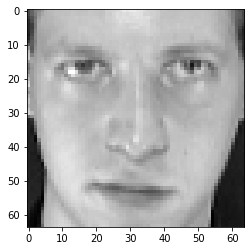

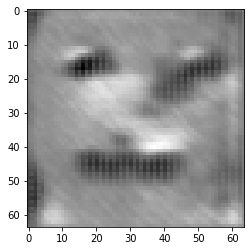

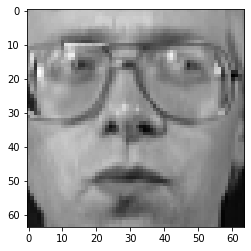

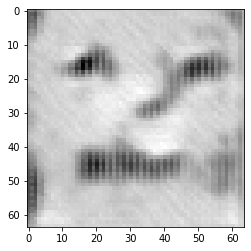

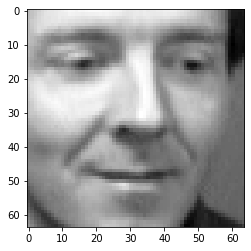

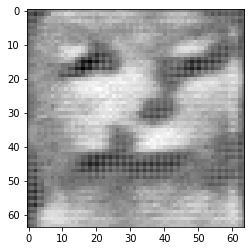

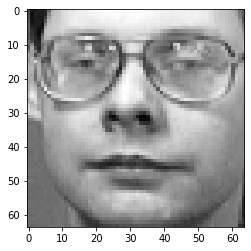

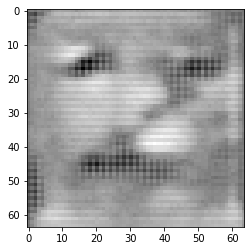

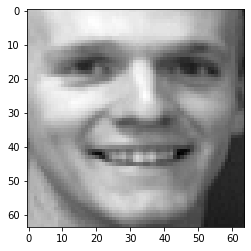

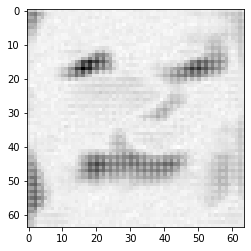

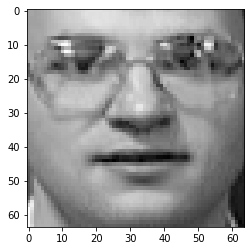

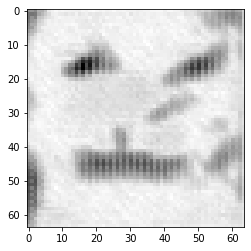

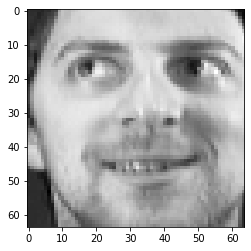

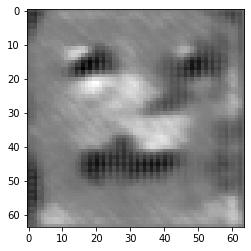

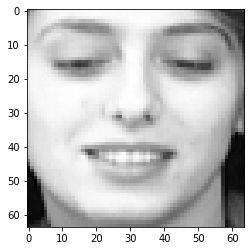

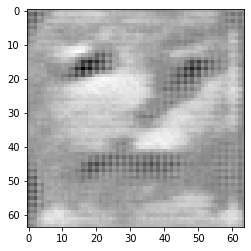

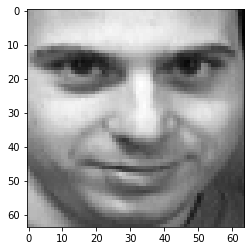

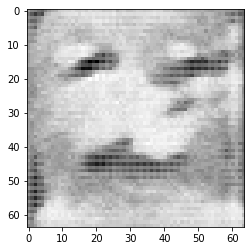

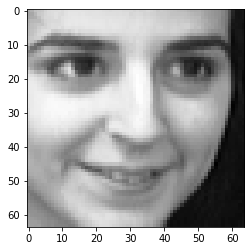

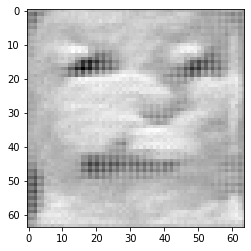

In [30]:
for i in range(10):
    label_to_picture(i)
    generated_image(i)


In [31]:
torch.save(generator.state_dict(), 'generator_1e-8.pt')
torch.save(discriminator.state_dict(), 'discriminator_1e-8.pt')